In [158]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.core import Reshape
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.normalization import BatchNormalization
from keras.models import model_from_yaml
from IPython import display
%matplotlib inline

In [2]:
obj = pickle.load(open('training_data.pickle', 'rb'))
obj['train'].shape

(100000, 50, 20)

In [3]:
# obj['train'][:, 0:2, :] = obj['train'][:, 0:2, :] / 1000
obj['train'][0, :, :]

array([[ 218.11103255, -300.33520462,    3.        ,    3.        ,
           3.        ,    5.        ,    5.        ,    5.        ,
           5.        ,    5.        ,    5.        ,    2.        ,
           1.        ,    0.        ,    3.        ,    6.        ,
           7.        ,    8.        ,    4.        ,    5.        ],
       [  85.24107614, -396.82938782,    5.        ,    3.        ,
           3.        ,    5.        ,    5.        ,    5.        ,
           5.        ,    5.        ,    5.        ,    2.        ,
           1.        ,    0.        ,    5.        ,    7.        ,
           6.        ,    8.        ,    3.        ,    4.        ],
       [ 463.70049415,  108.78324762,    3.        ,    3.        ,
           5.        ,    3.        ,    3.        ,    5.        ,
           5.        ,    5.        ,    5.        ,    0.        ,
           1.        ,    4.        ,    2.        ,    3.        ,
           6.        ,    8.        ,    5.   

In [5]:
flat_train = obj['train'].reshape(100000, 1000)
flat_train.shape

(100000, 1000)

In [6]:
list(flat_train[0, :])

[218.11103255301273,
 -300.33520462270769,
 3.0,
 3.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 2.0,
 1.0,
 0.0,
 3.0,
 6.0,
 7.0,
 8.0,
 4.0,
 5.0,
 85.241076135017153,
 -396.82938782413493,
 5.0,
 3.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 2.0,
 1.0,
 0.0,
 5.0,
 7.0,
 6.0,
 8.0,
 3.0,
 4.0,
 463.70049414721319,
 108.78324761738698,
 3.0,
 3.0,
 5.0,
 3.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 0.0,
 1.0,
 4.0,
 2.0,
 3.0,
 6.0,
 8.0,
 5.0,
 7.0,
 363.76202012522037,
 205.47316673636959,
 3.0,
 3.0,
 5.0,
 3.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 1.0,
 0.0,
 5.0,
 2.0,
 3.0,
 4.0,
 6.0,
 8.0,
 7.0,
 -317.73870340456244,
 -228.76535487959143,
 5.0,
 3.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.0,
 5.0,
 2.0,
 0.0,
 6.0,
 8.0,
 3.0,
 4.0,
 7.0,
 1.0,
 464.13412180125493,
 67.236998779785338,
 3.0,
 3.0,
 5.0,
 3.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 0.0,
 1.0,
 4.0,
 2.0,
 3.0,
 6.0,
 8.0,
 5.0,
 7.0,
 17.890086037864425,
 -209.52340889322772,
 3.0,
 3.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 3.0,

In [7]:
obj['target'].shape

(100000, 9, 2)

In [8]:
flat_target = obj['target'].reshape(100000, 18)
flat_target.shape

(100000, 18)

In [9]:
flat_target[0, :]

array([ 826.0462026 ,  335.72771087,  285.20250502,  552.45217589,
        -84.14844105, -784.51003896,  876.75016449,  460.18313101,
        959.44339505,  799.13629082, -436.24556529,  929.79441817,
       -545.90657896,  964.41701317,  960.33730763, -985.22075194,
       -827.79551266,  238.27646881])

In [81]:
model = Sequential()
model.add(Dense(500, input_dim=1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2))
model.add(Activation('linear'))
model.add(Lambda(lambda x: x * 1000))
model.compile(optimizer='rmsprop',
              loss='mse')

In [110]:
fitted = model.fit(flat_train[:99900, :], flat_target[:99900, 0:2], batch_size=1000, nb_epoch=1000, validation_split=0.2)

Train on 79920 samples, validate on 19980 samples
Epoch 1/1000
79920/79920 [==============================] - 8s - loss: 133211.9379 - val_loss: 99401.3129
Epoch 2/1000
79920/79920 [==============================] - 8s - loss: 133306.2987 - val_loss: 103175.1571
Epoch 3/1000
79920/79920 [==============================] - 8s - loss: 130475.2899 - val_loss: 100811.2988
Epoch 4/1000
79920/79920 [==============================] - 8s - loss: 131302.8582 - val_loss: 98007.3607
Epoch 5/1000
79920/79920 [==============================] - 8s - loss: 130349.5710 - val_loss: 96202.3280
Epoch 6/1000
79920/79920 [==============================] - 8s - loss: 128560.4569 - val_loss: 94773.0925
Epoch 7/1000
79920/79920 [==============================] - 8s - loss: 127499.0046 - val_loss: 97183.3780
Epoch 8/1000
79920/79920 [==============================] - 8s - loss: 126499.9564 - val_loss: 91851.2318
Epoch 9/1000
79920/79920 [==============================] - 8s - loss: 125655.5066 - val_loss: 93750

In [111]:
remaining_train = obj['train'][99900:,:,:]
remaining_target = obj['target'][99900:,:,:]
remaining_train.shape

(100, 50, 20)

In [112]:
predicted = model.predict(flat_train[99900:, :])

In [113]:
predicted

array([[-743.67425537, -521.45257568],
       [-639.07543945, -666.88946533],
       [-312.56311035,  344.57971191],
       [ 684.09851074, -417.11099243],
       [ 761.86486816, -610.1618042 ],
       [-486.43902588, -187.24165344],
       [ 338.30072021,    7.76257277],
       [ 378.16647339,  417.94192505],
       [-206.96092224, -594.43896484],
       [-513.89276123, -362.54785156],
       [-177.81626892,  831.47357178],
       [-756.7911377 , -669.71533203],
       [ 382.81332397,  667.09649658],
       [ 208.60534668,  -83.93431854],
       [ 603.32818604,  143.93965149],
       [-475.93908691,  391.30004883],
       [ 355.10708618, -259.49923706],
       [-738.20318604, -326.31915283],
       [-701.28045654,  763.09558105],
       [-458.77416992, -382.27276611],
       [  59.34536743,    8.20357609],
       [  -1.83111989,  630.19384766],
       [-530.67559814, -167.63475037],
       [-167.55143738,   37.87665558],
       [ 120.37880707, -632.59747314],
       [ 317.23590088,  3

In [114]:
# predicted_reshaped = predicted.reshape(100, 9, 2)
predicted_reshaped = predicted
list(predicted_reshaped)

[array([-743.67425537, -521.45257568]),
 array([-639.07543945, -666.88946533]),
 array([-312.56311035,  344.57971191]),
 array([ 684.09851074, -417.11099243]),
 array([ 761.86486816, -610.1618042 ]),
 array([-486.43902588, -187.24165344]),
 array([ 338.30072021,    7.76257277]),
 array([ 378.16647339,  417.94192505]),
 array([-206.96092224, -594.43896484]),
 array([-513.89276123, -362.54785156]),
 array([-177.81626892,  831.47357178]),
 array([-756.7911377 , -669.71533203]),
 array([ 382.81332397,  667.09649658]),
 array([ 208.60534668,  -83.93431854]),
 array([ 603.32818604,  143.93965149]),
 array([-475.93908691,  391.30004883]),
 array([ 355.10708618, -259.49923706]),
 array([-738.20318604, -326.31915283]),
 array([-701.28045654,  763.09558105]),
 array([-458.77416992, -382.27276611]),
 array([ 59.34536743,   8.20357609]),
 array([  -1.83111989,  630.19384766]),
 array([-530.67559814, -167.63475037]),
 array([-167.55143738,   37.87665558]),
 array([ 120.37880707, -632.59747314]),
 a

In [115]:
predicted_reshaped.shape

(100, 2)

In [159]:
def plot_pokemons(player_coord, pokemons, xylim=(-1100, 1100)):
    plt.figure(figsize=(15,15))
    cmap = plt.get_cmap('Accent')
    for i in range(len(pokemons)):
        plt.scatter((pokemons - player_coord)[i, 0], (pokemons - player_coord)[i, 1], color=cmap(i / 9))
    plt.axes().set_aspect(1)
    plt.axes().set_xlim(xylim)
    plt.axes().set_ylim(xylim)
    # player
    plt.scatter(0, 0 , color='purple', s=15)
    # detection radii
    dists = {10:'green', 25:'blue', 100:'yellow', 1000:'red'}
    for r in dists:
        plt.axes().add_patch(plt.Circle((0,0), r, fill=False, color=dists[r]))
    plt.show()
    
def plot_overlap(player_coord, actuals, predictions, xylim=(-1100, 1100)):
    plt.figure(figsize=(15,15))
    cmap = plt.get_cmap('Accent')
    for i in range(len(pokemons)):
        plt.scatter((actuals - player_coord)[i, 0], 
                    (actuals - player_coord)[i, 1], color=cmap(i / 9), marker='*', s=50)
        plt.scatter((predictions - player_coord)[i, 0], 
                    (predictions - player_coord)[i, 1], color=cmap(i / 9), s=50)
    plt.axes().set_aspect(1)
    plt.axes().set_xlim(xylim)
    plt.axes().set_ylim(xylim)
    # player
    plt.scatter(0, 0 , color='purple', s=15)
    # detection radii
    dists = {10:'green', 25:'blue', 100:'yellow', 1000:'red'}
    for r in dists:
        plt.axes().add_patch(plt.Circle((0,0), r, fill=False, color=dists[r]))
    plt.show()
    
def plot_overlap_one(player_coord, actuals, predictions, xylim=(-1100, 1100)):
    fig = plt.figure(figsize=(15,15))
    plt.scatter((actuals - player_coord)[0], 
                (actuals - player_coord)[1], marker='*', s=50)
    plt.scatter((predictions - player_coord)[0], 
                (predictions - player_coord)[1], s=50)
    plt.axes().set_aspect(1)
    plt.axes().set_xlim(xylim)
    plt.axes().set_ylim(xylim)
    # player
    plt.scatter(0, 0 , color='purple', s=15)
    # detection radii
    dists = {10:'green', 25:'blue', 100:'yellow', 1000:'red'}
    for r in dists:
        plt.axes().add_patch(plt.Circle((0,0), r, fill=False, color=dists[r]))
    return fig

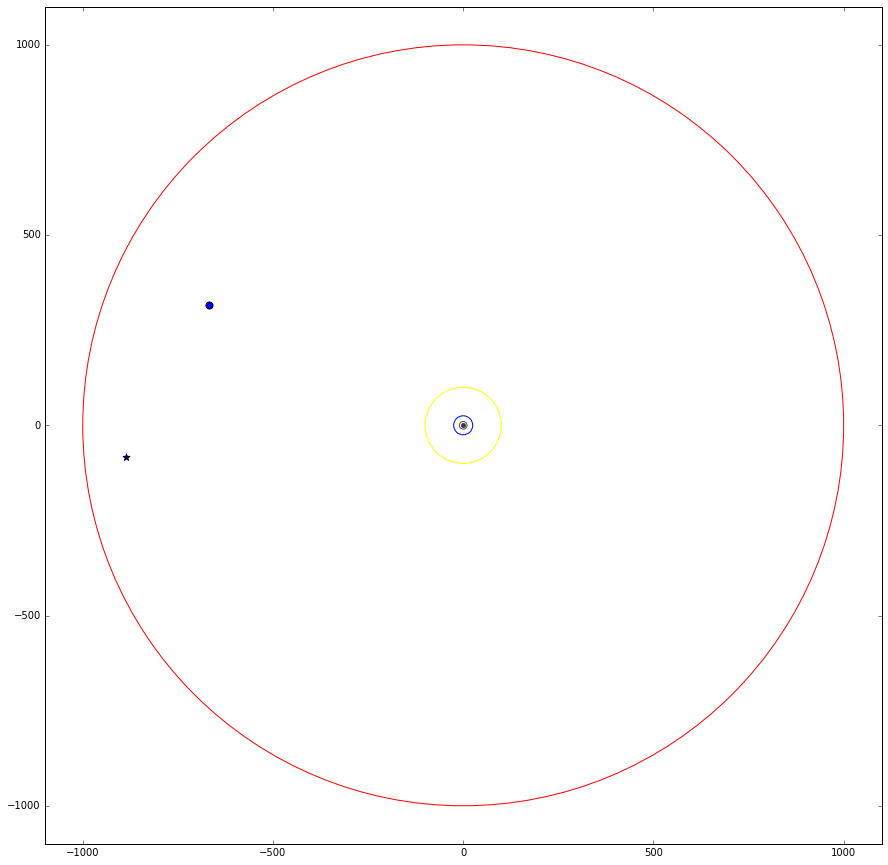

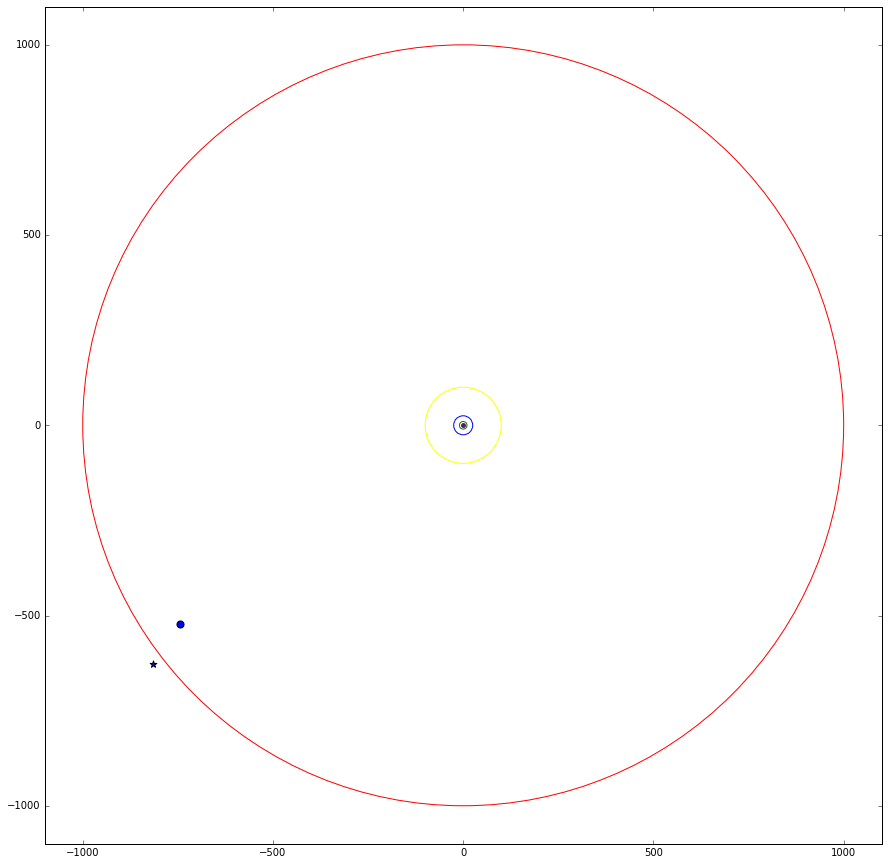

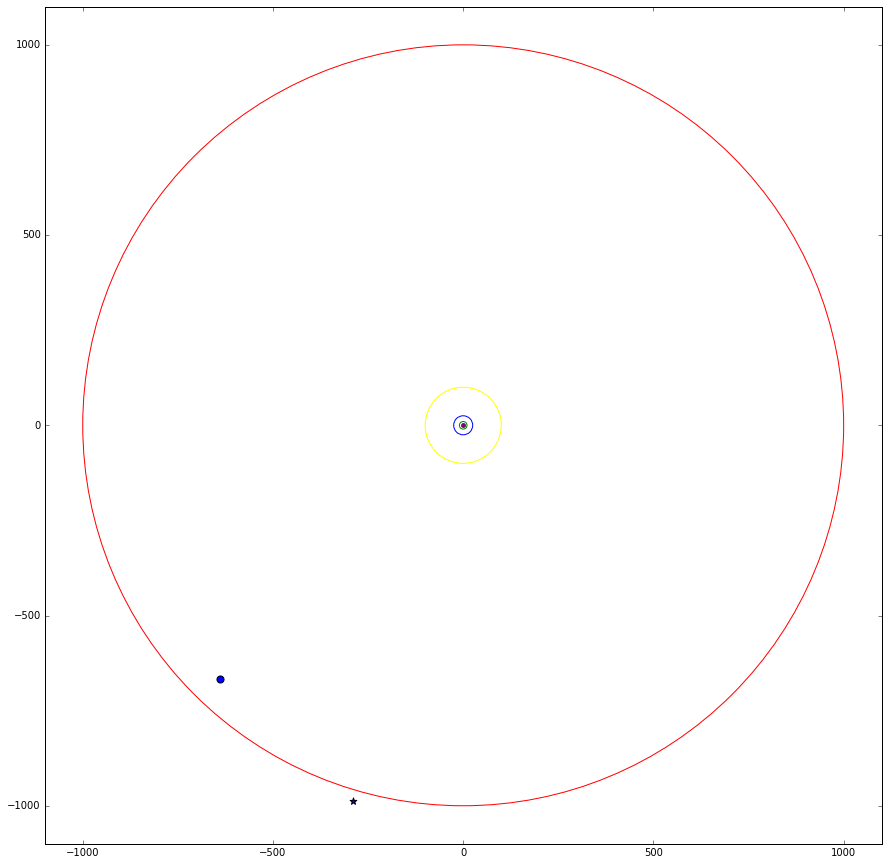

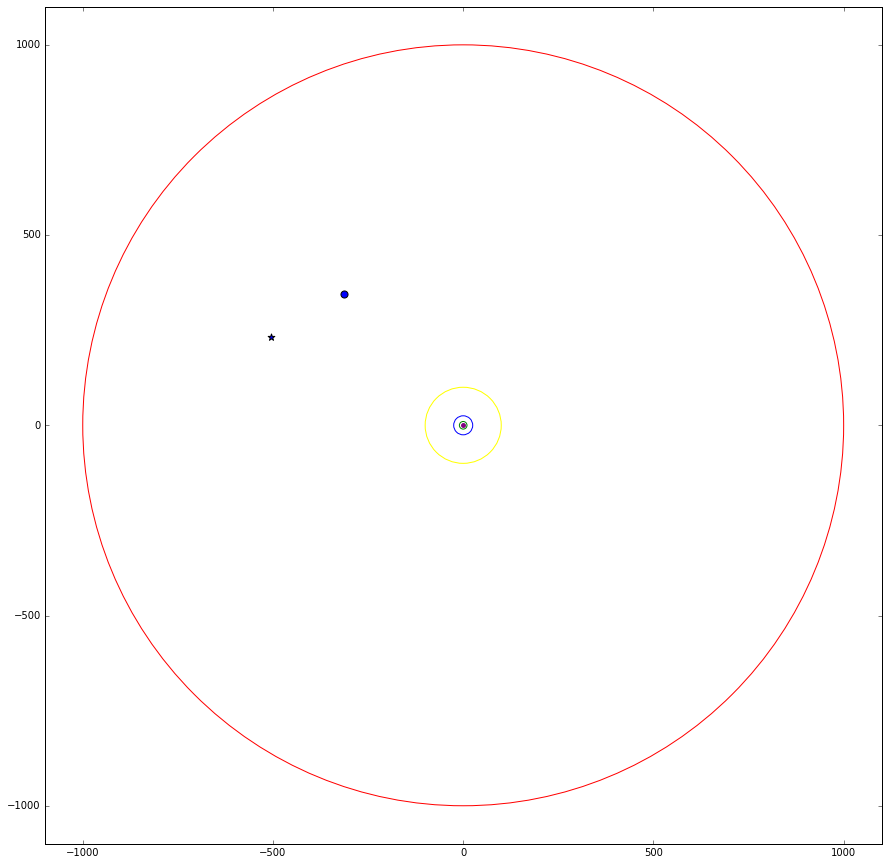

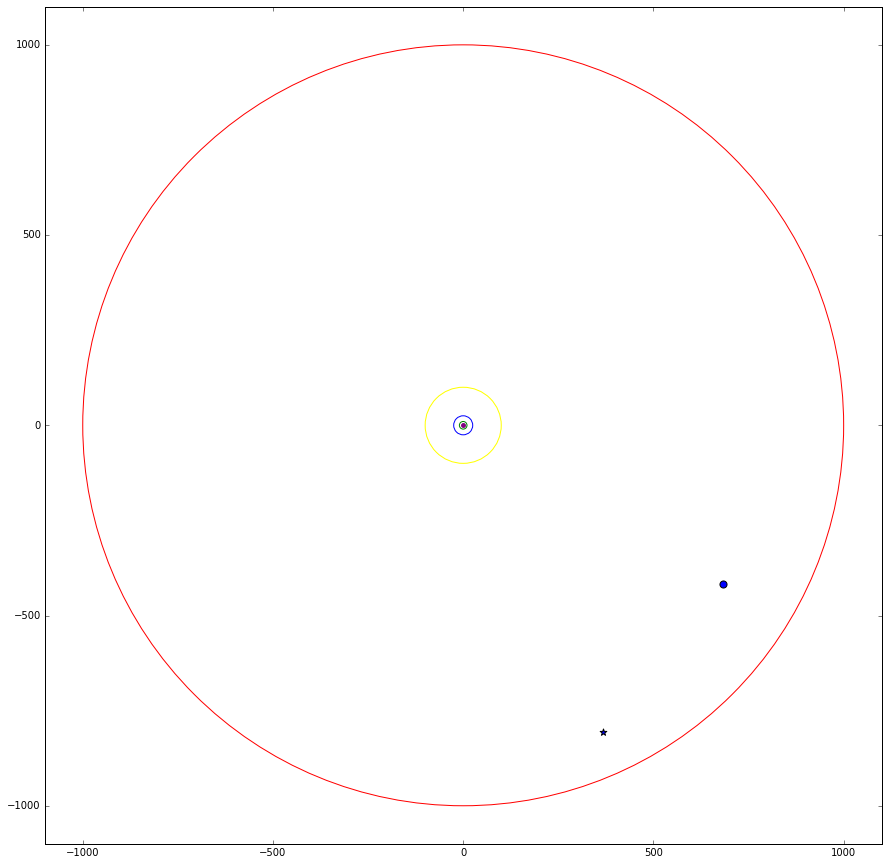

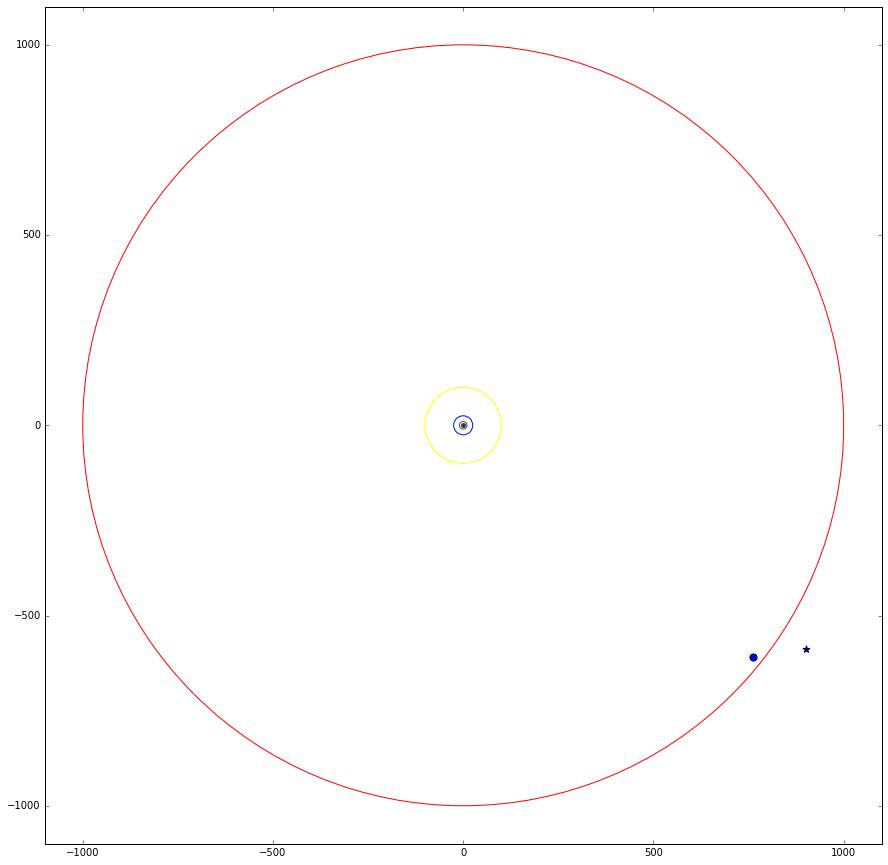

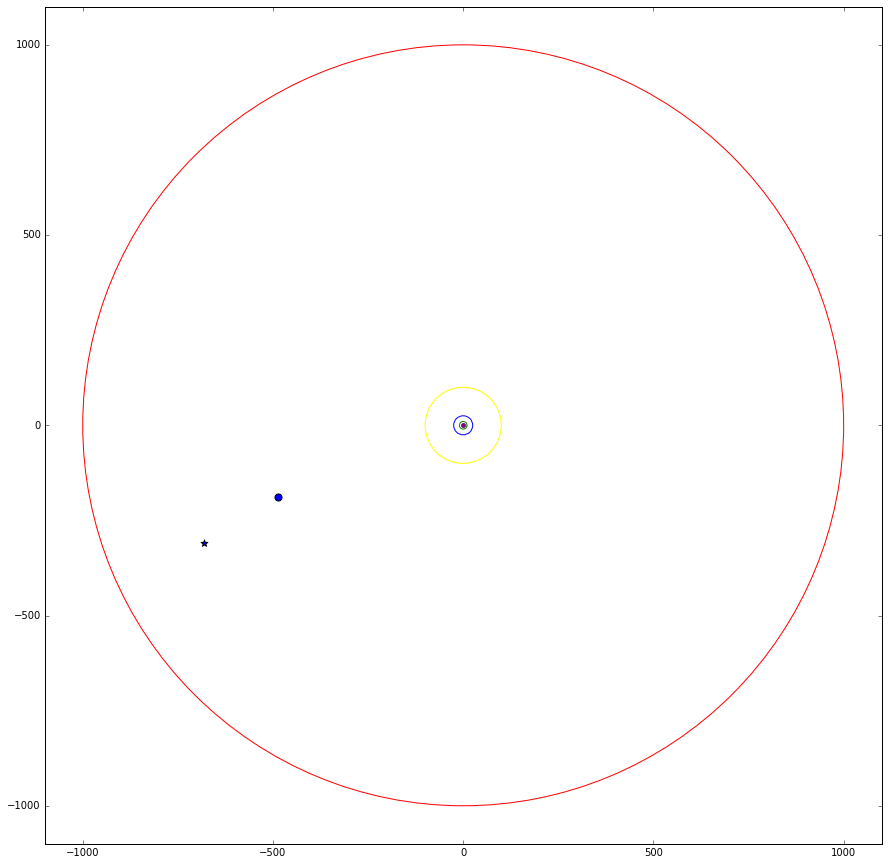

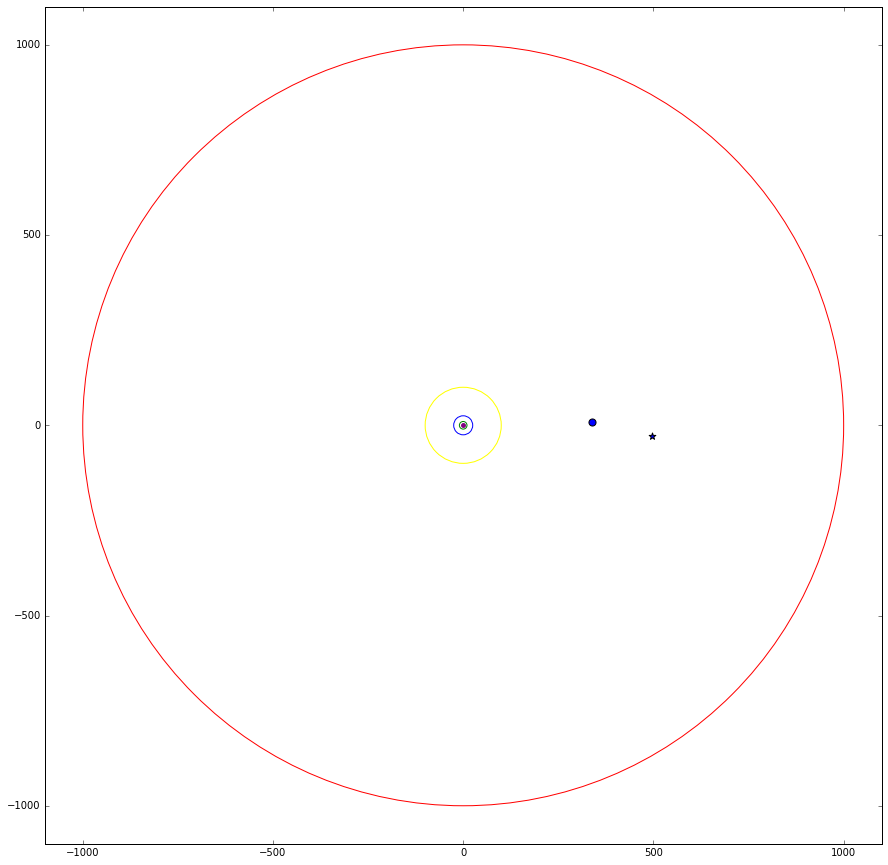

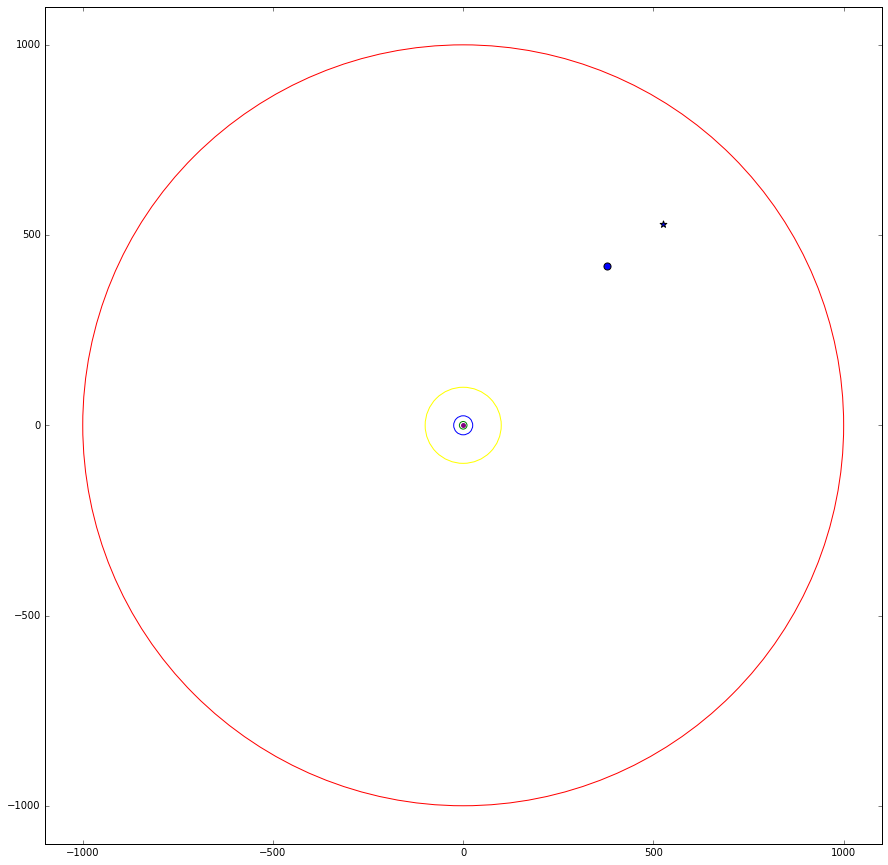

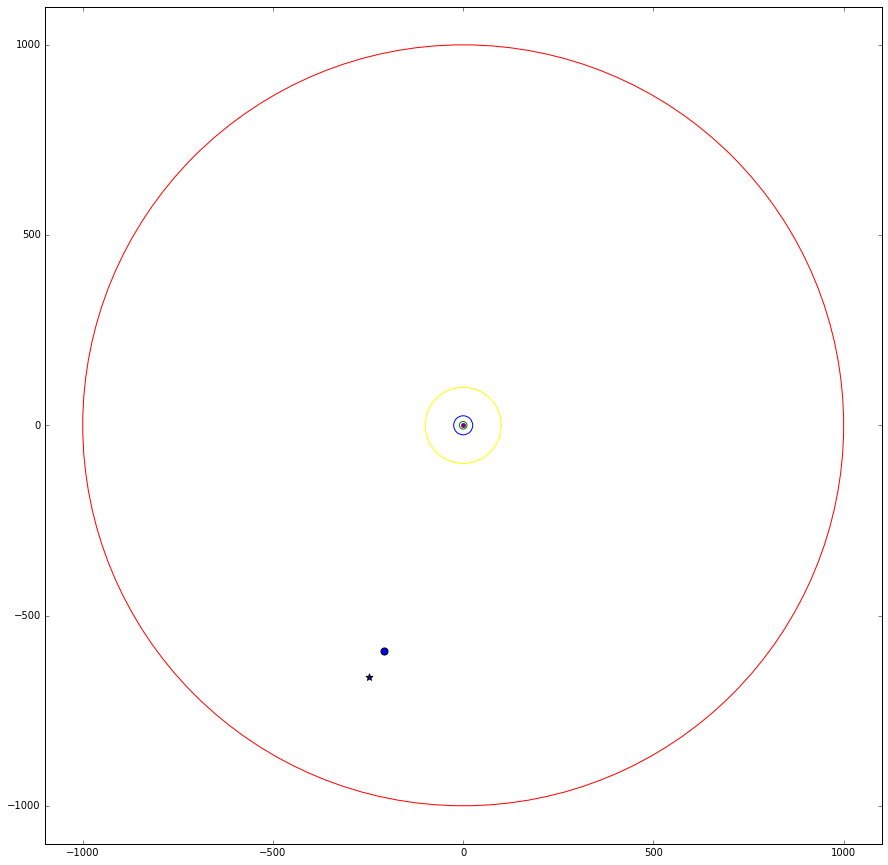

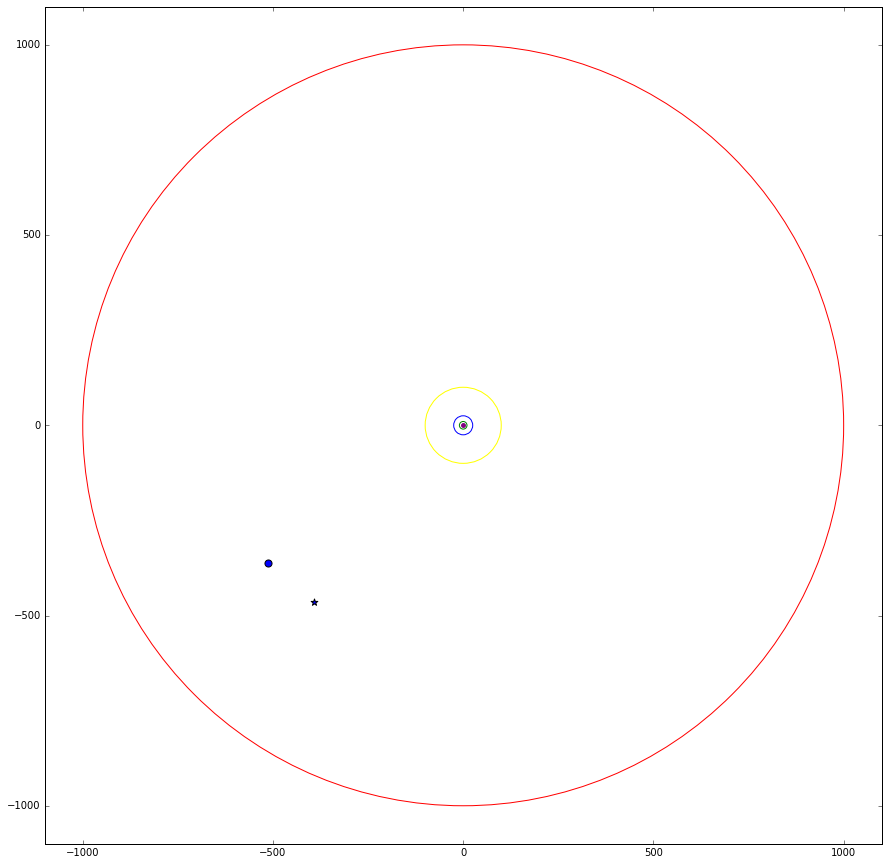

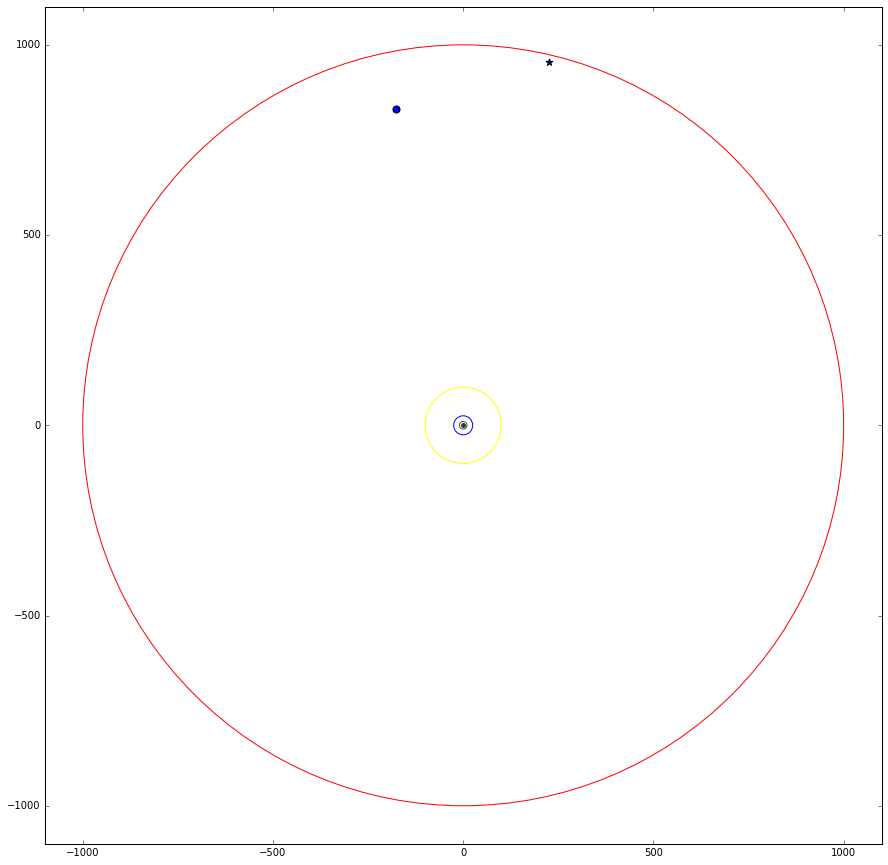

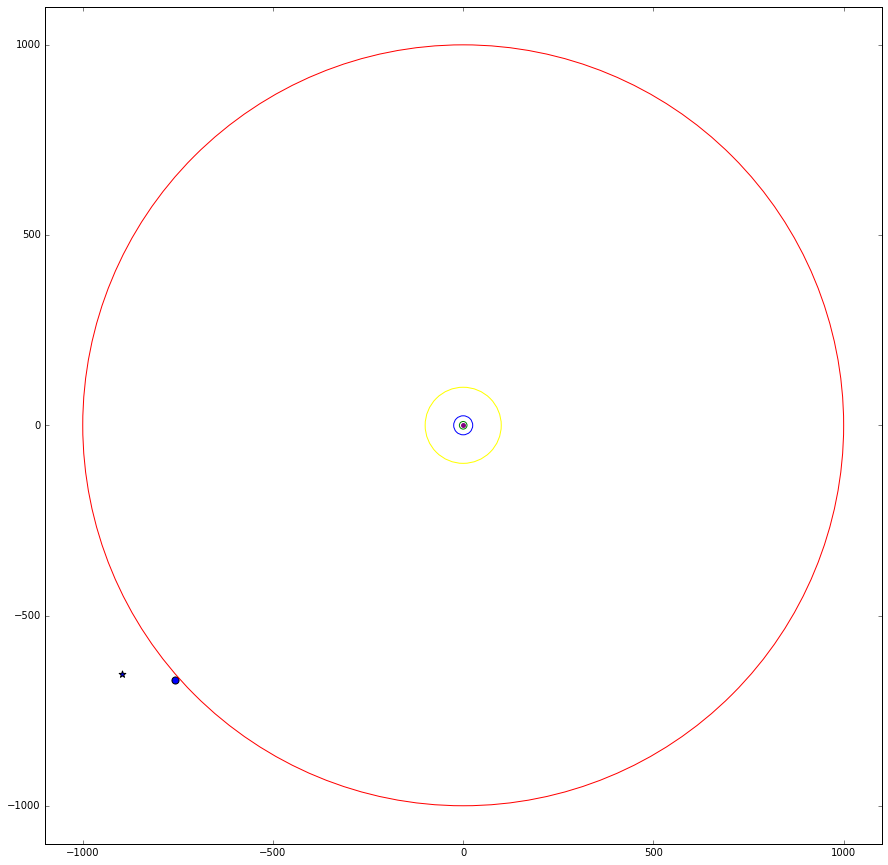

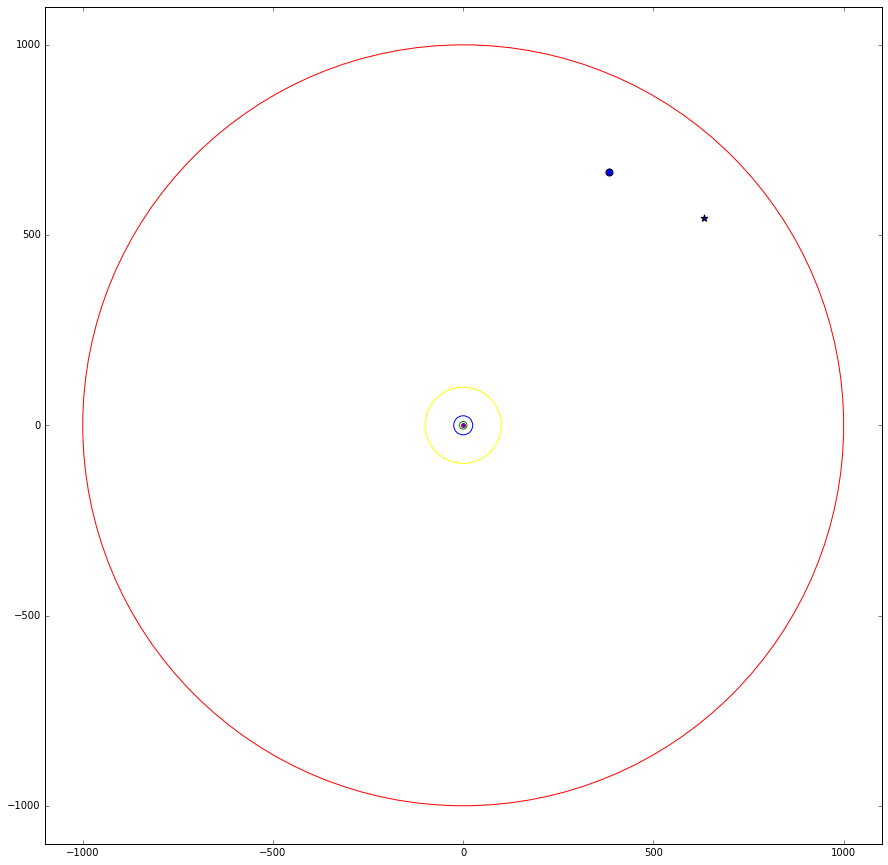

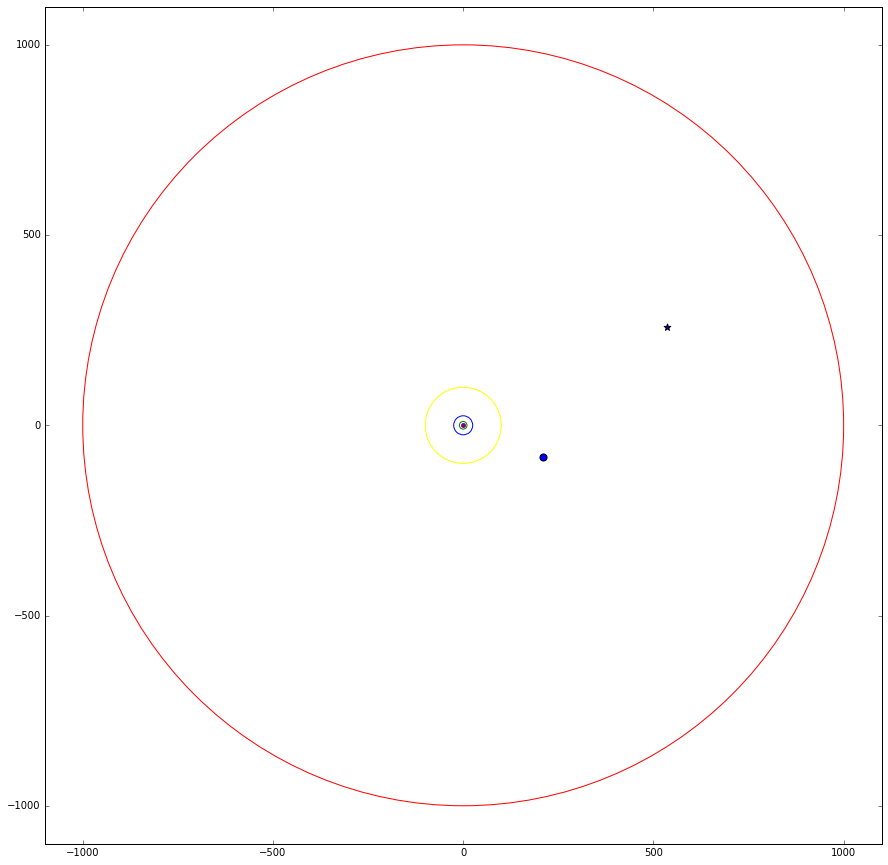

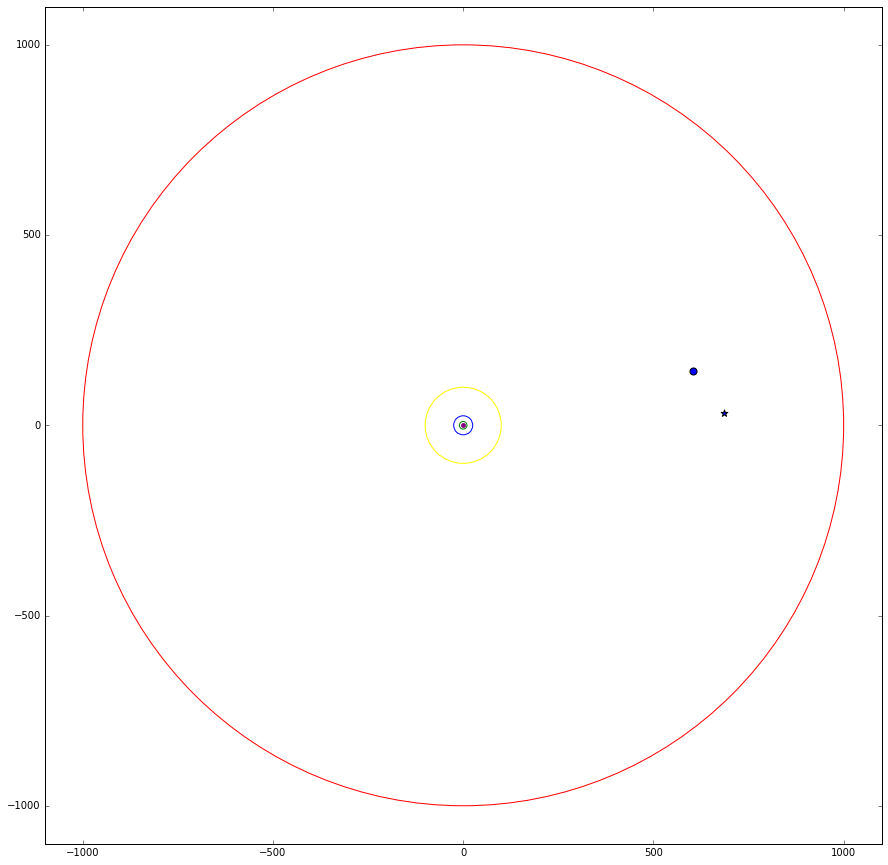

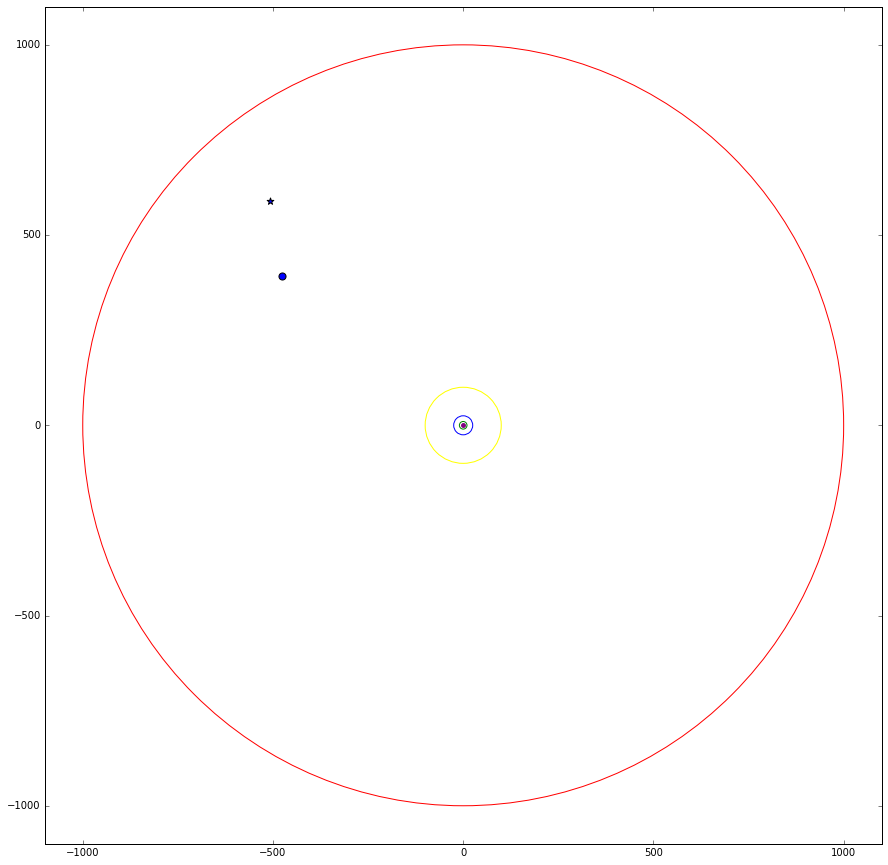

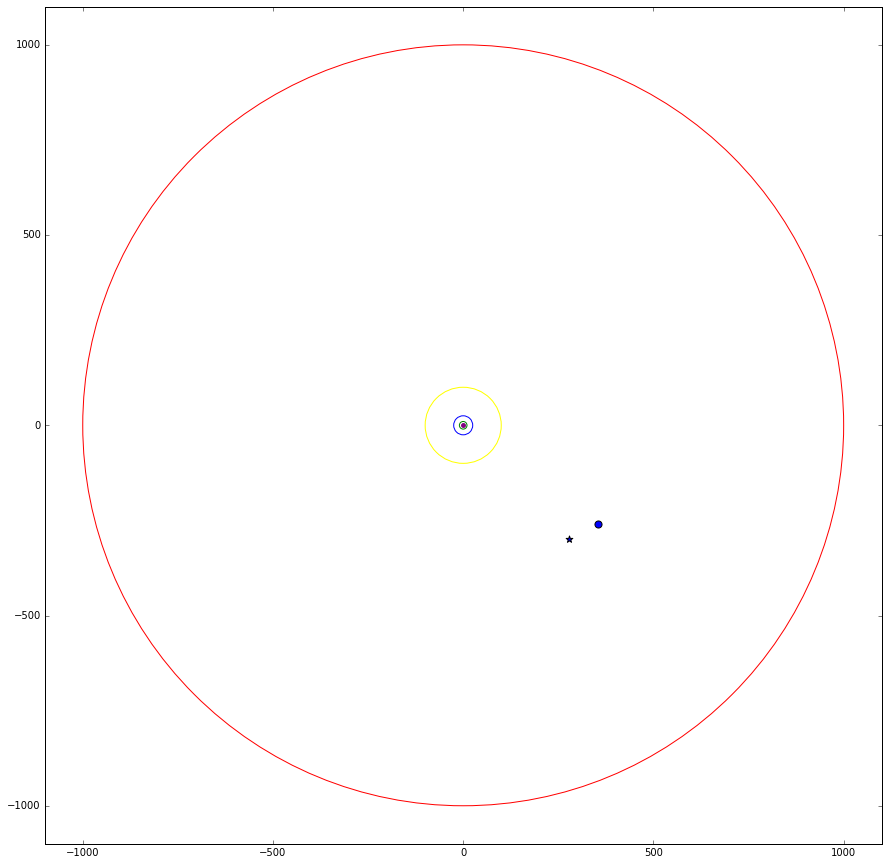

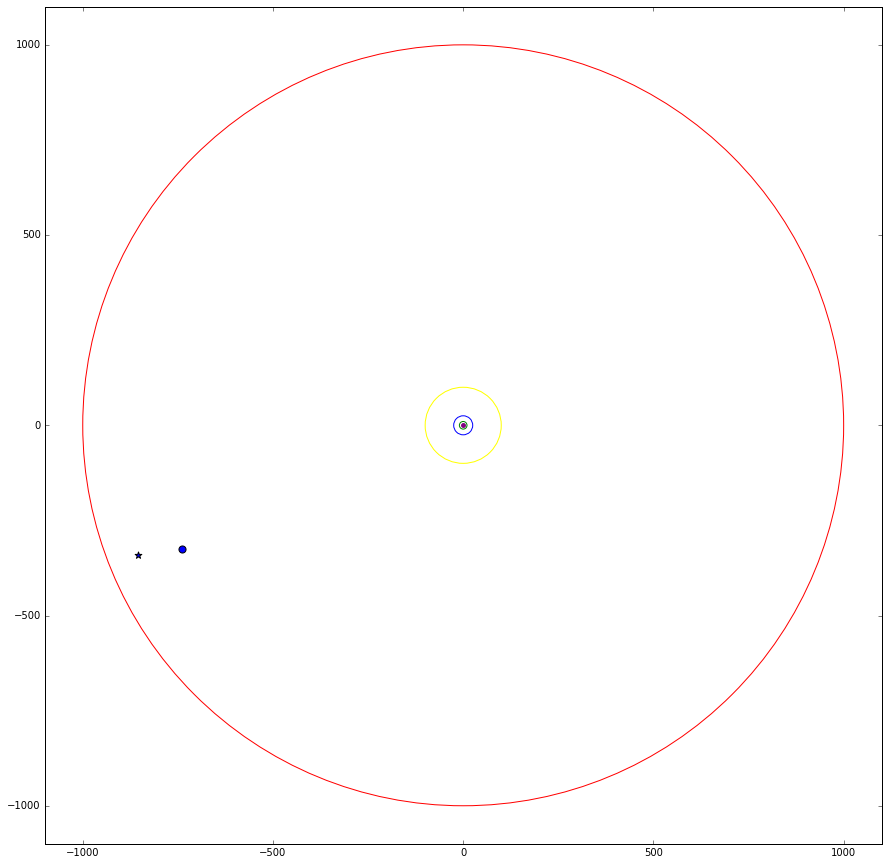

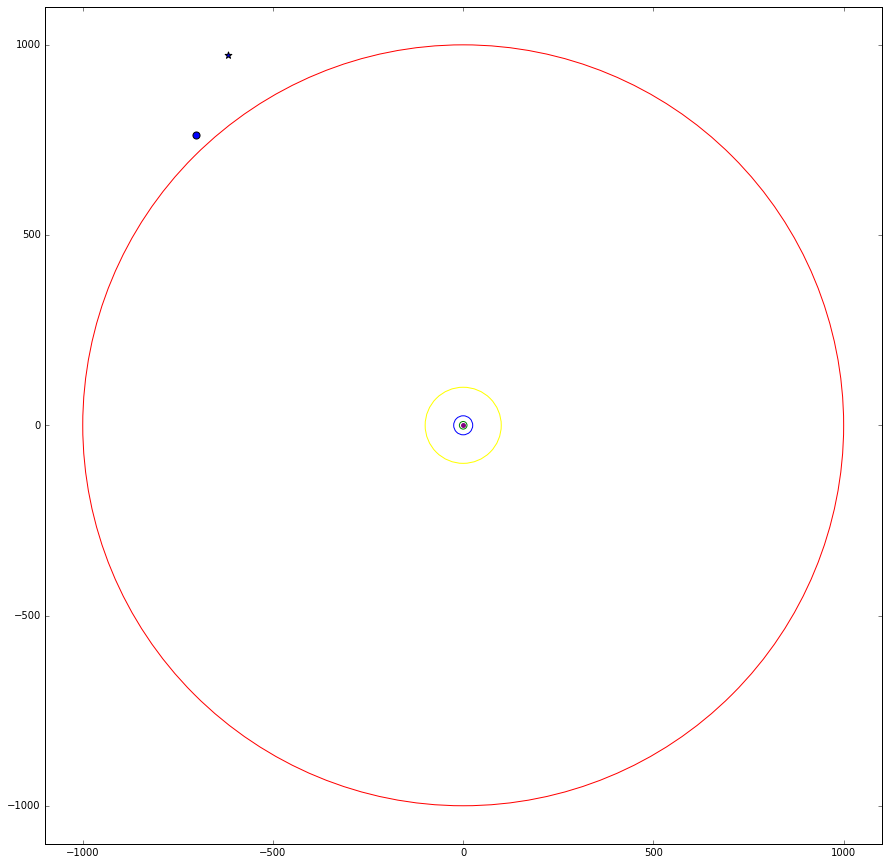

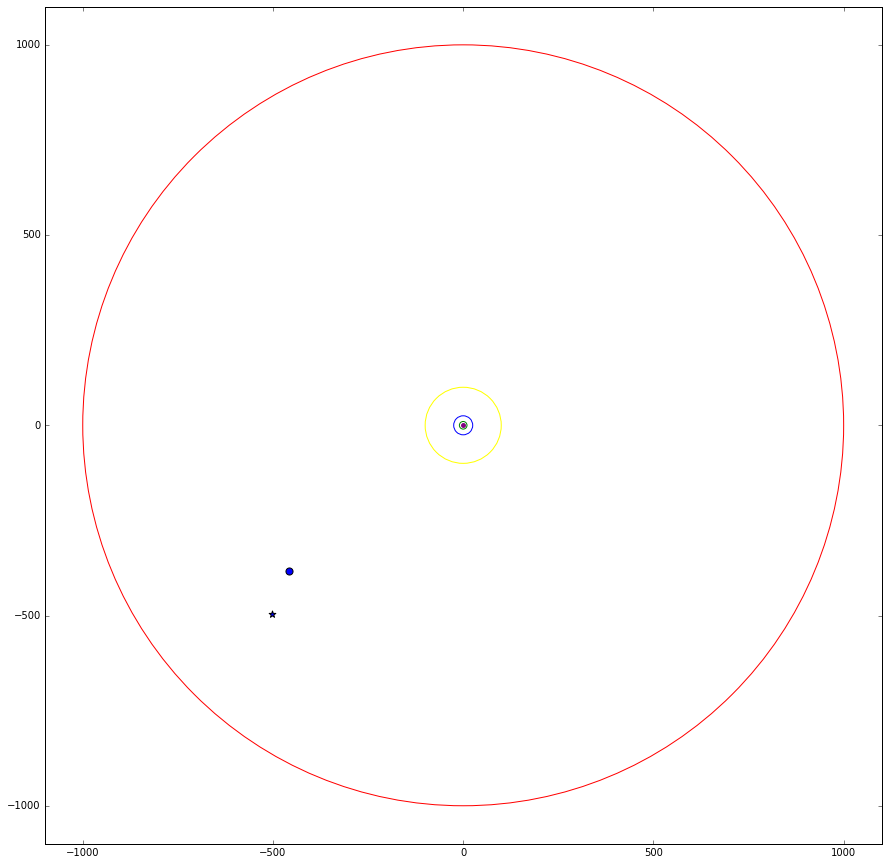

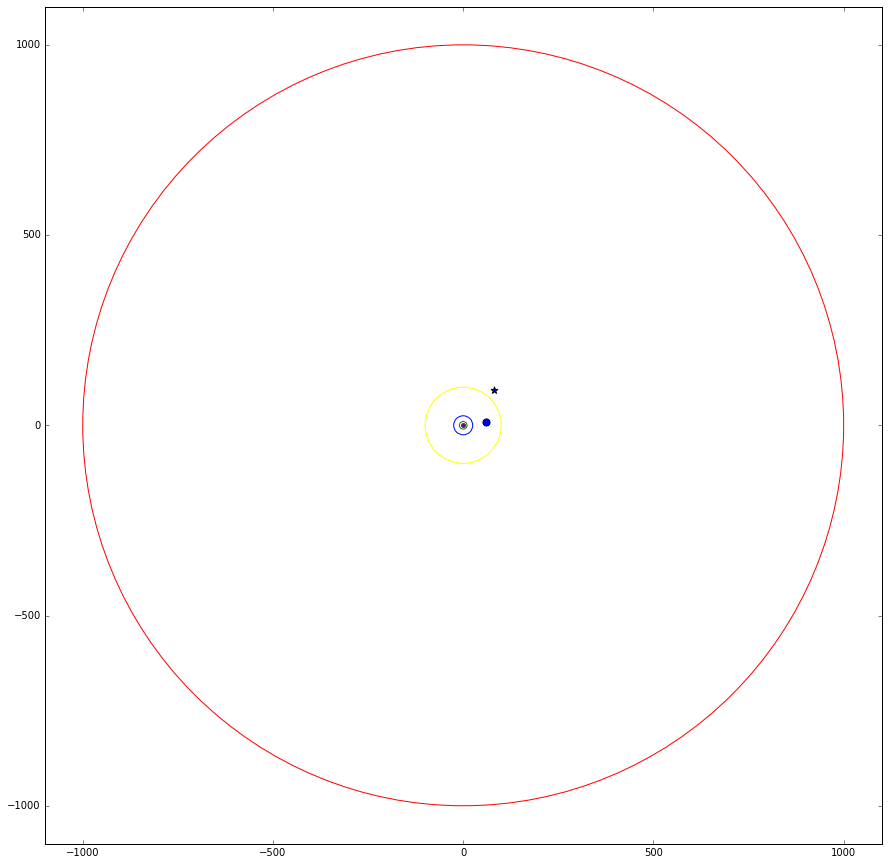

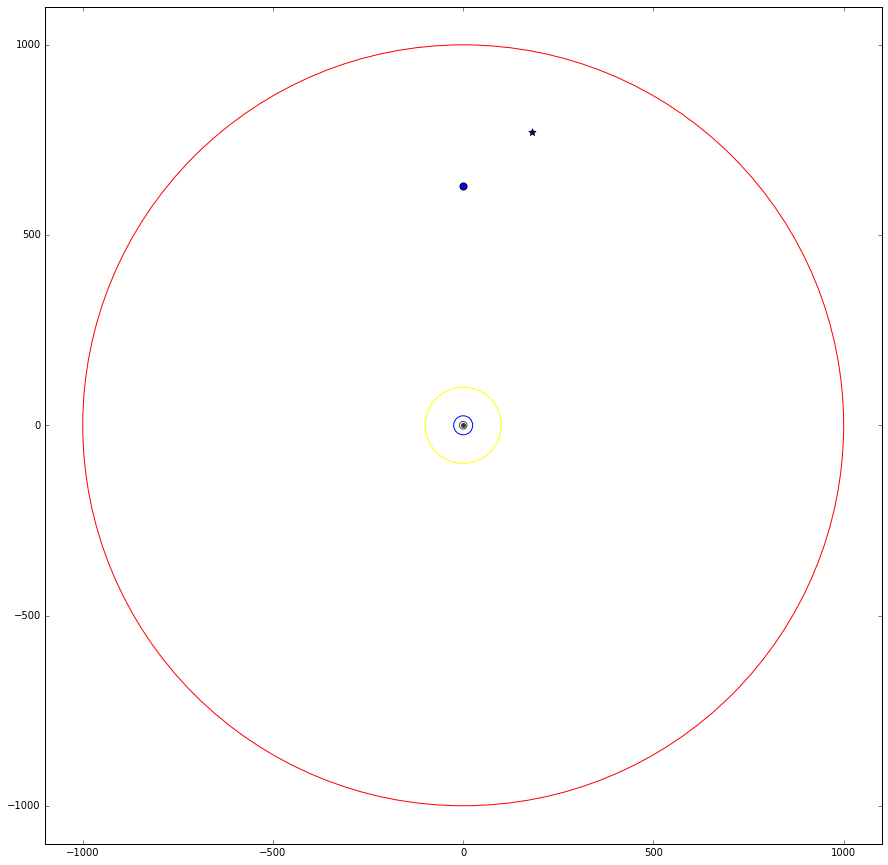

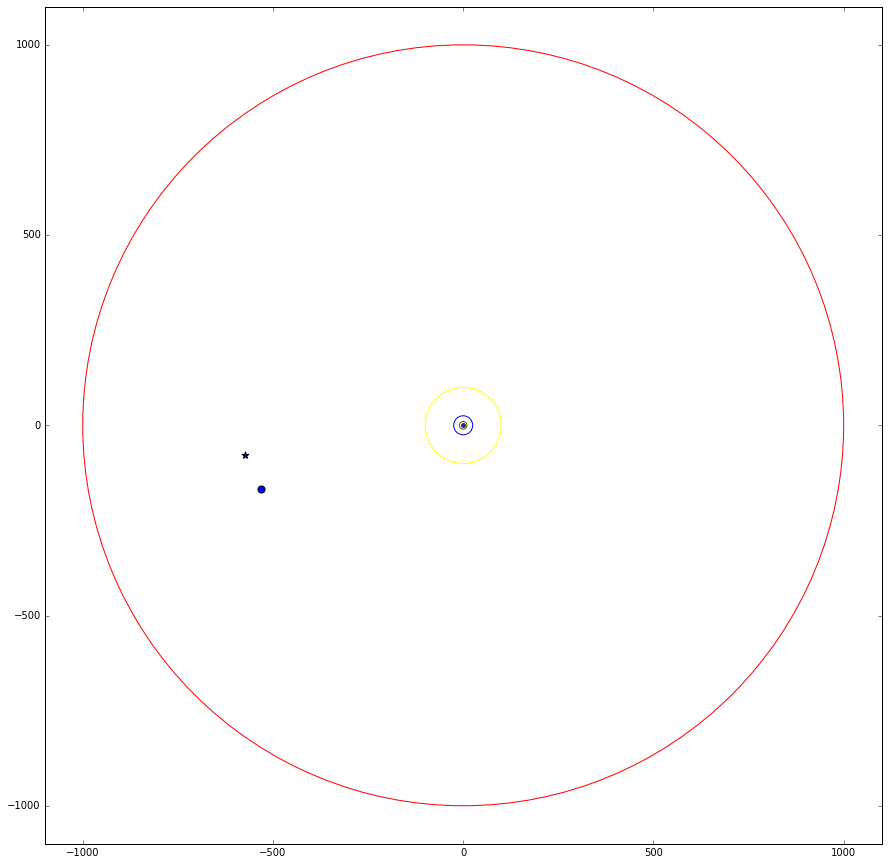

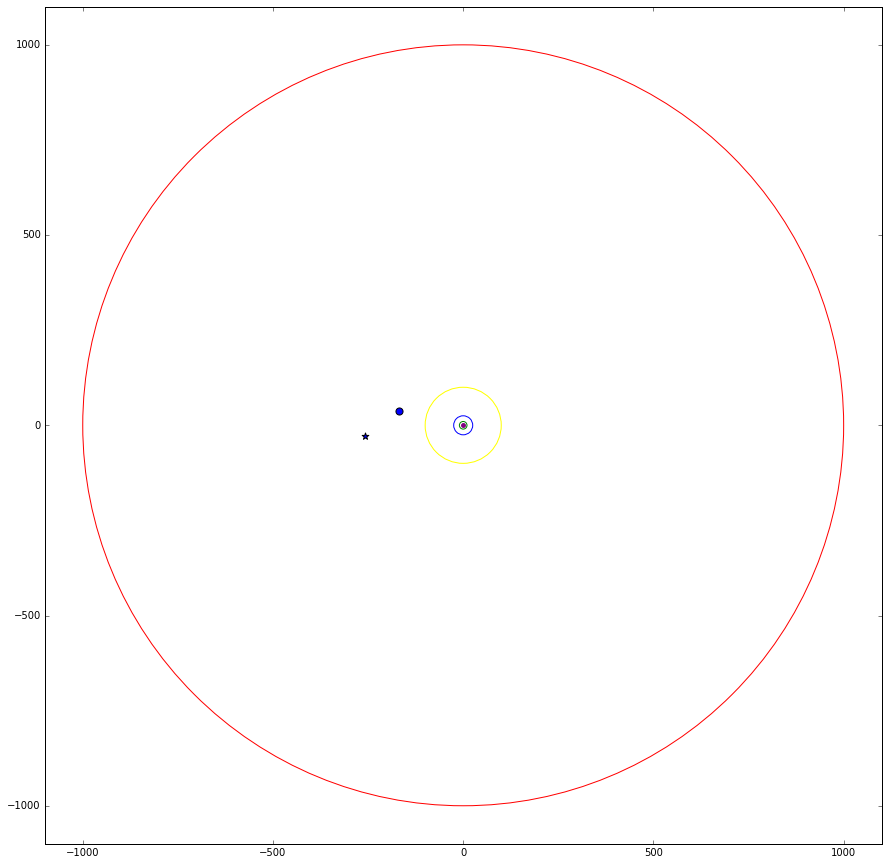

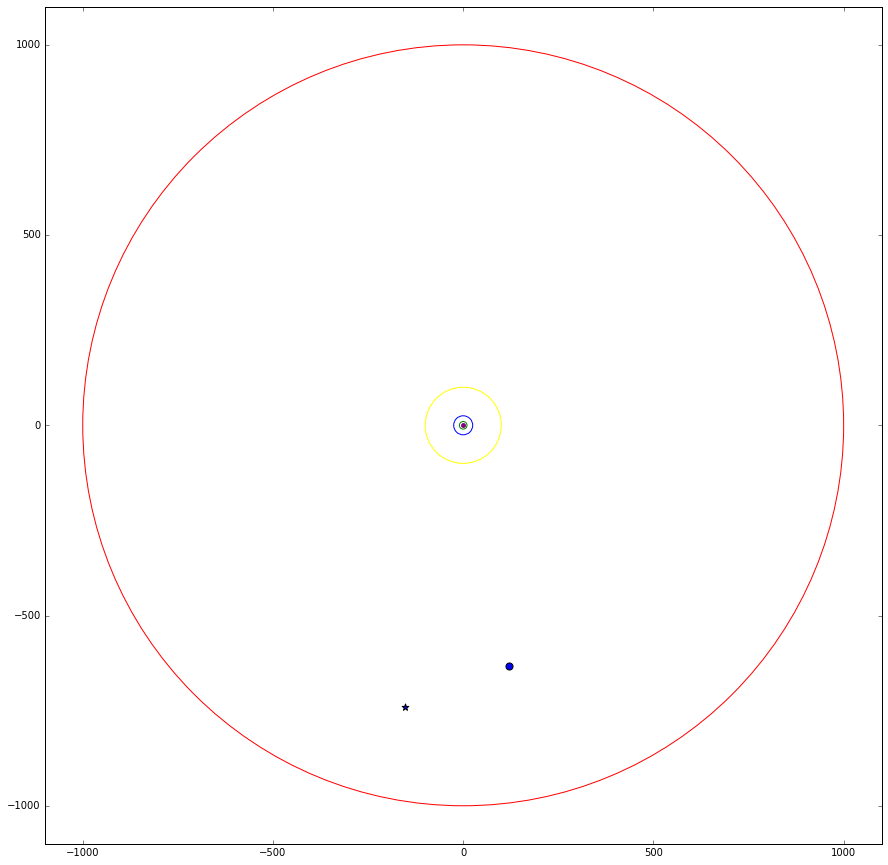

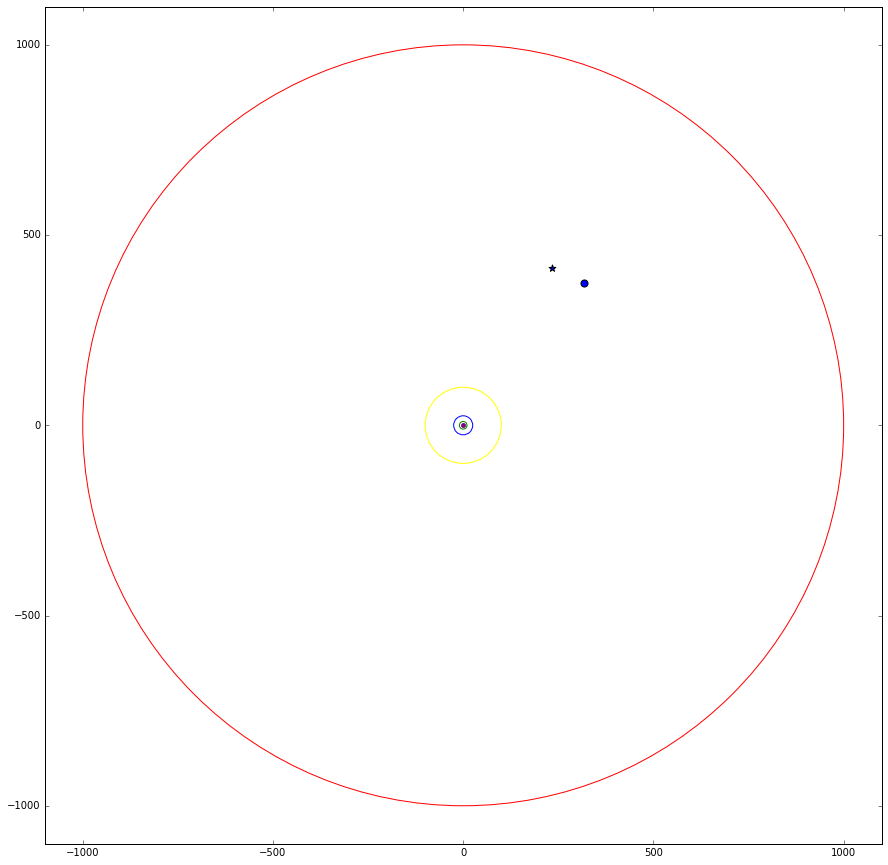

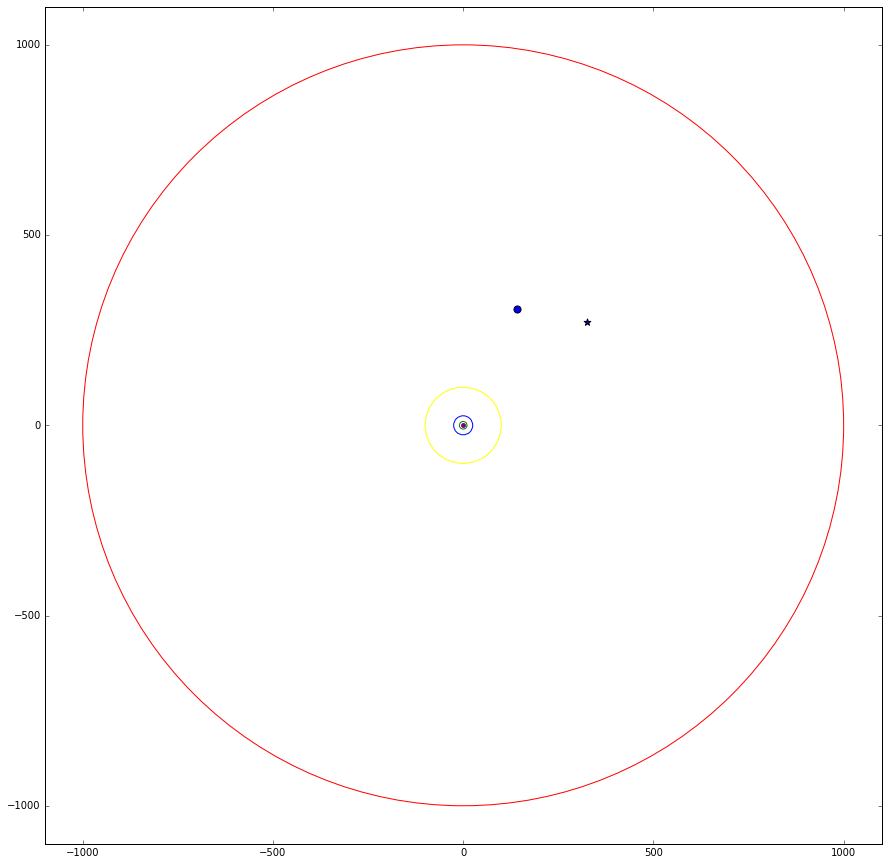

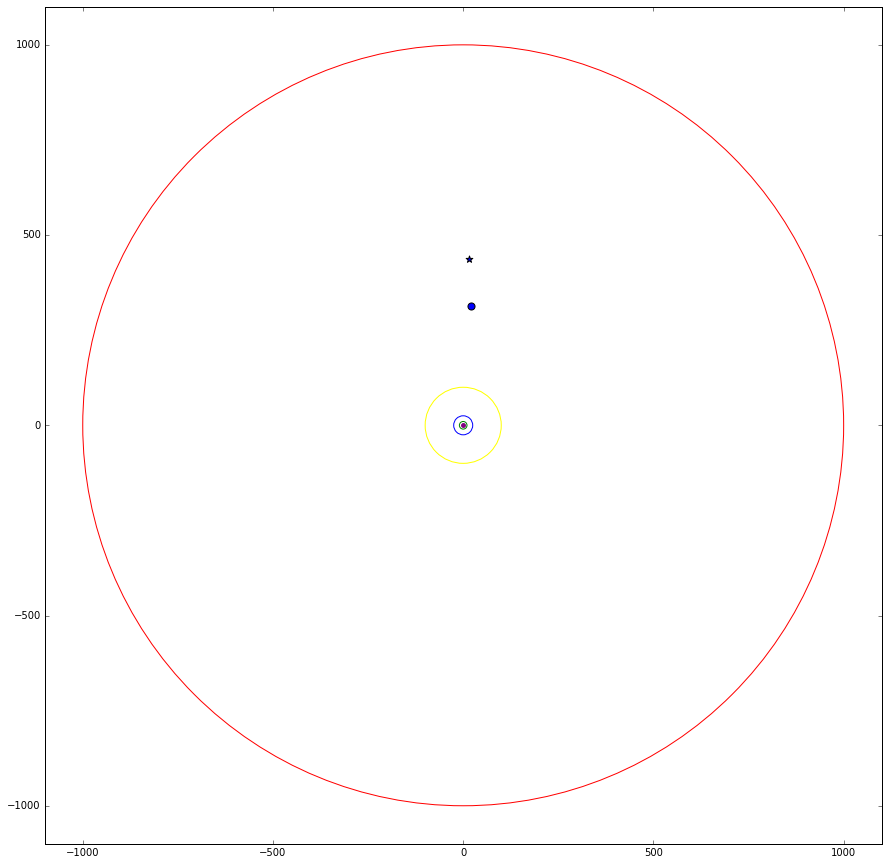

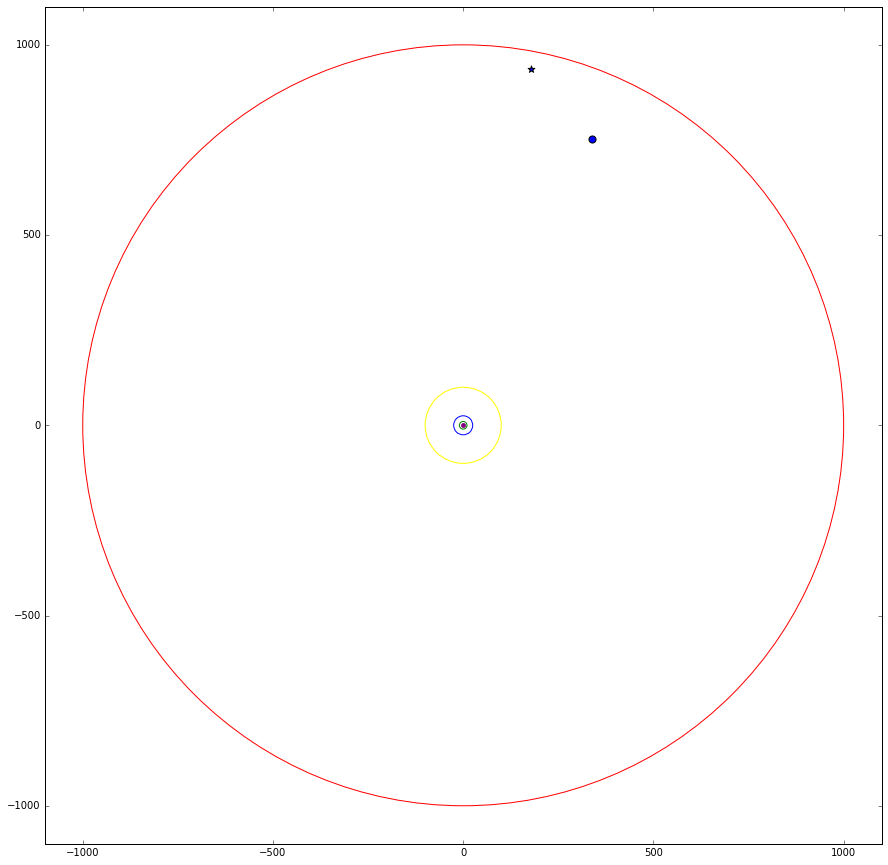

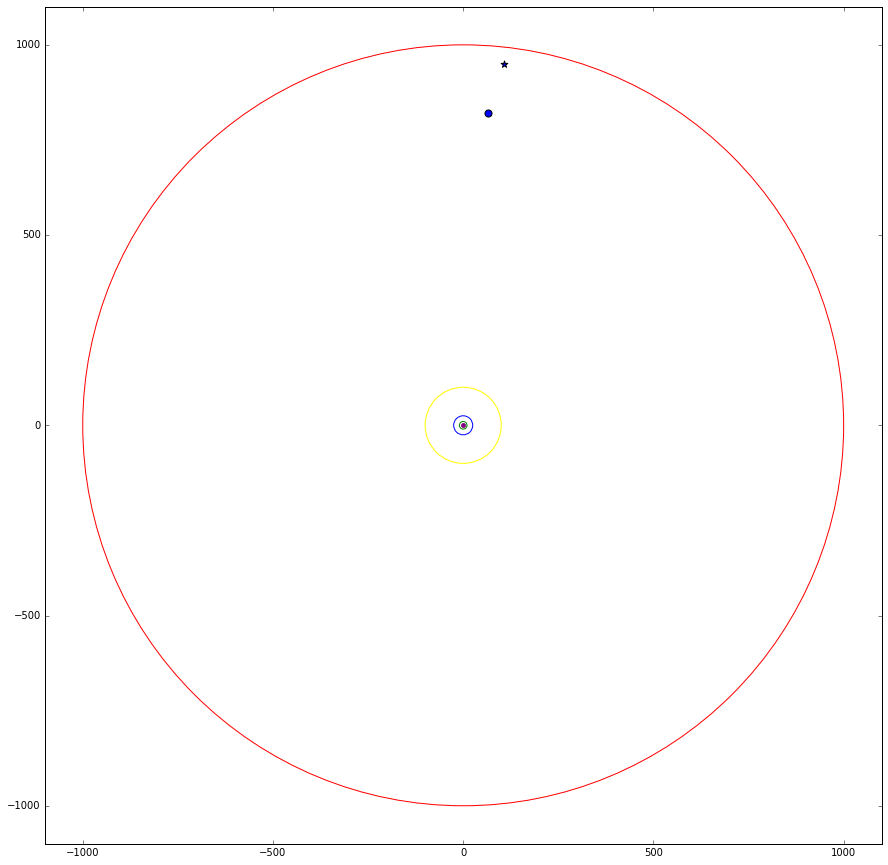

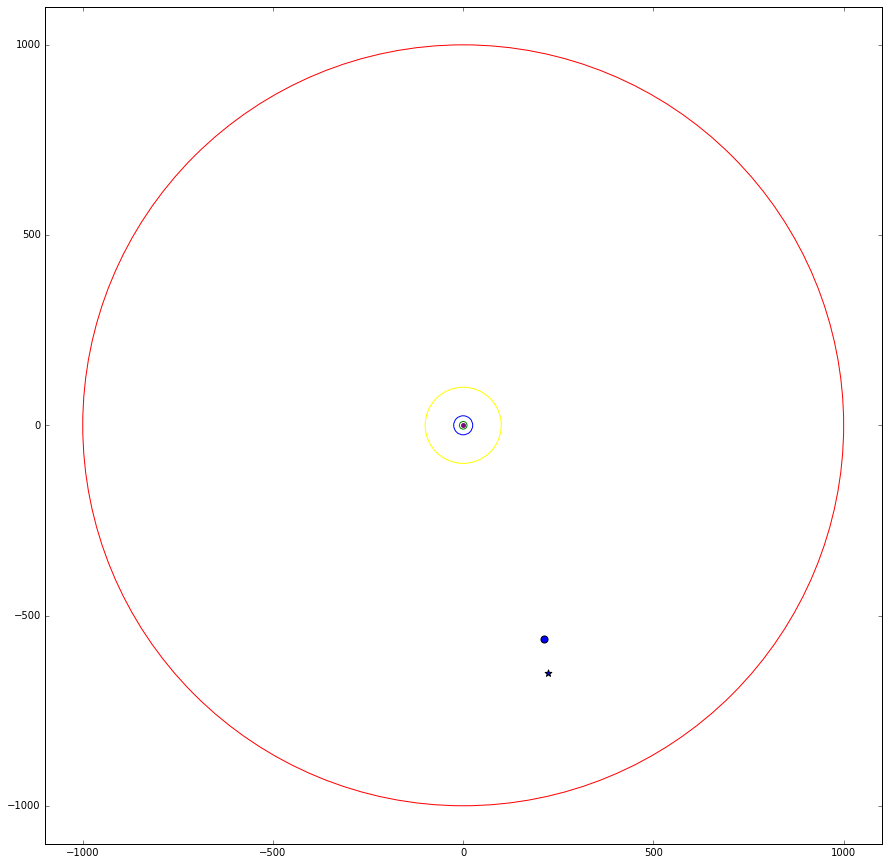

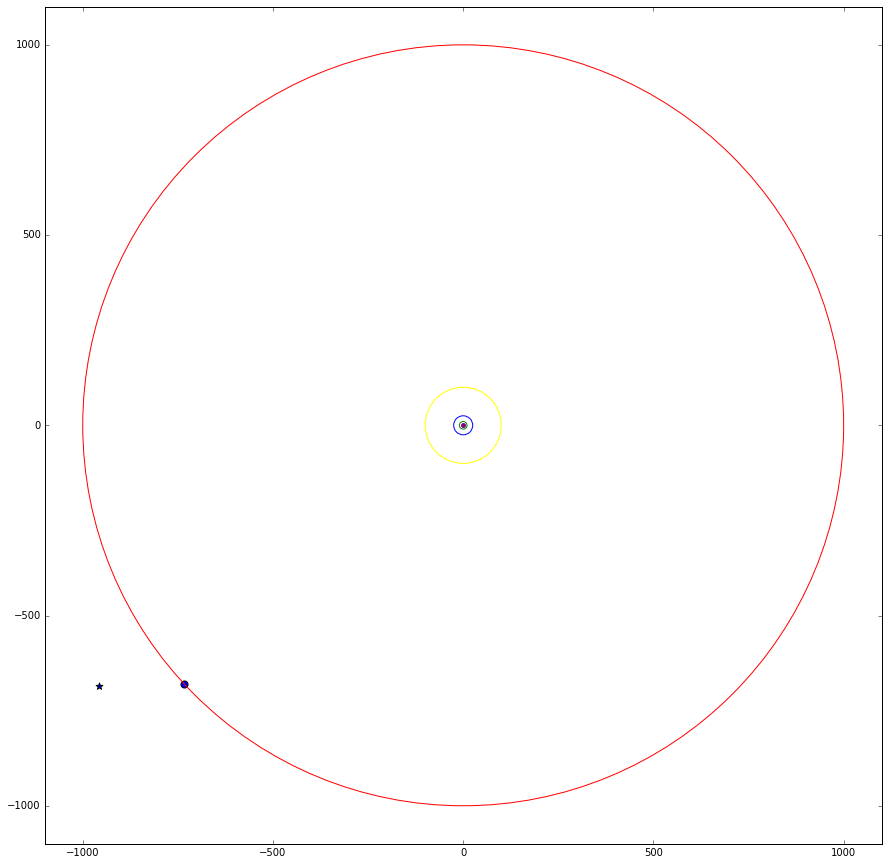

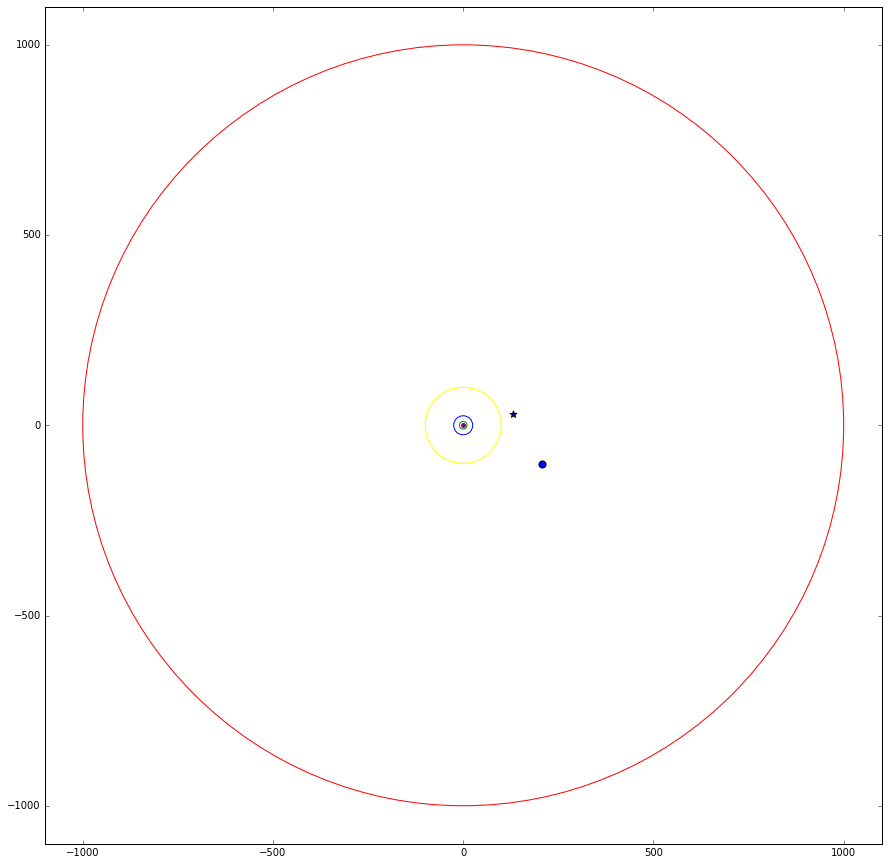

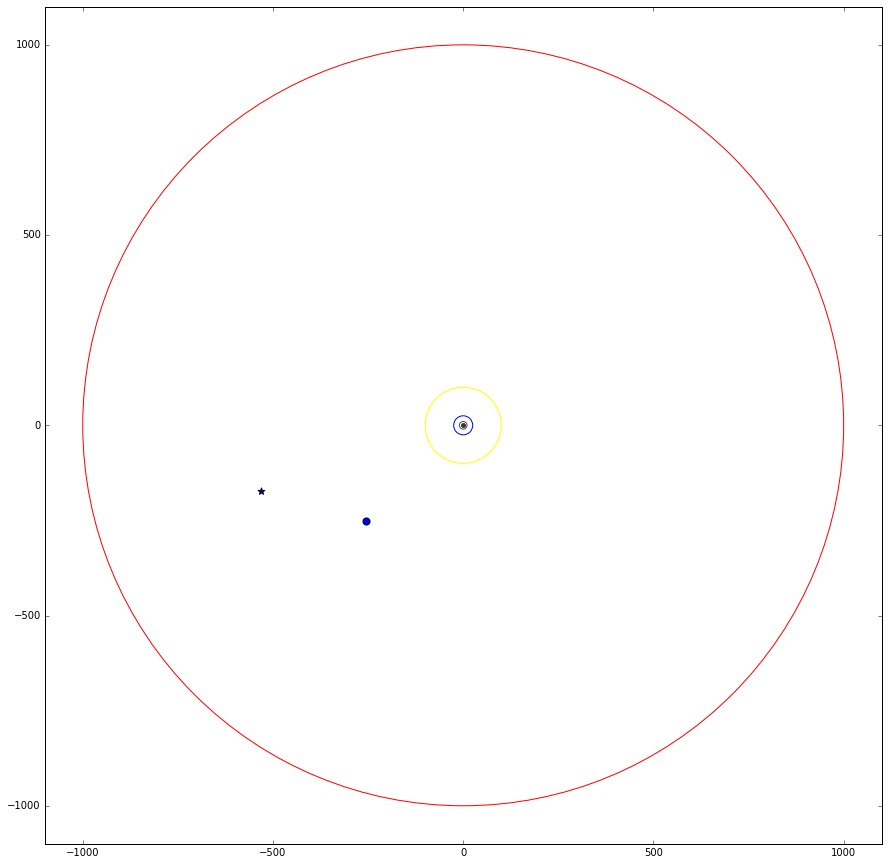

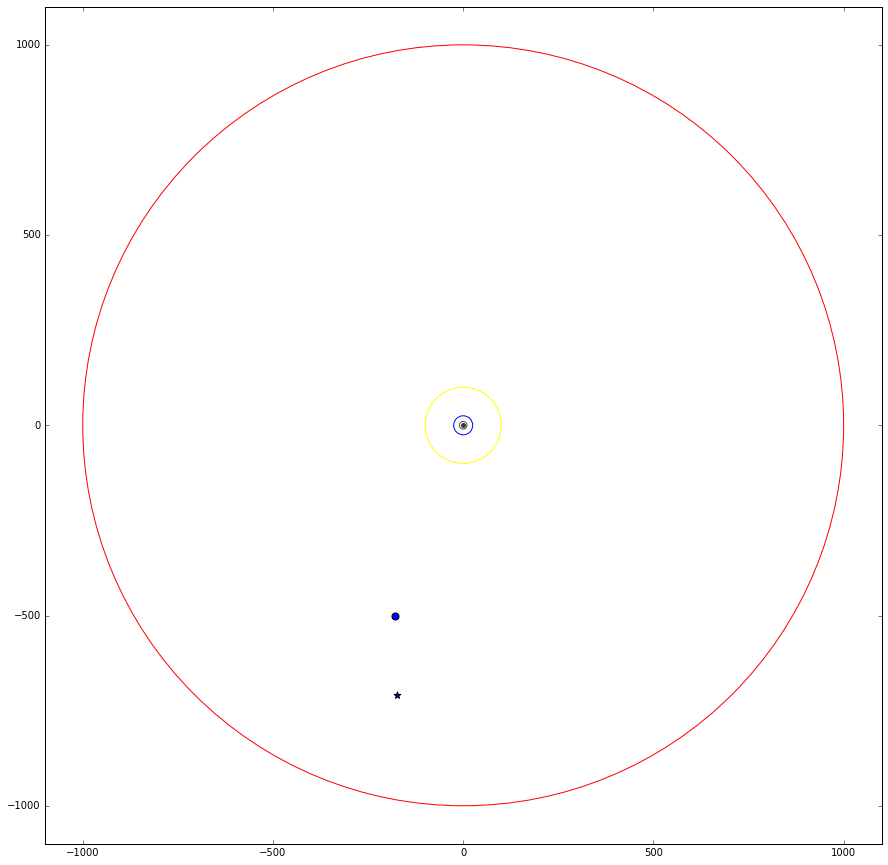

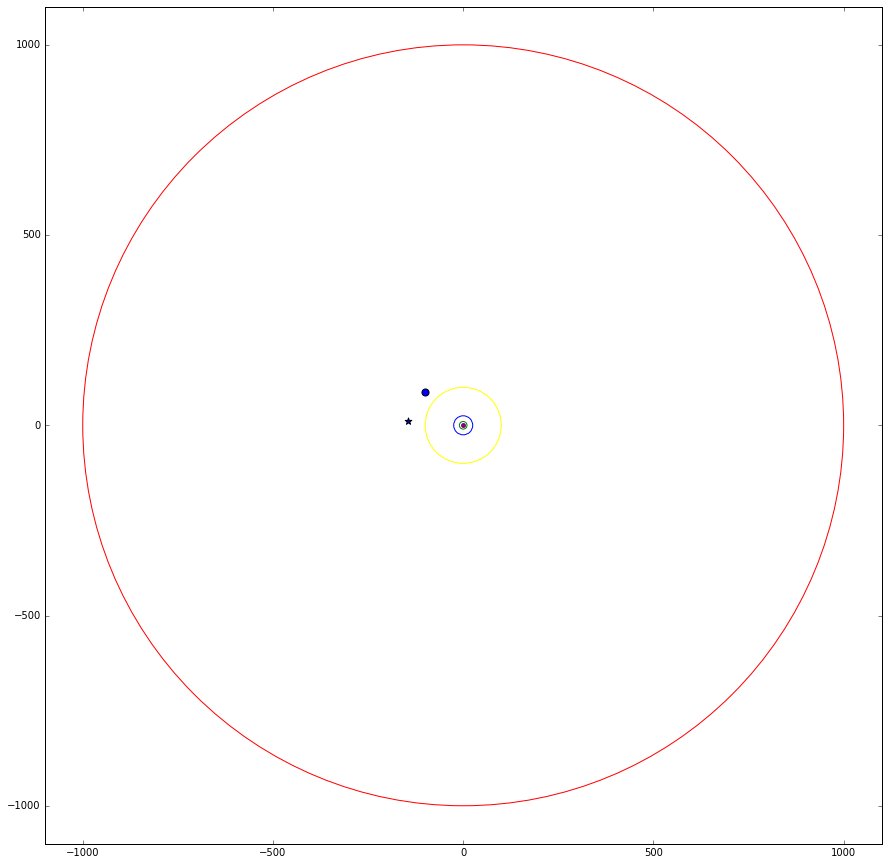

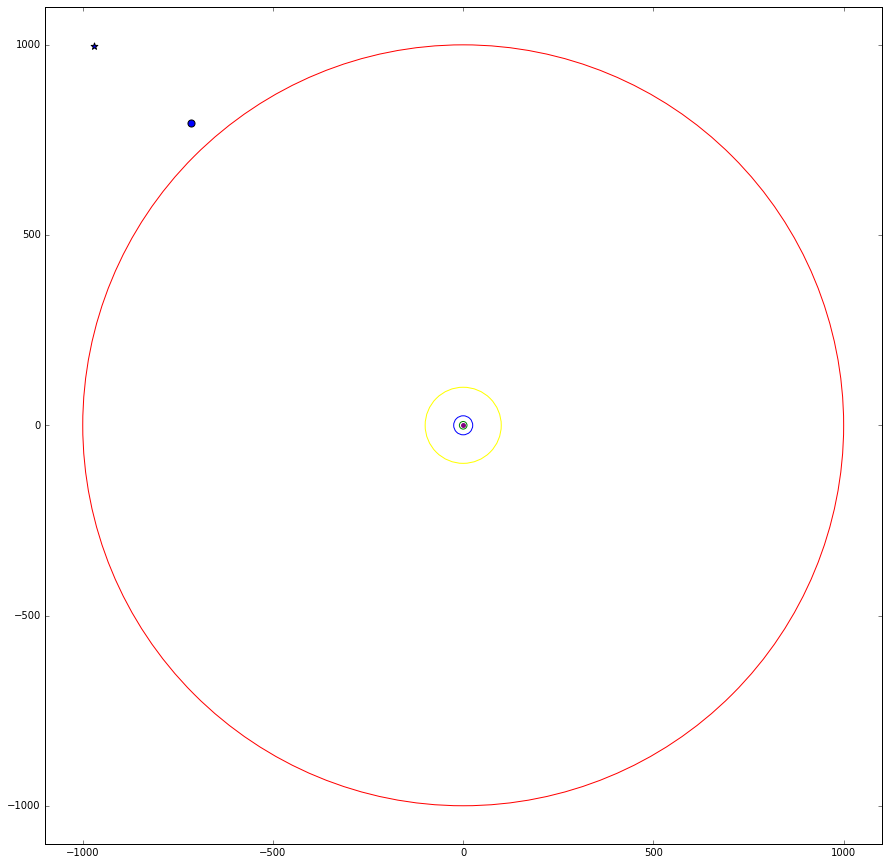

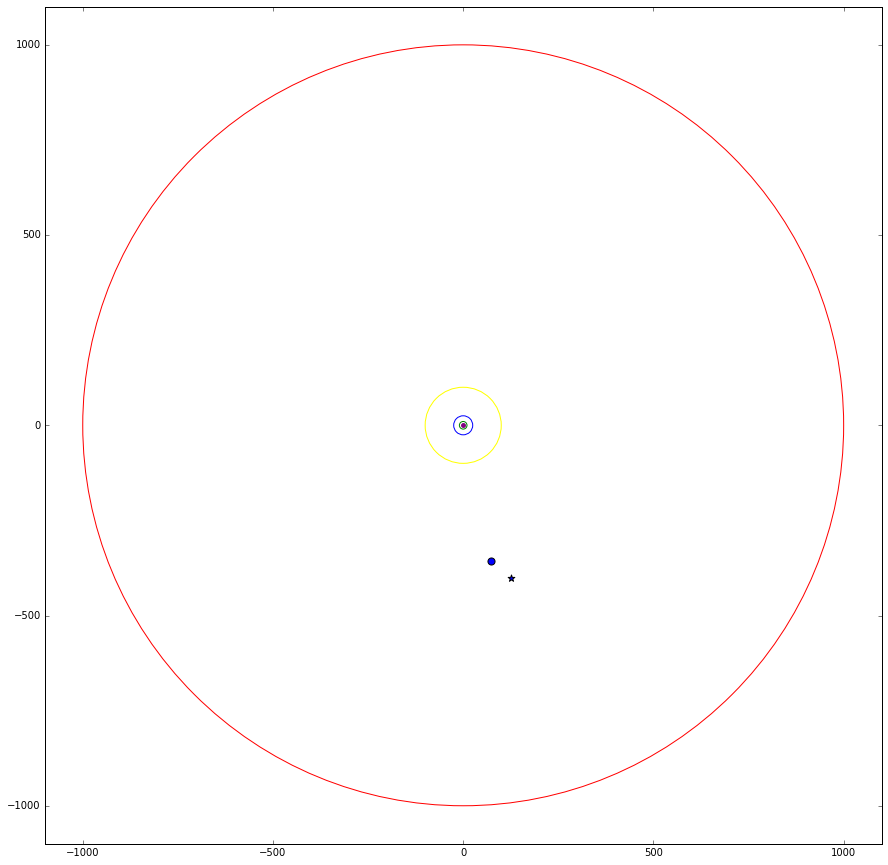

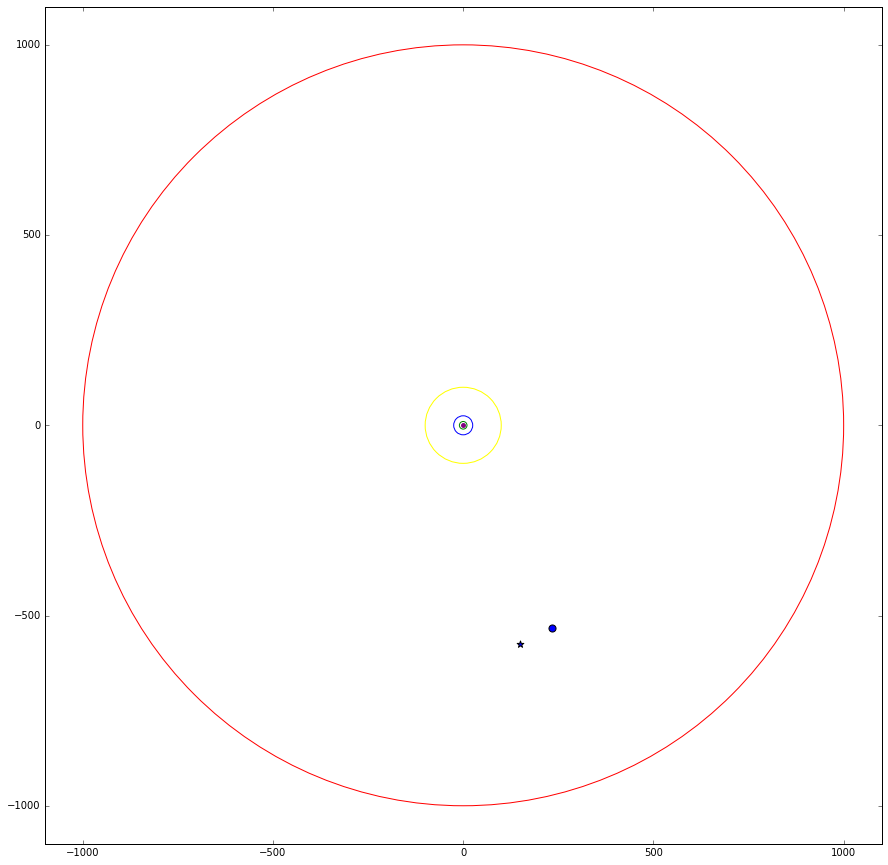

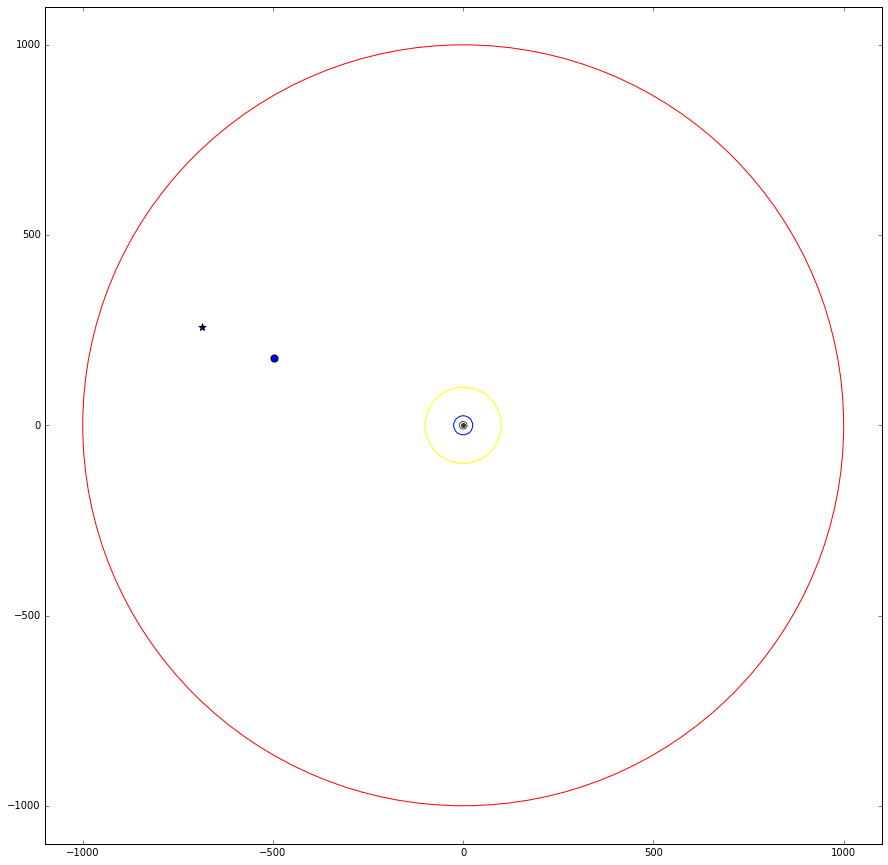

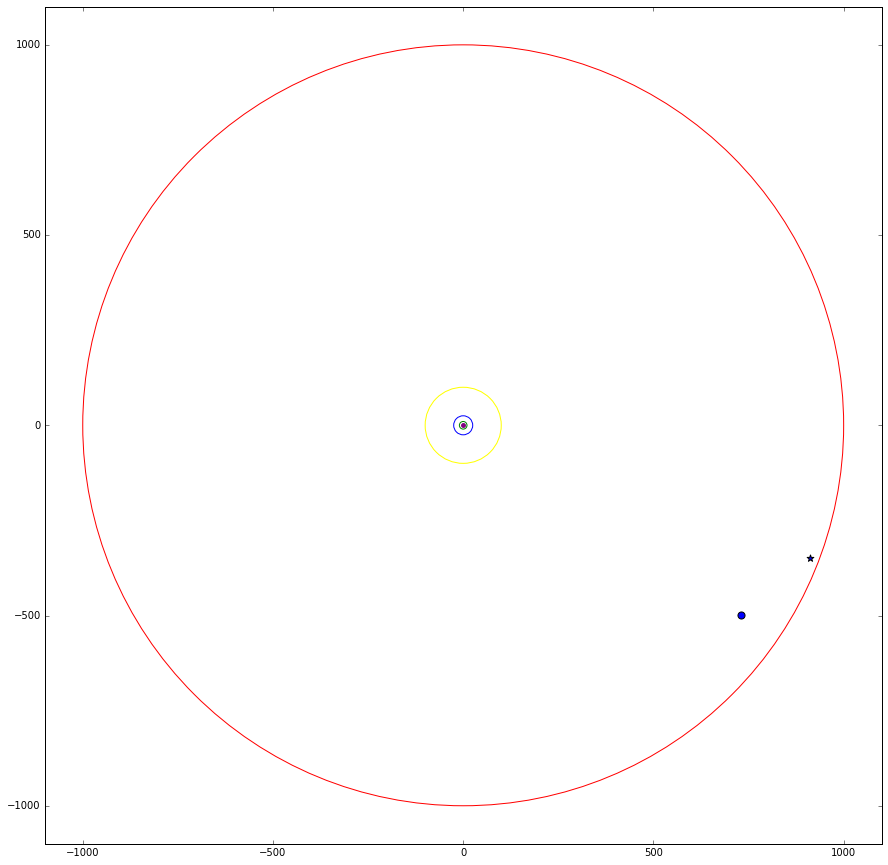

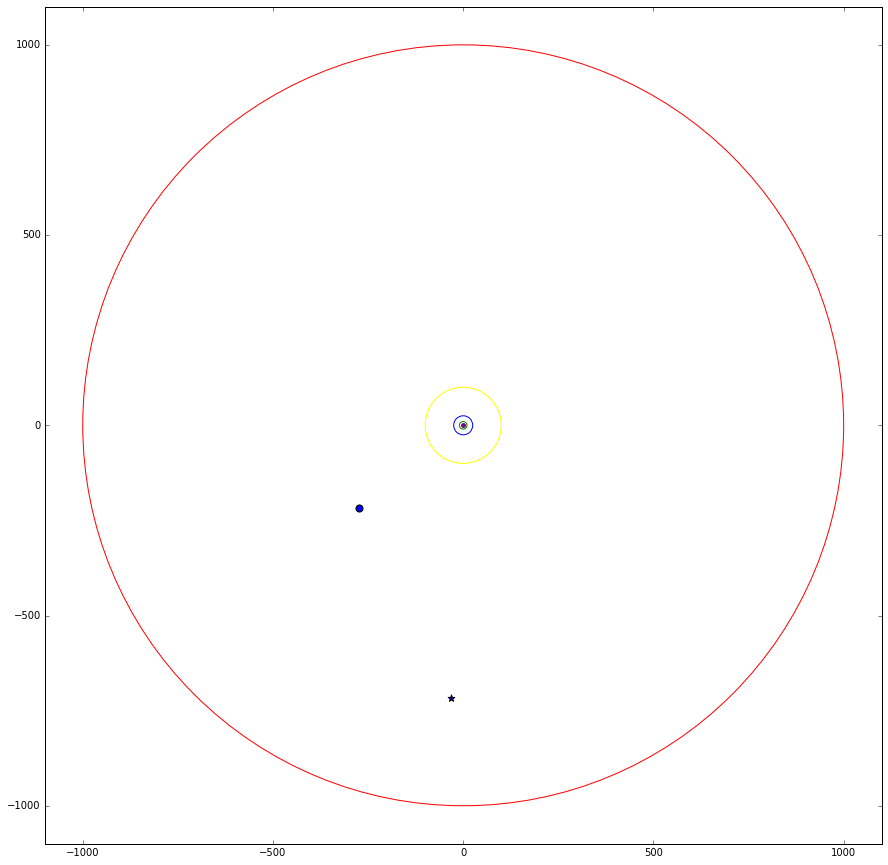

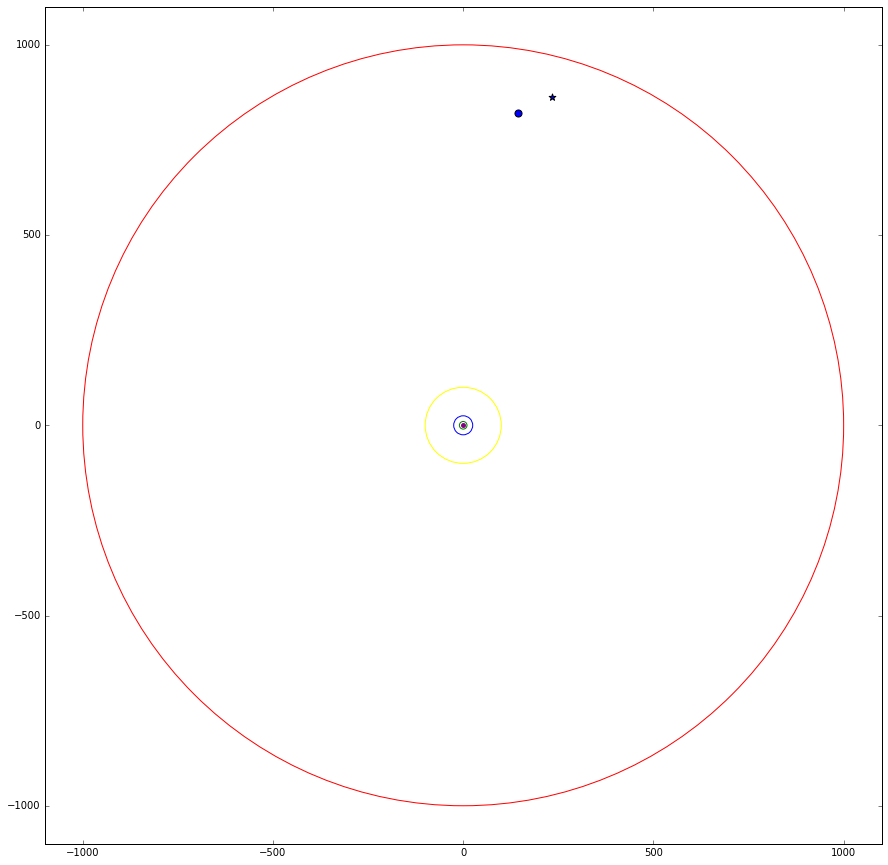

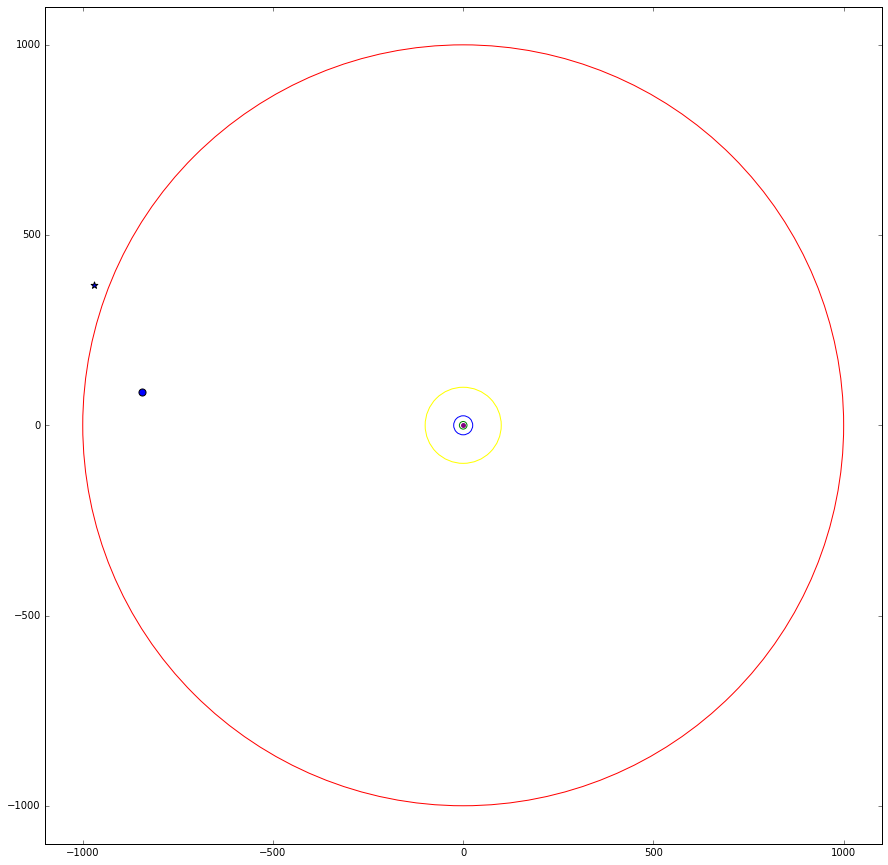

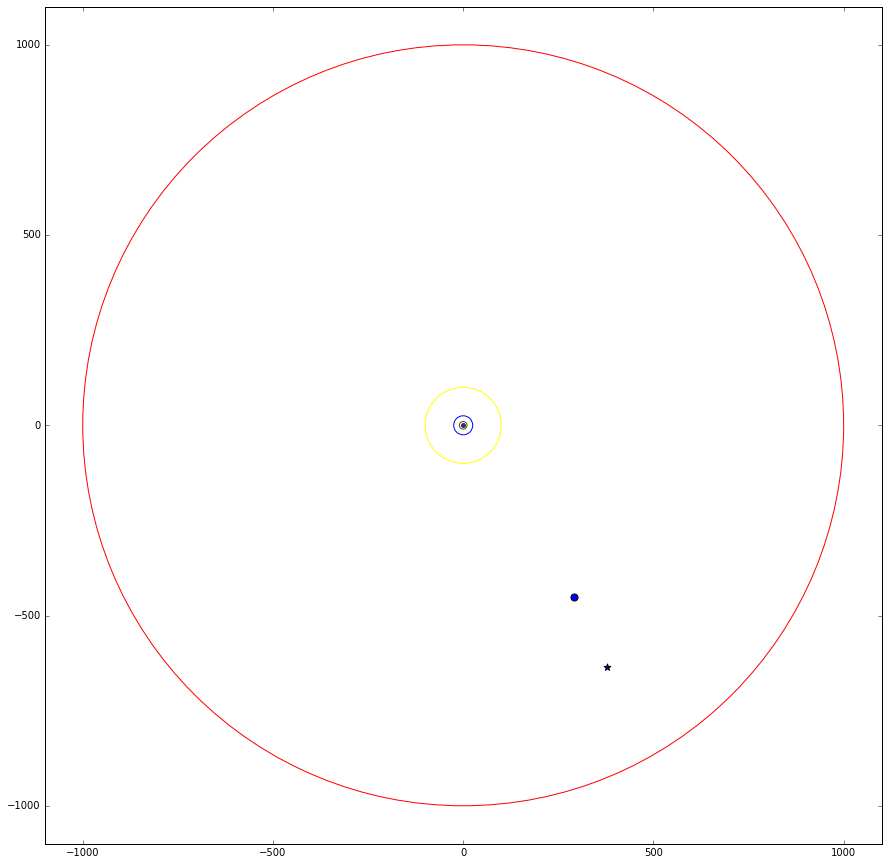

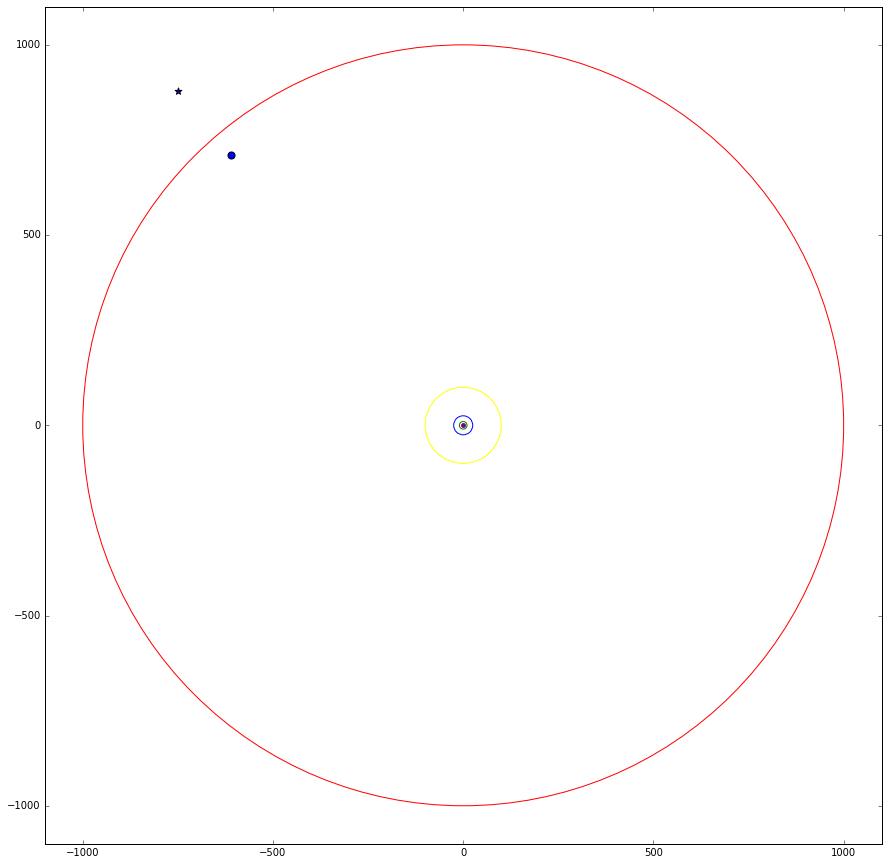

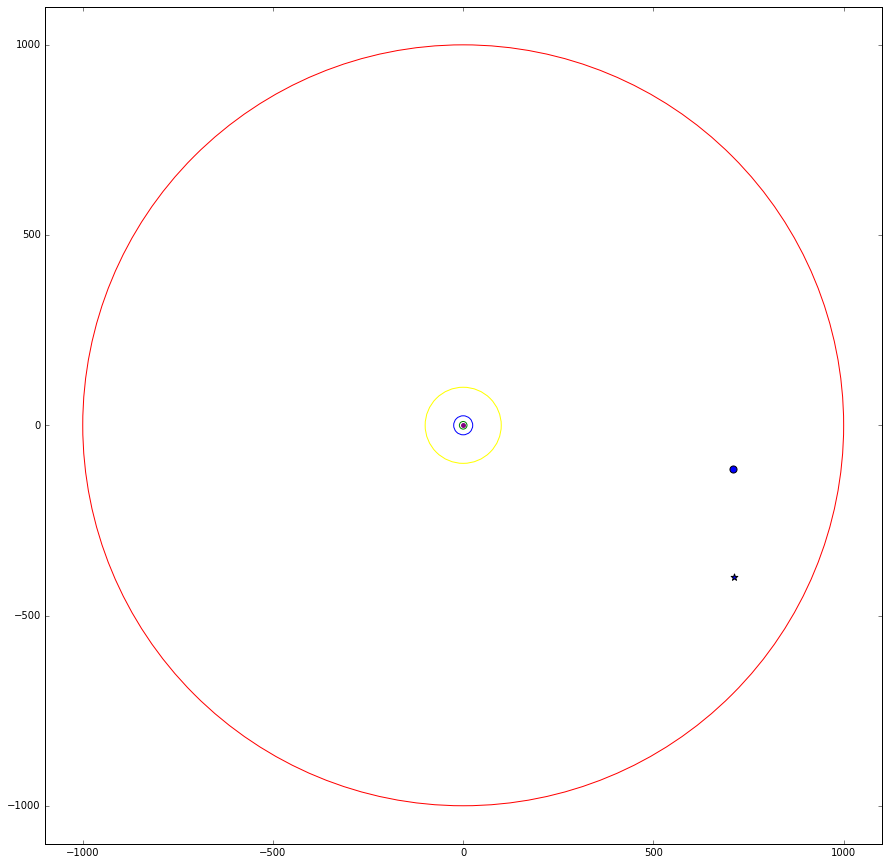

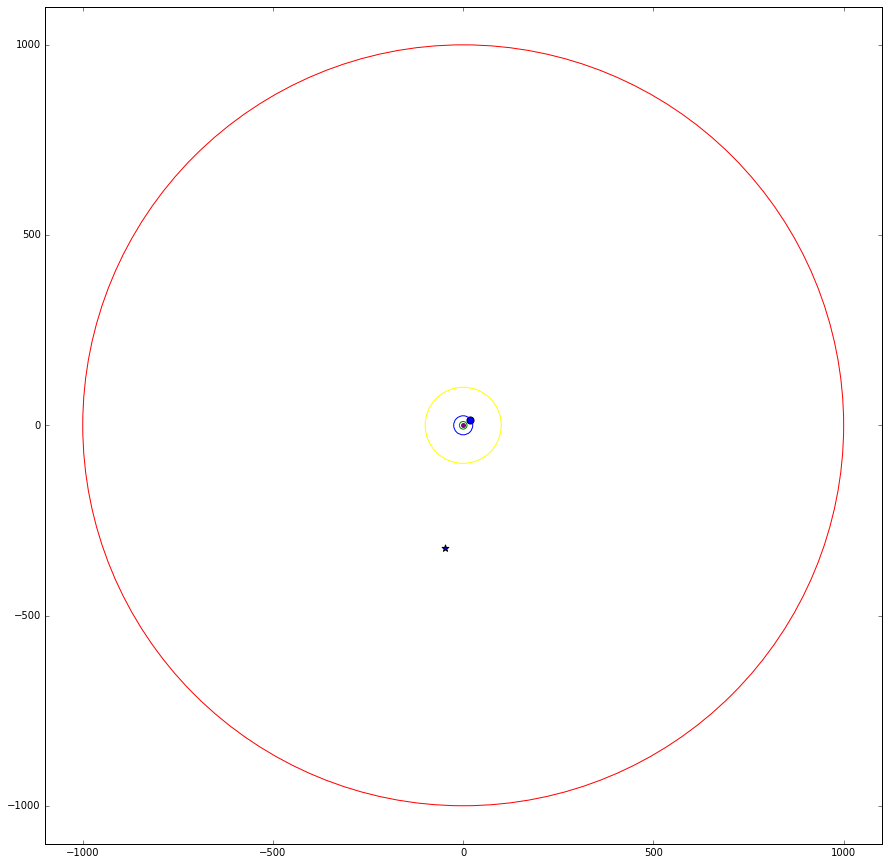

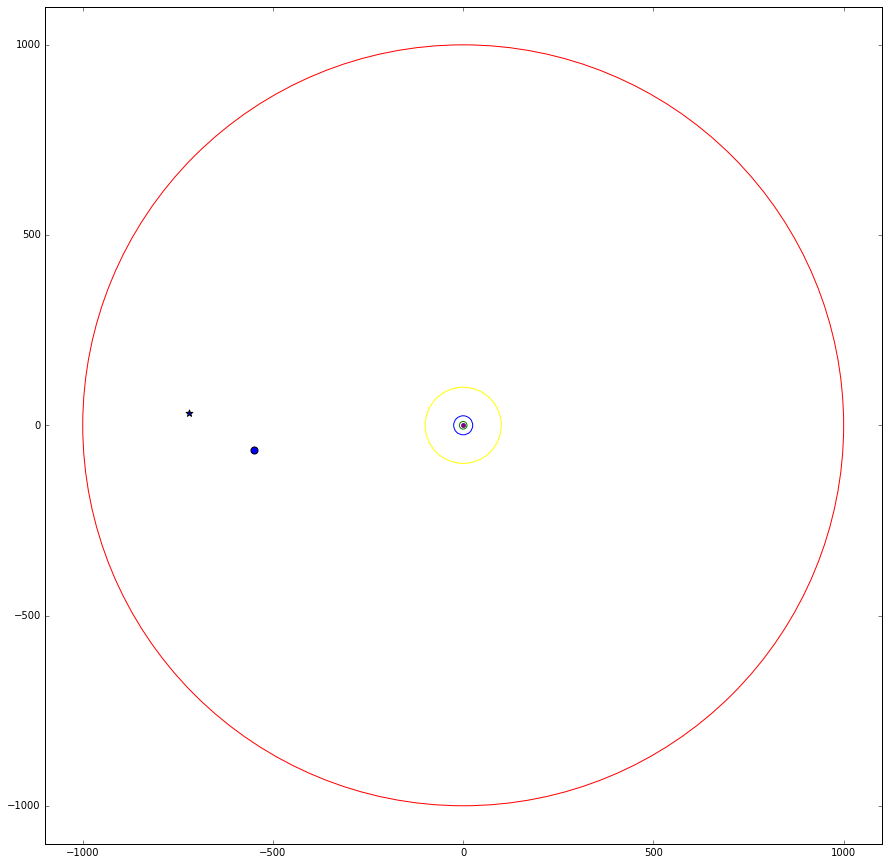

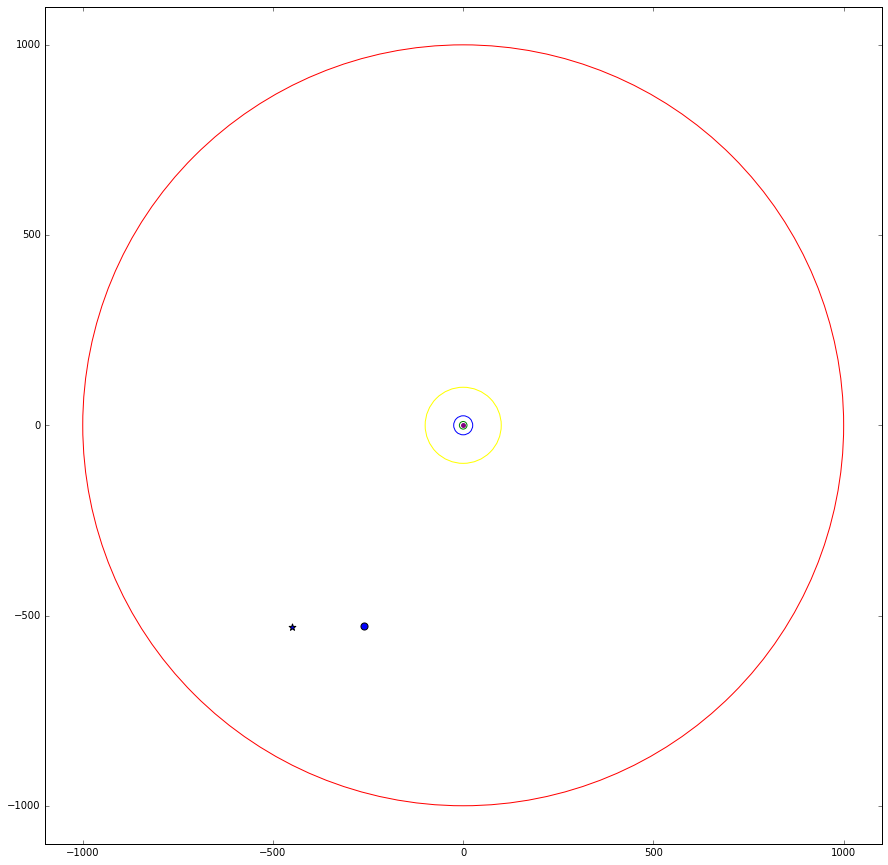

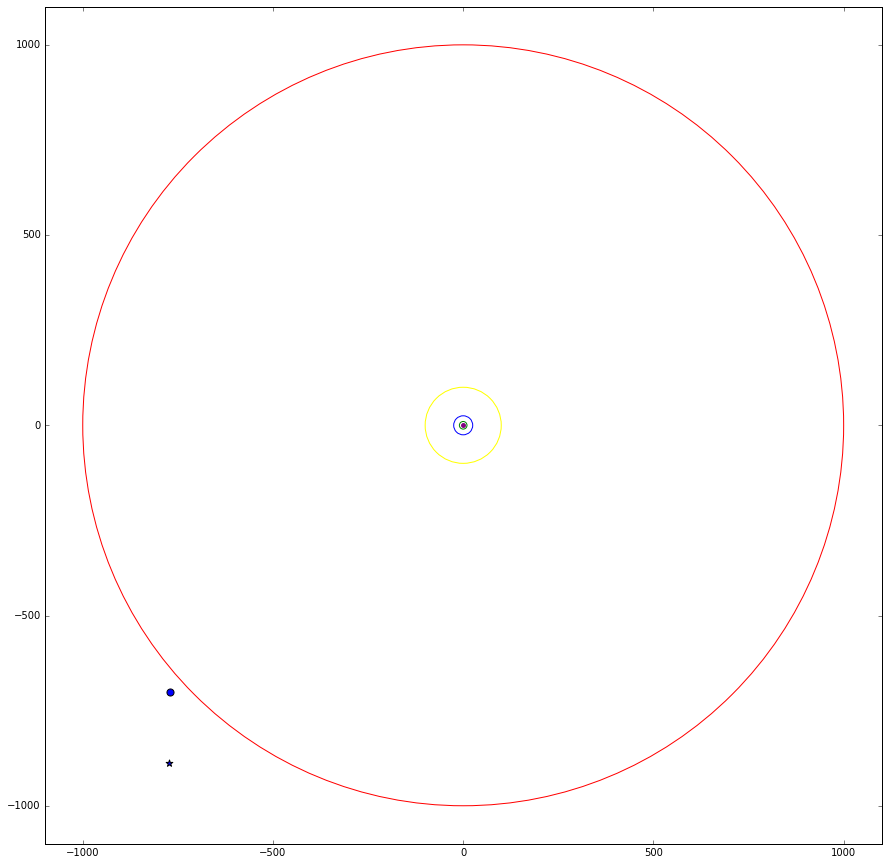

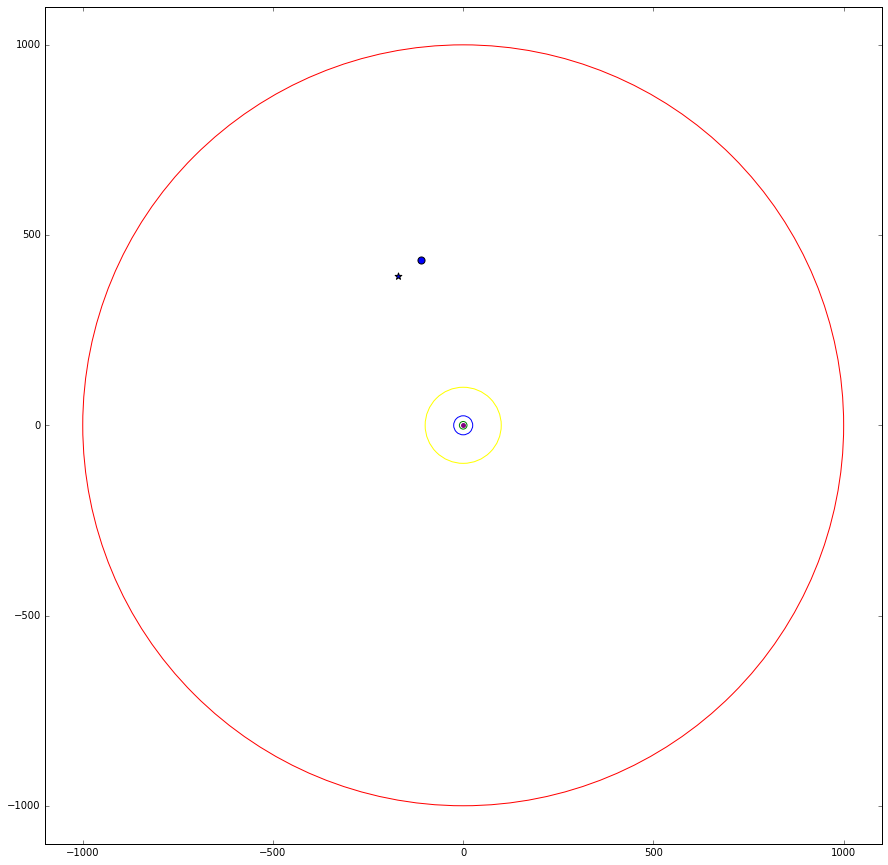

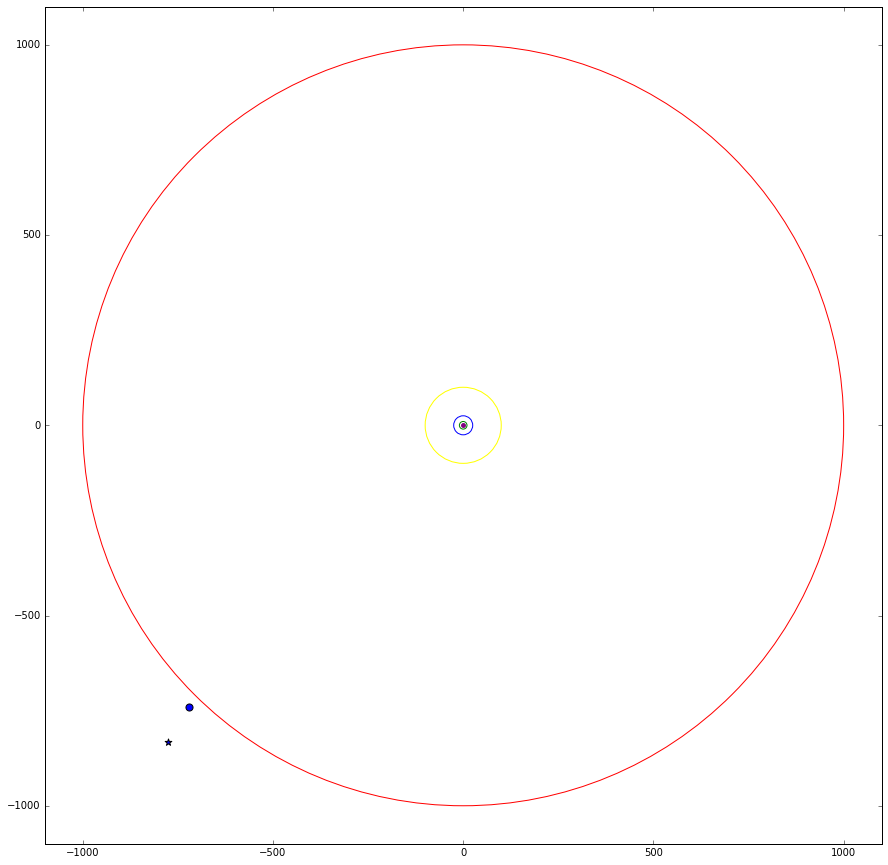

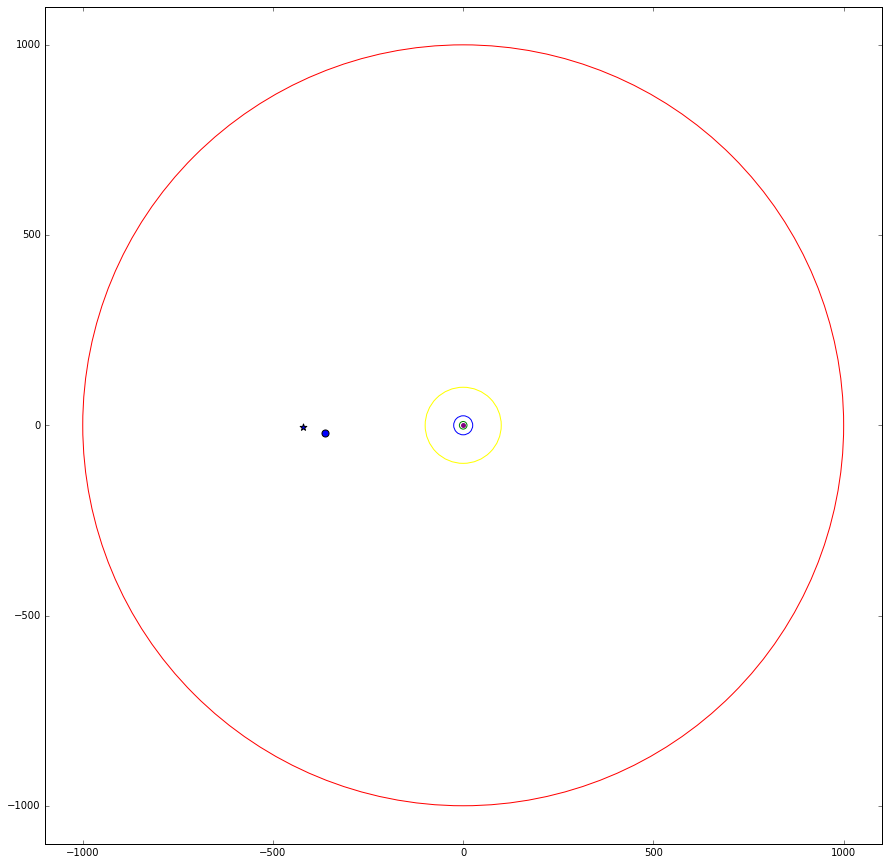

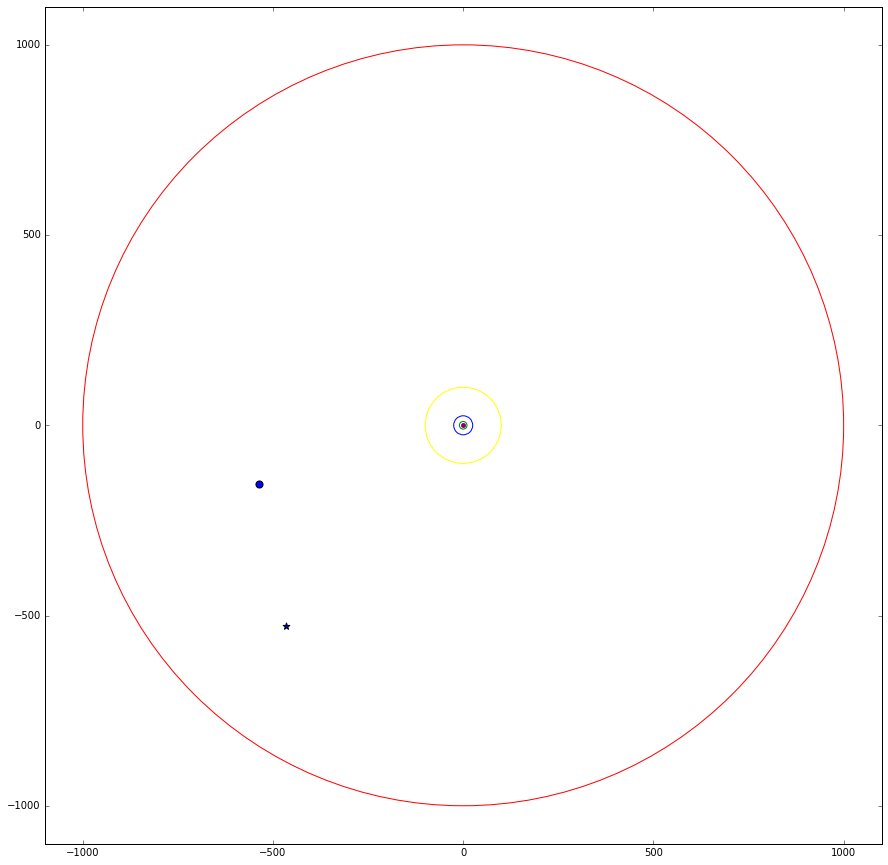

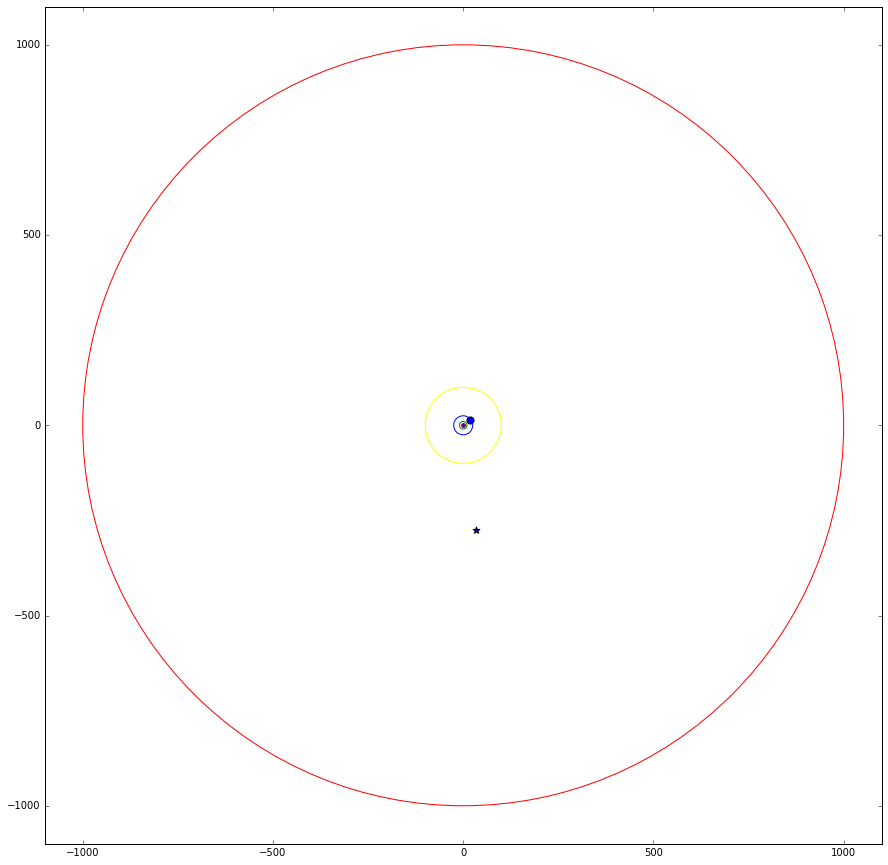

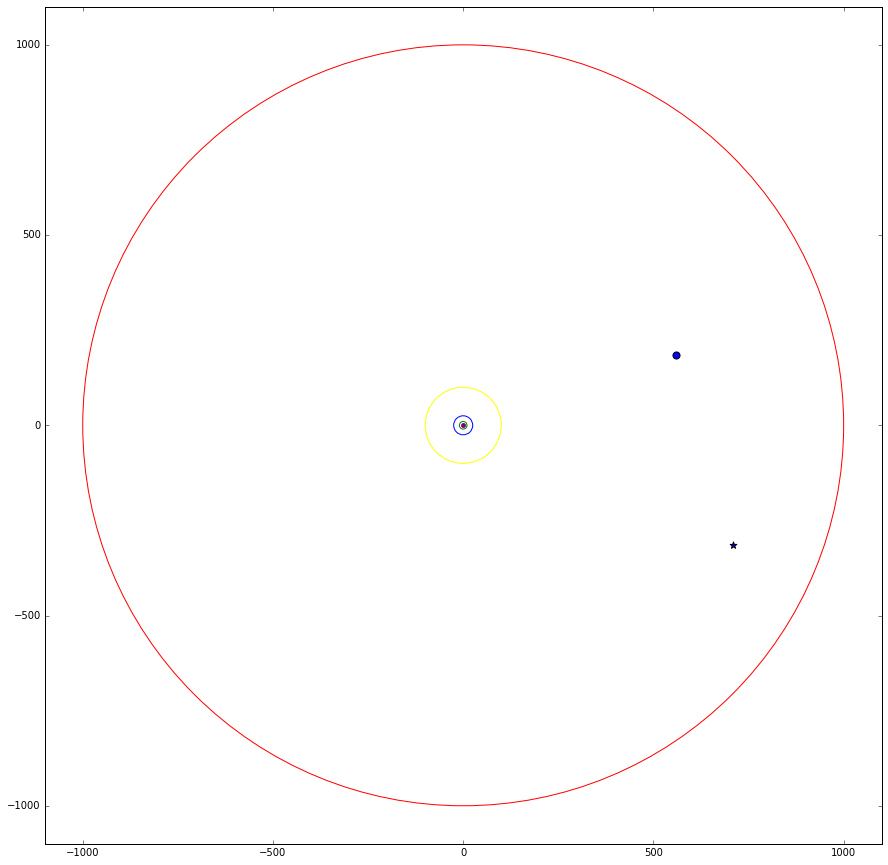

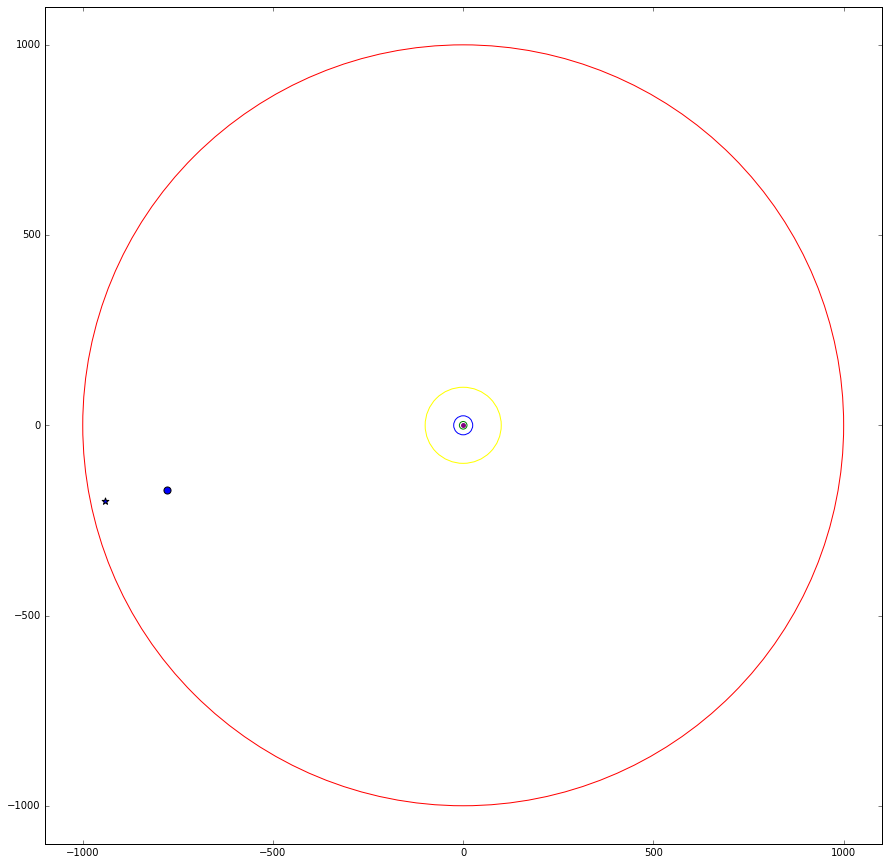

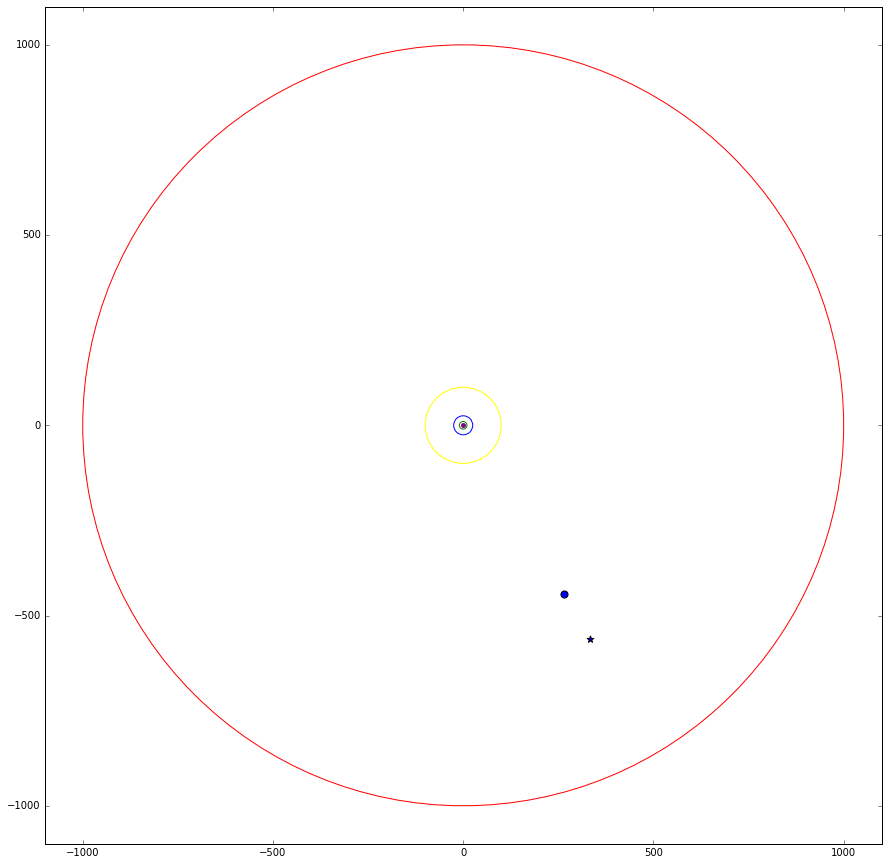

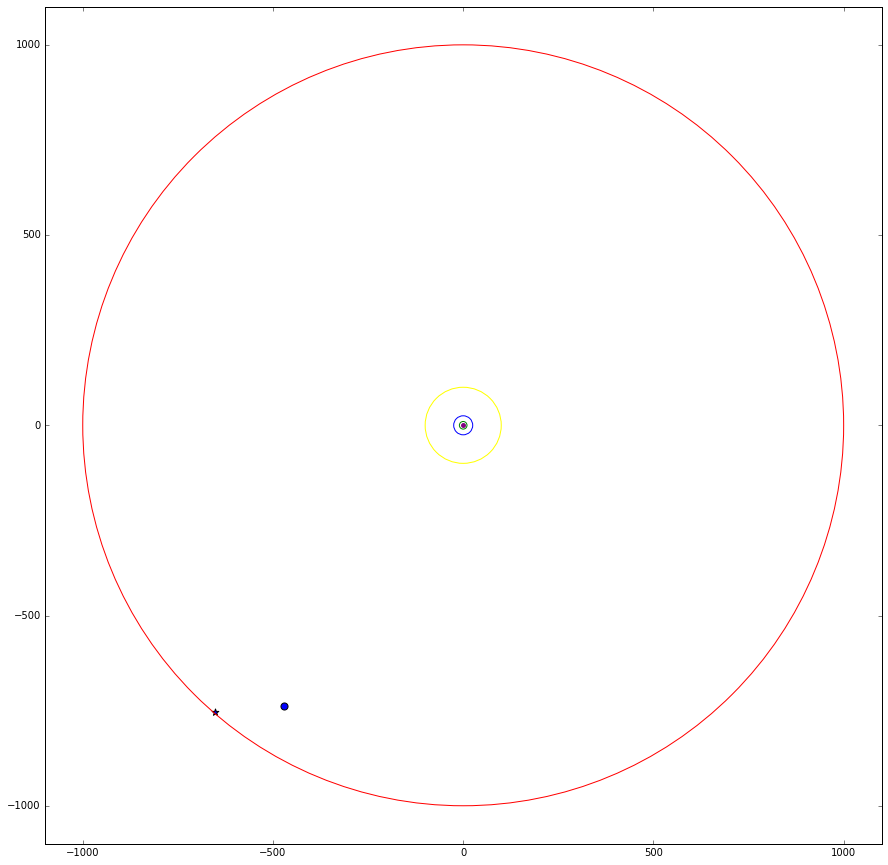

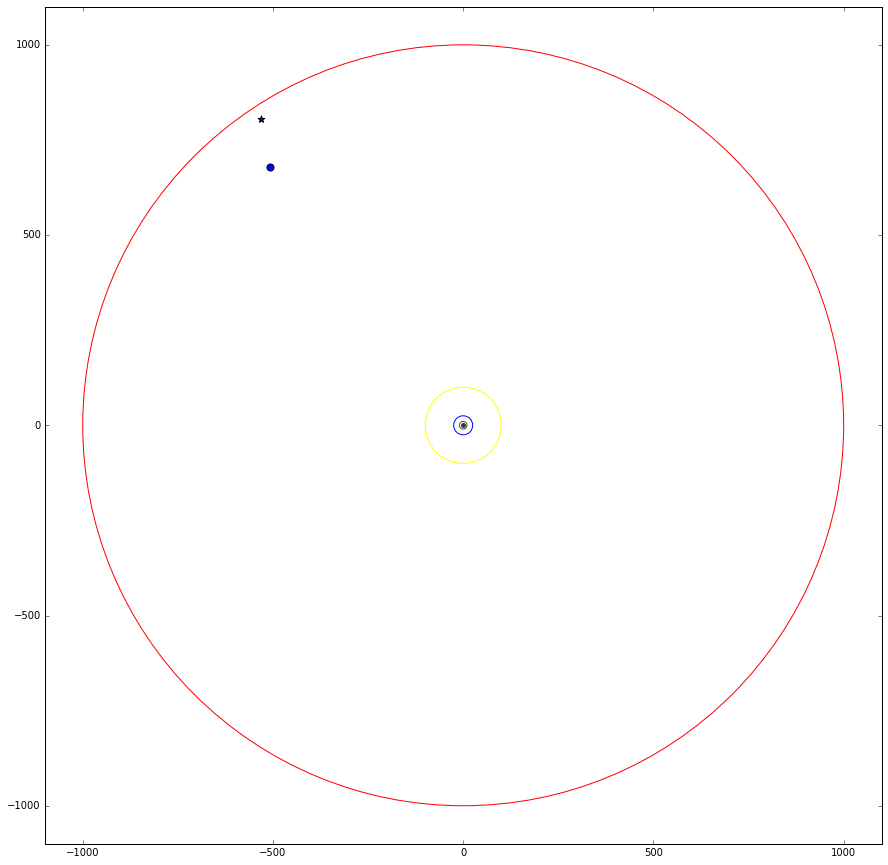

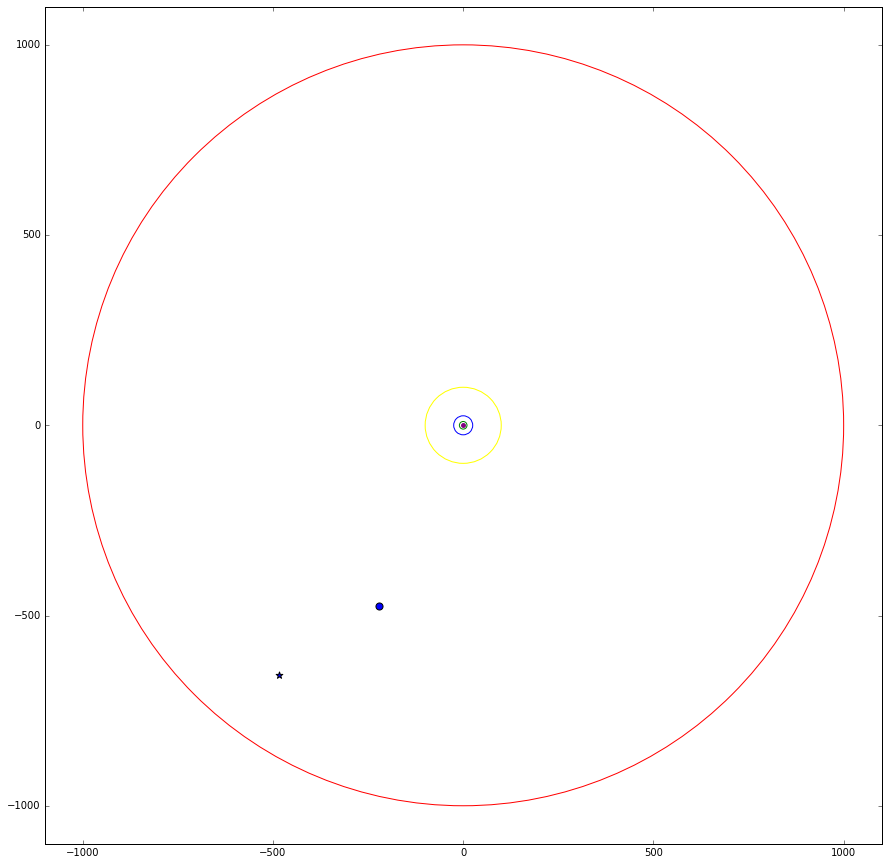

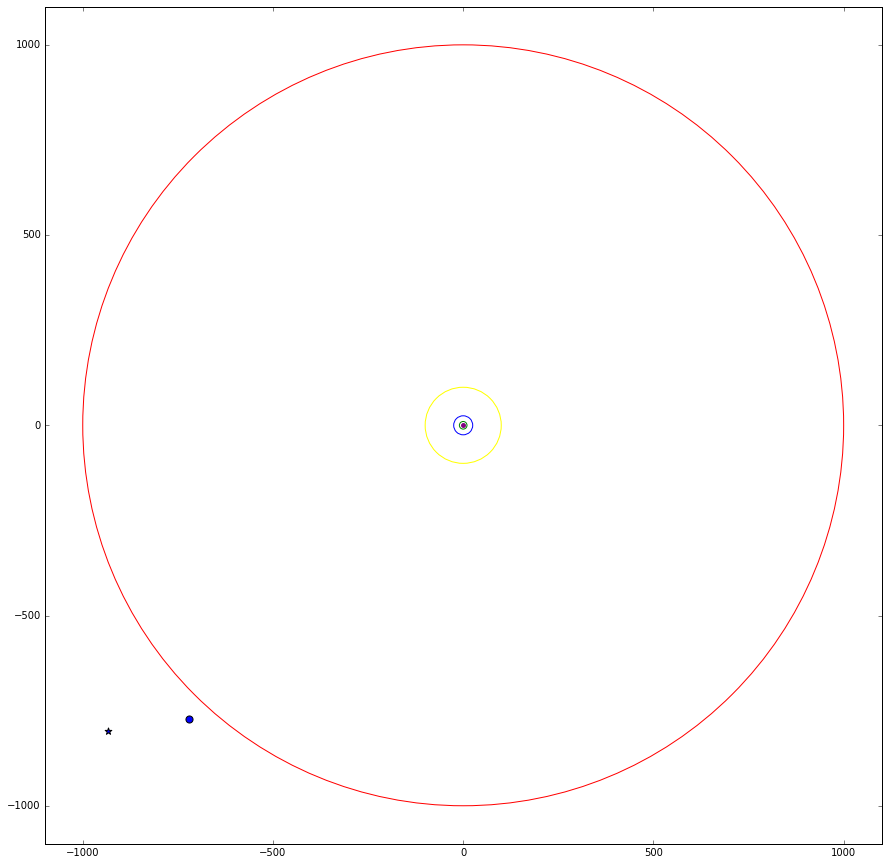

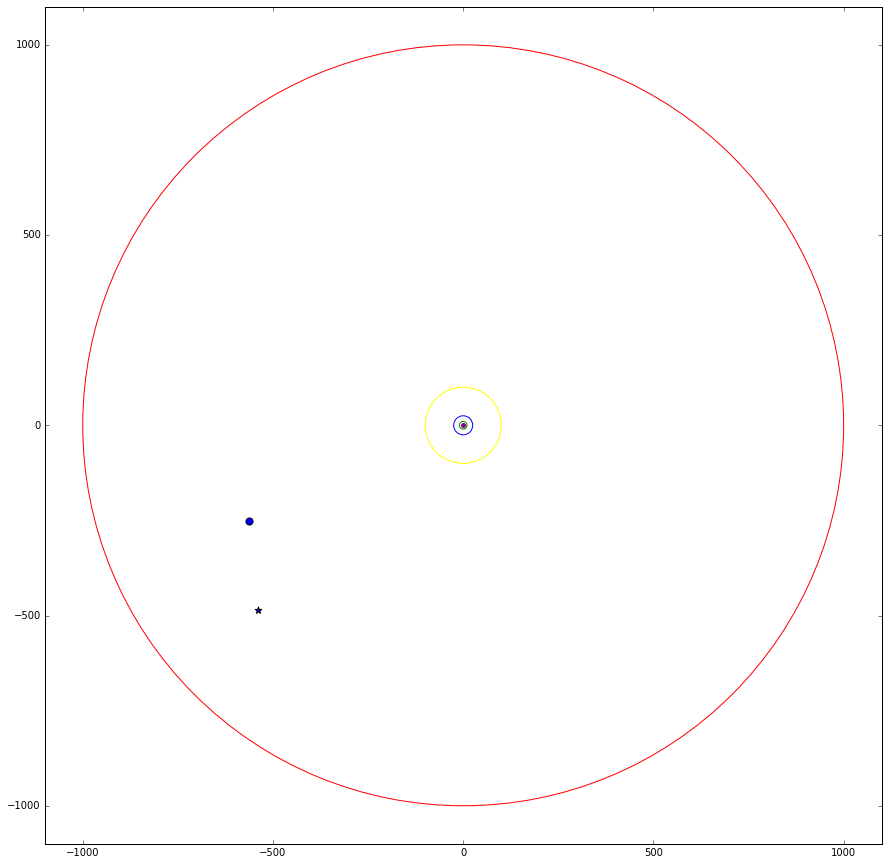

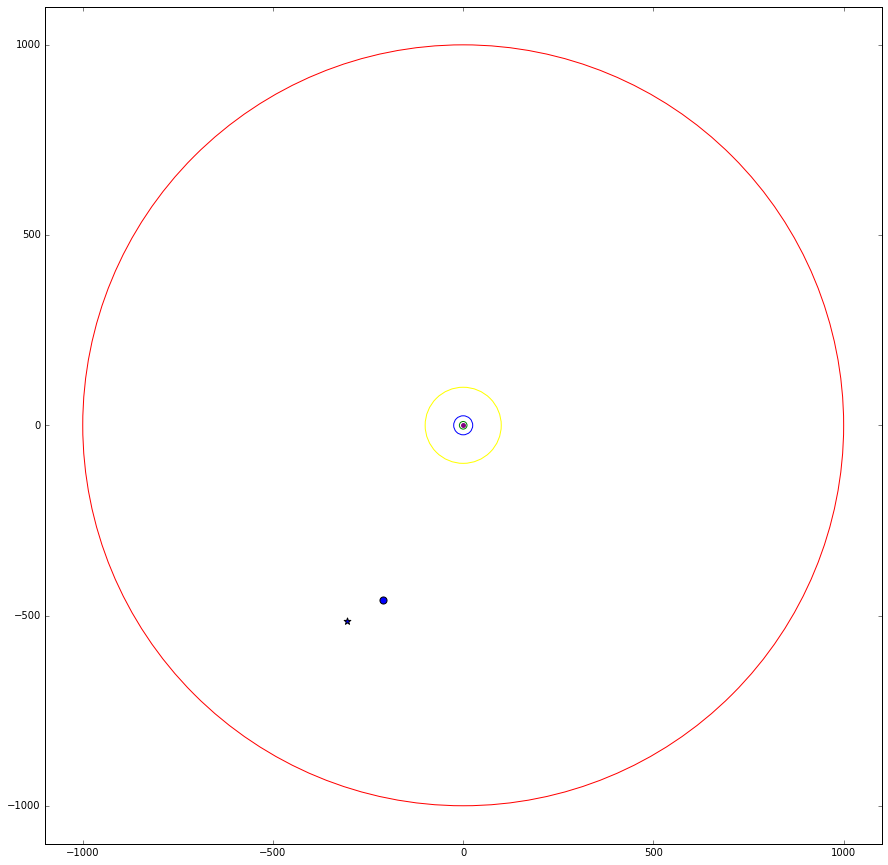

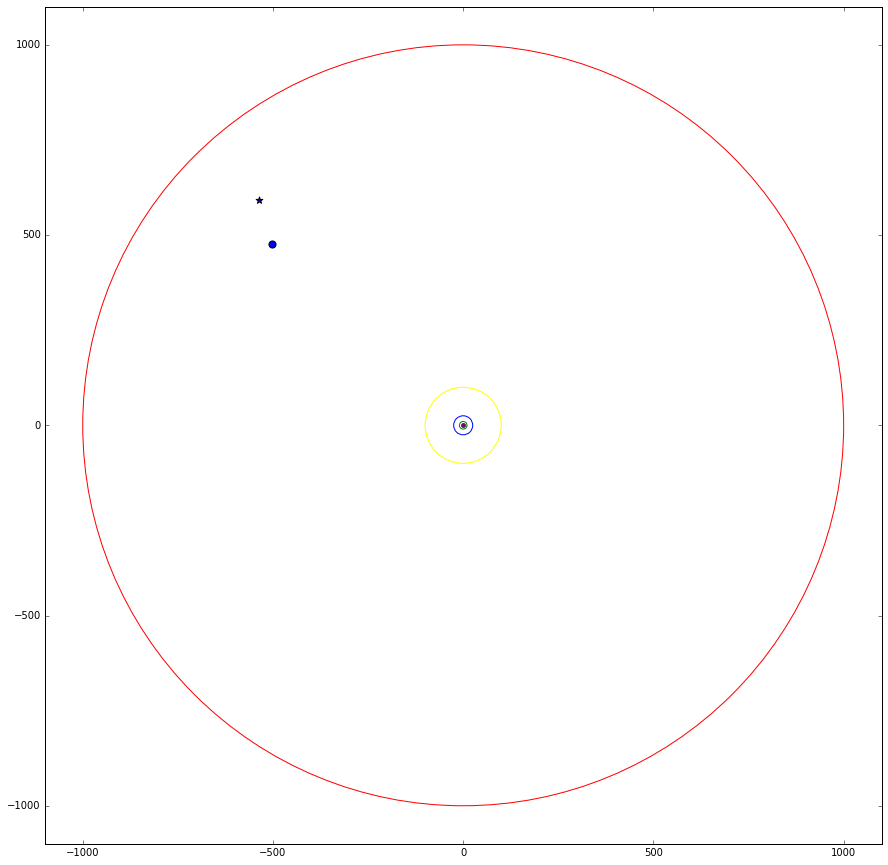

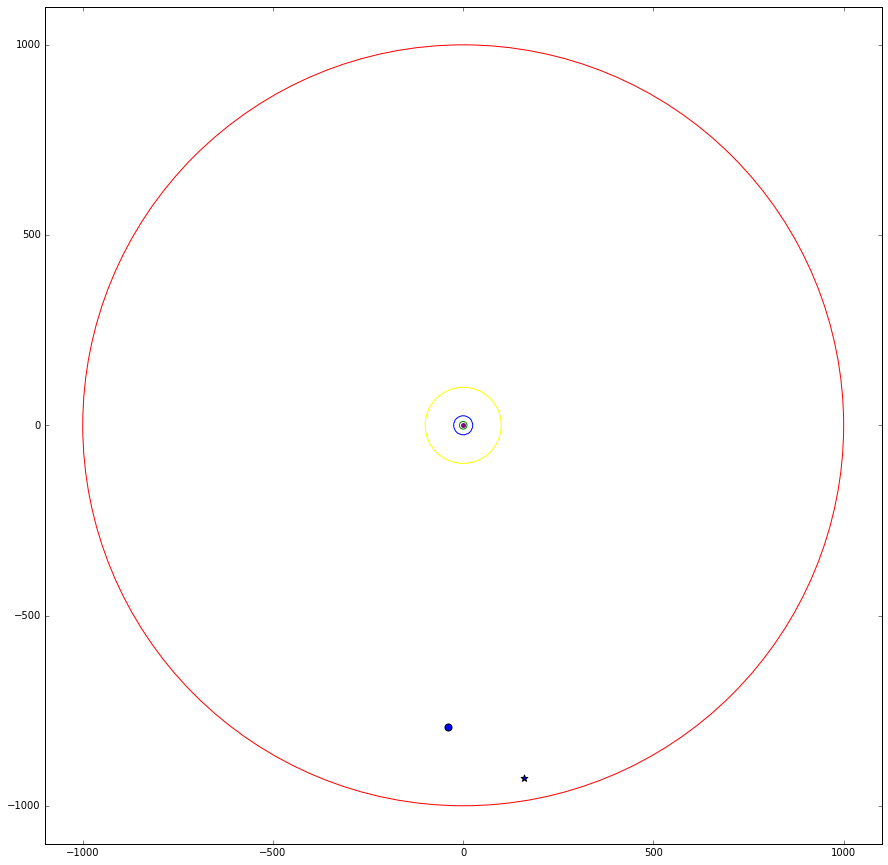

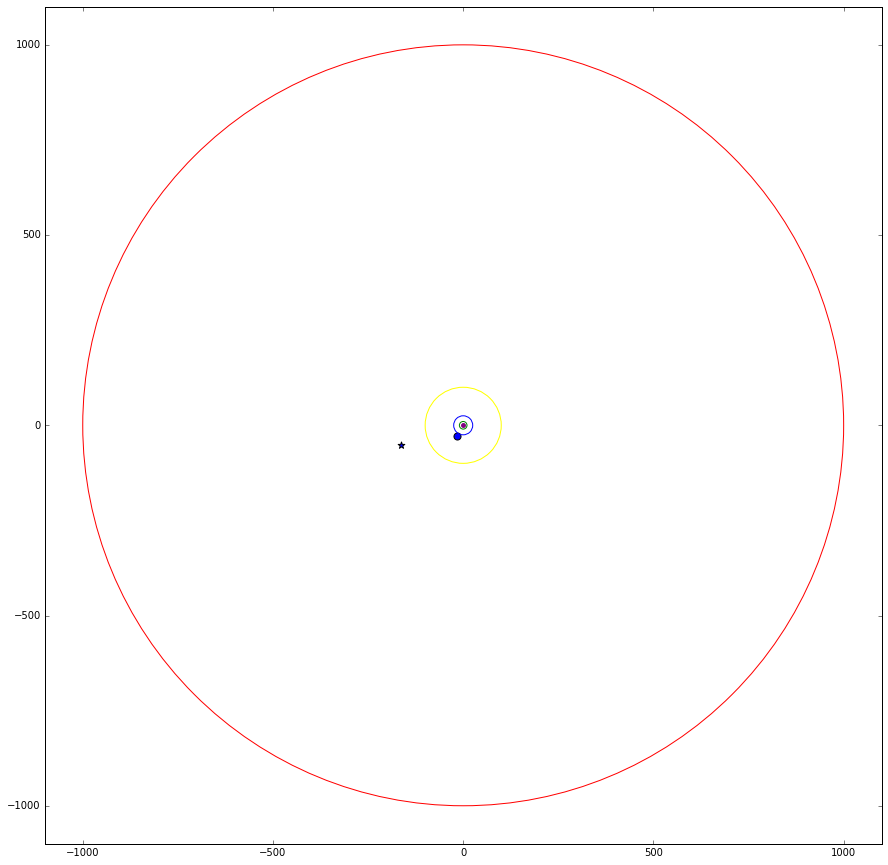

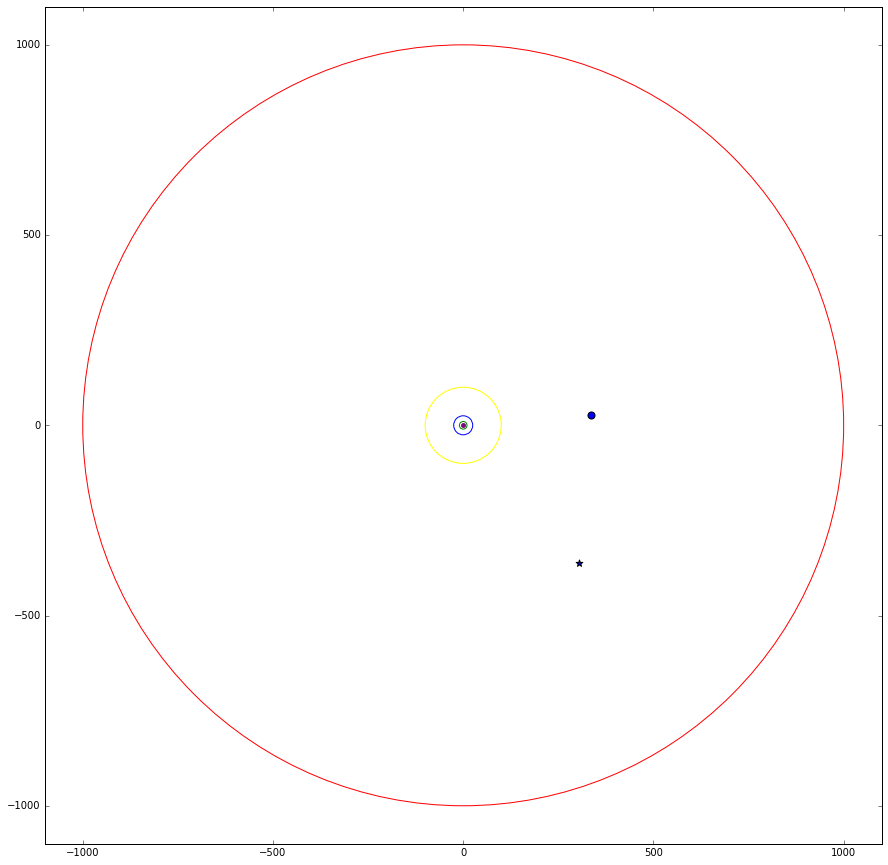

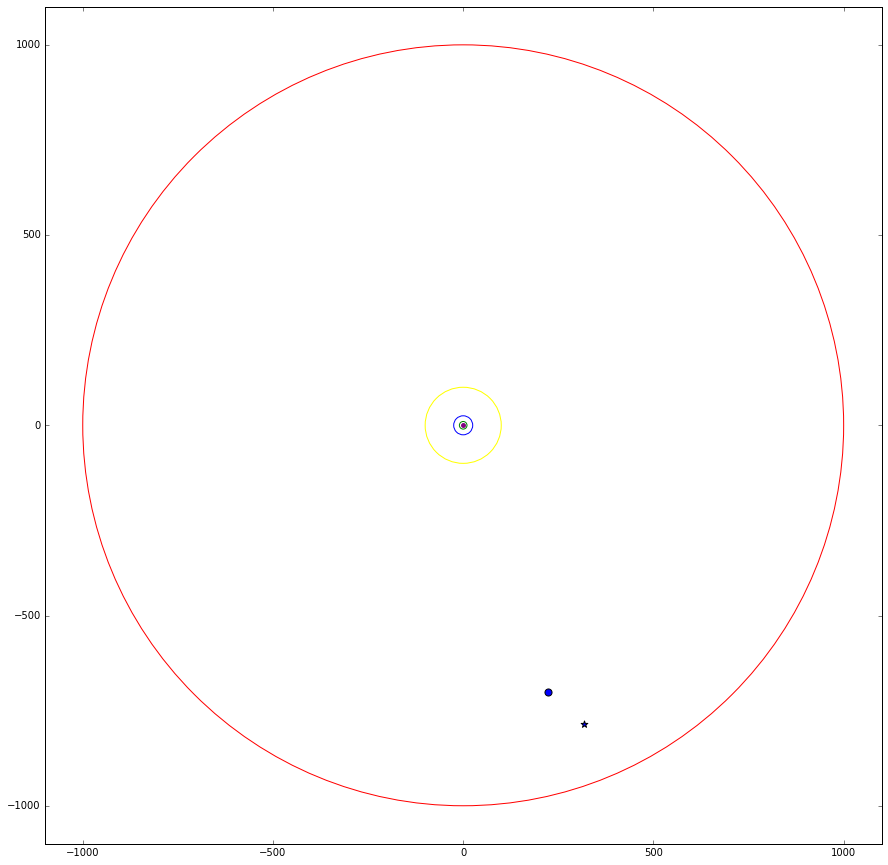

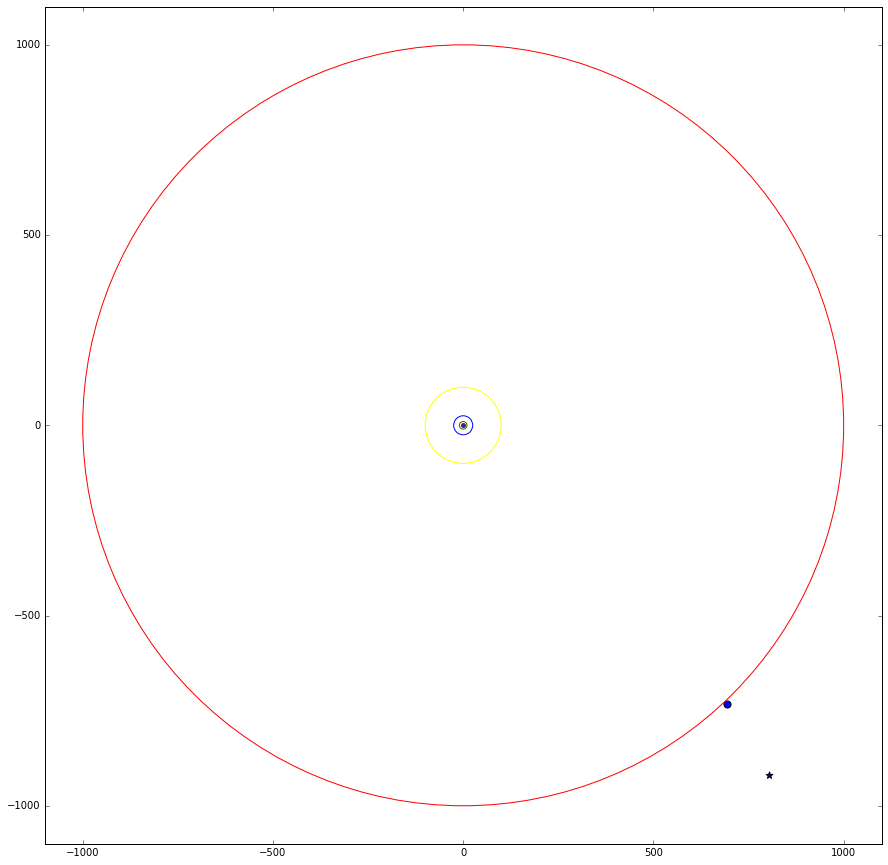

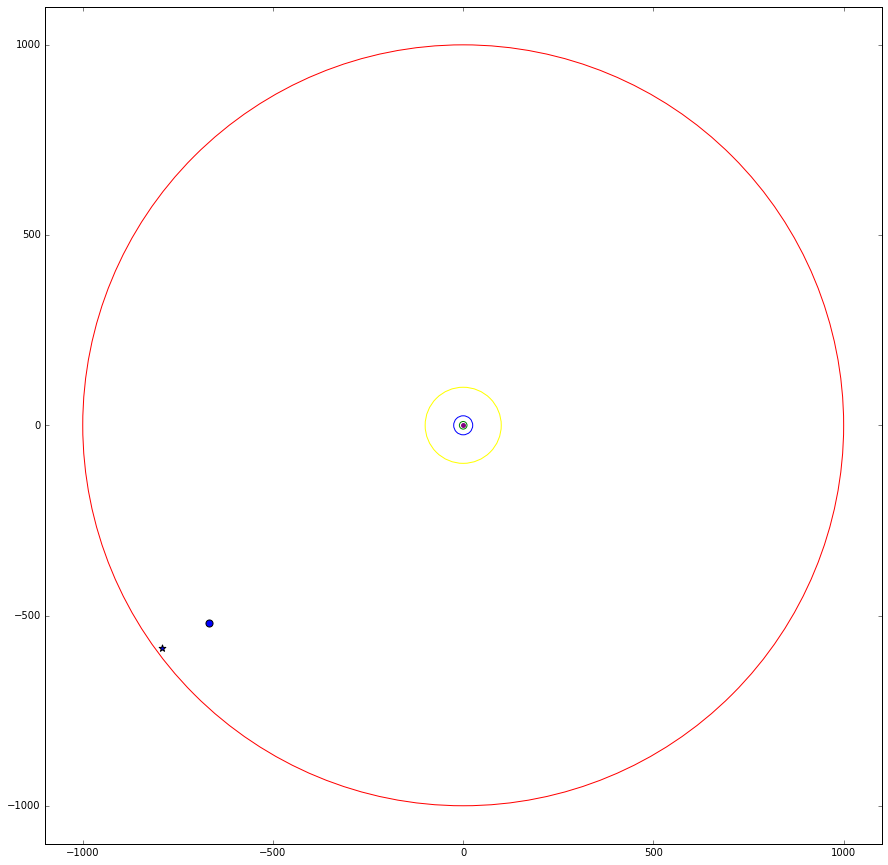

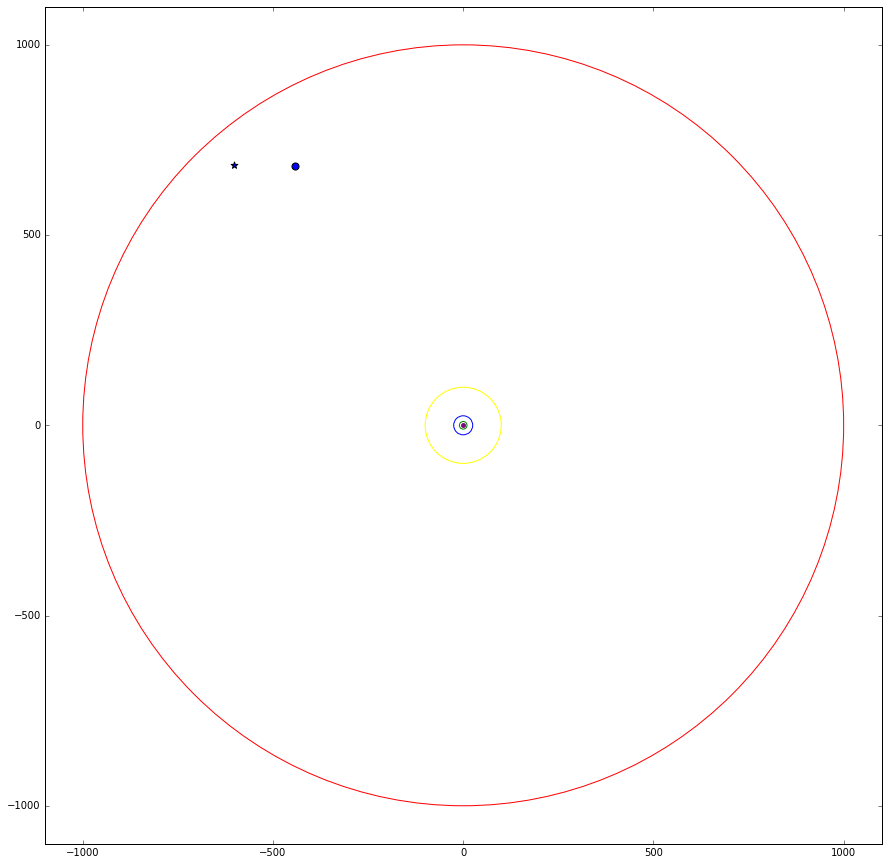

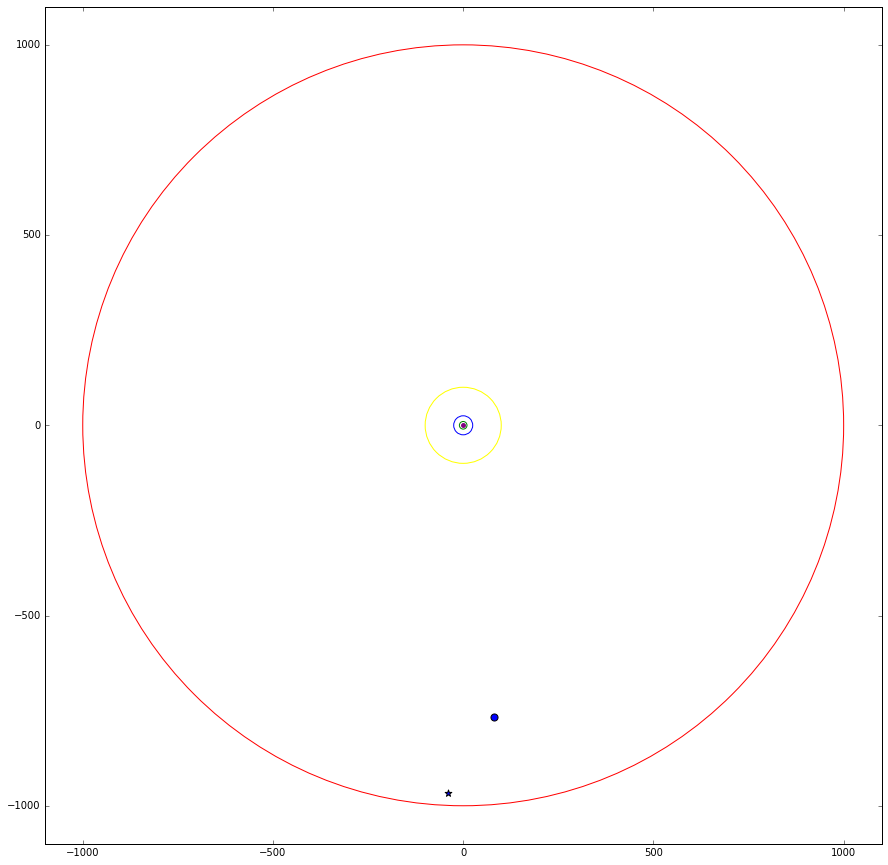

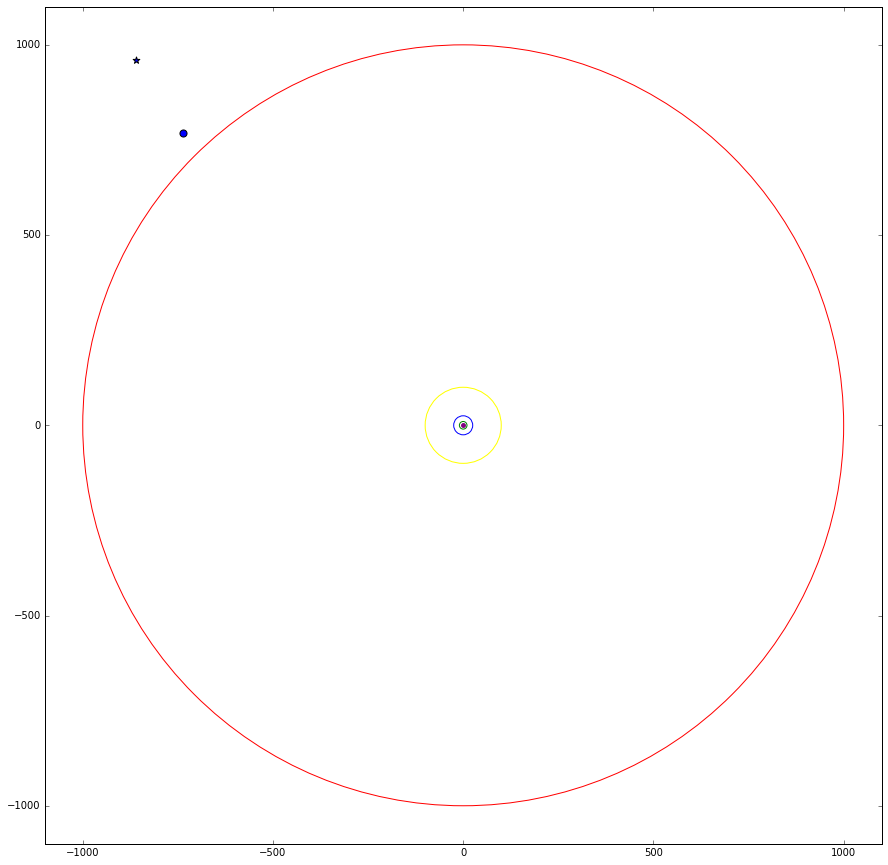

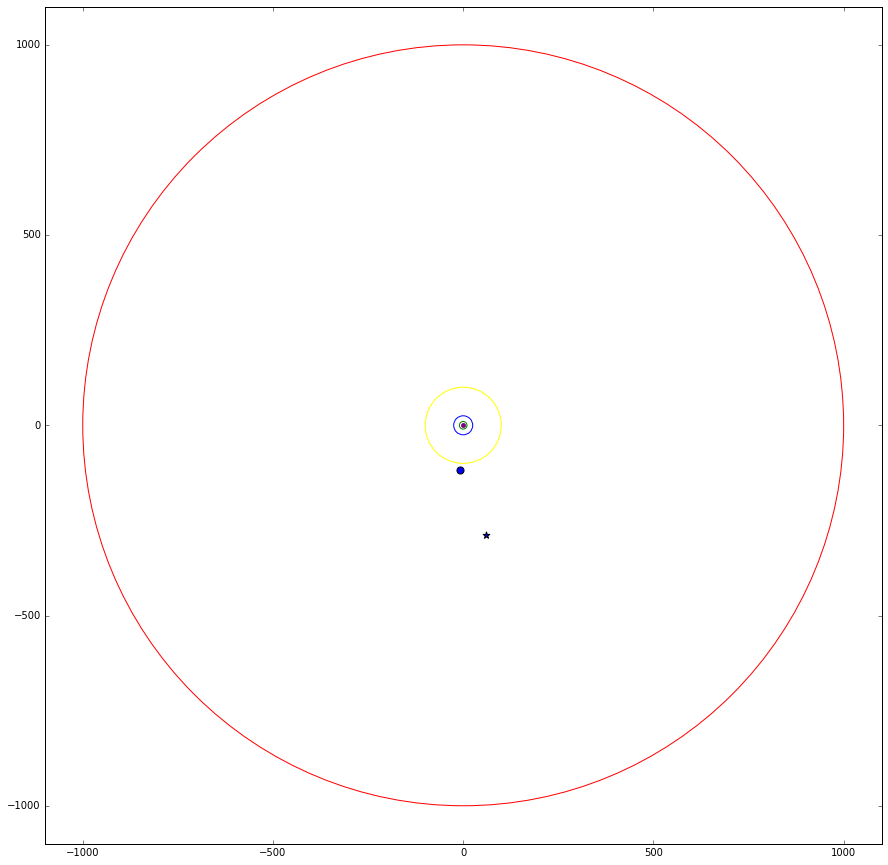

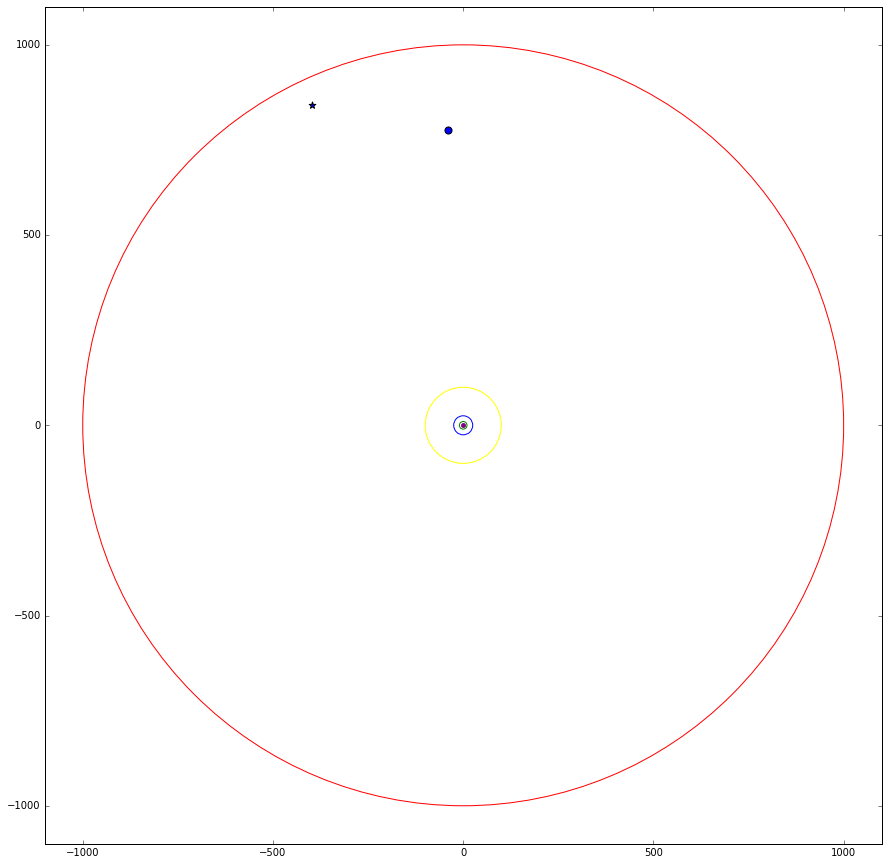

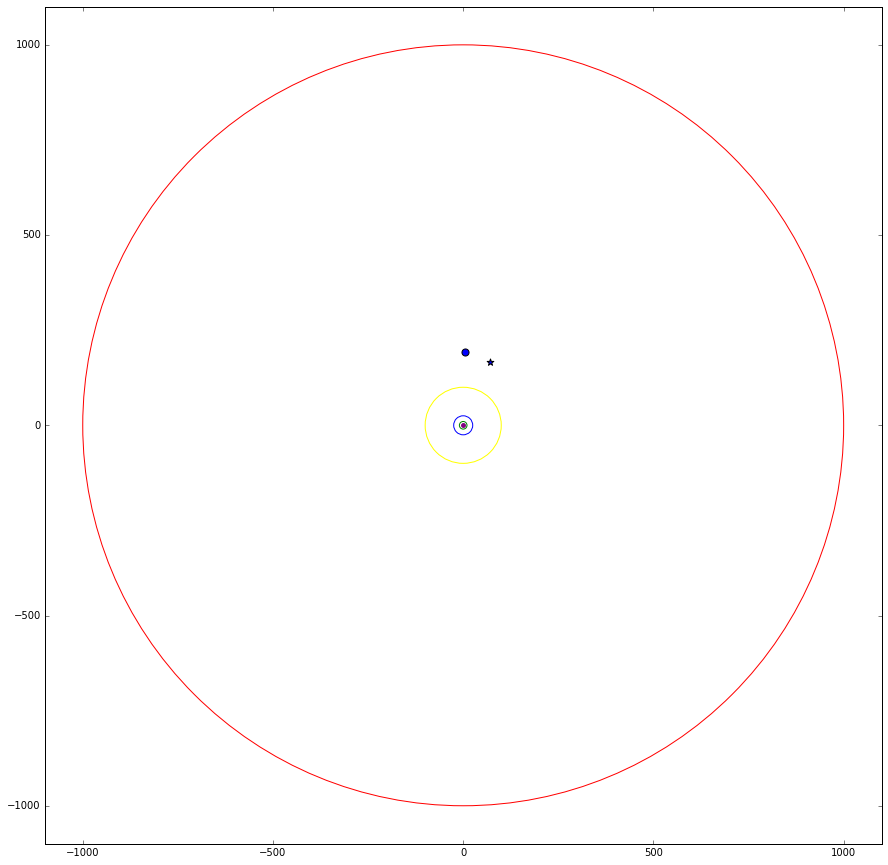

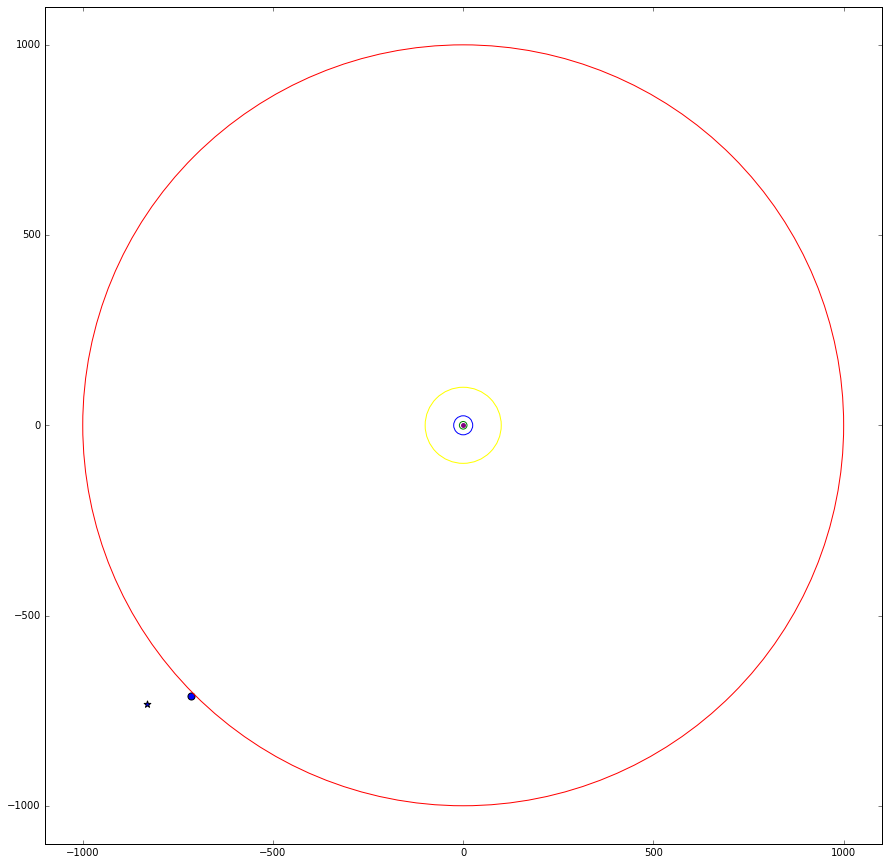

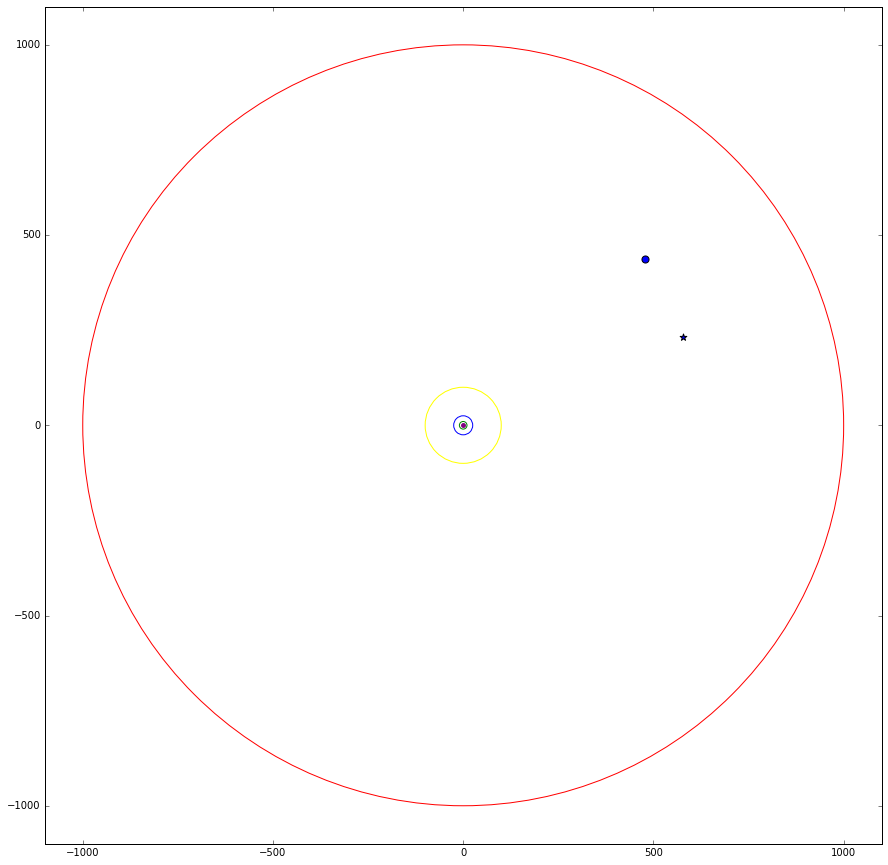

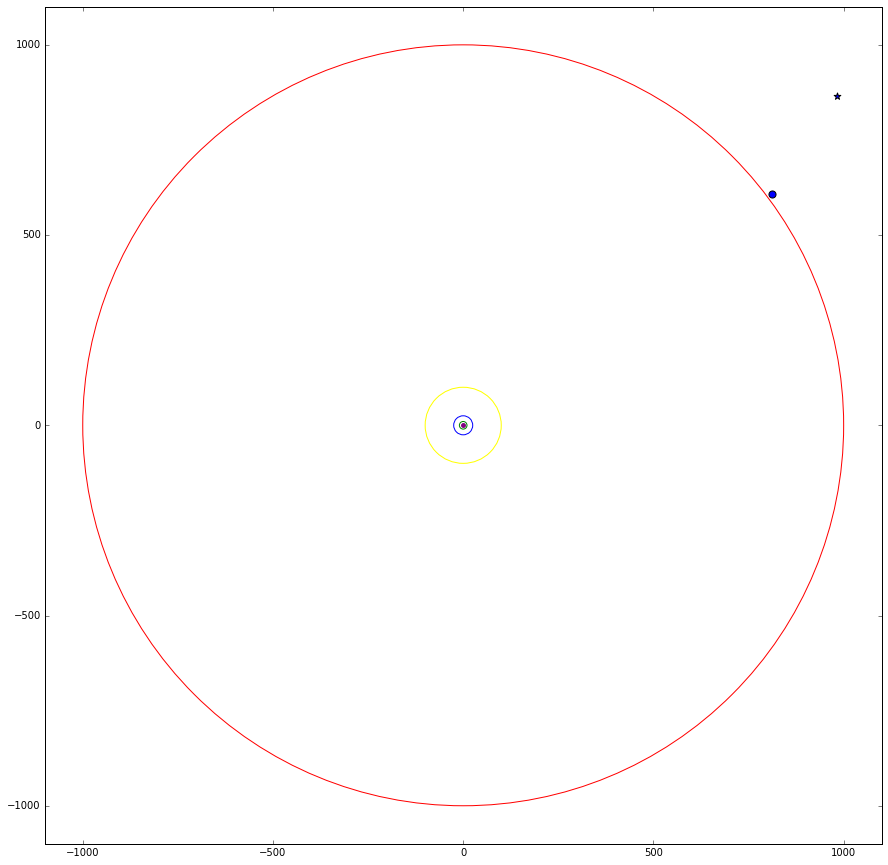

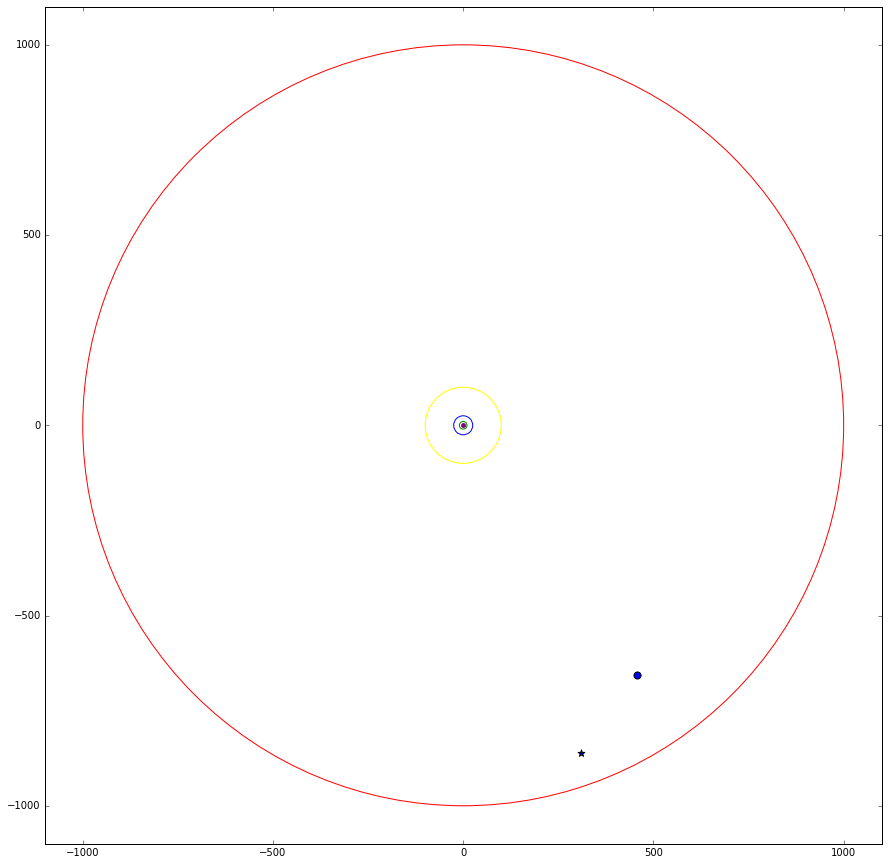

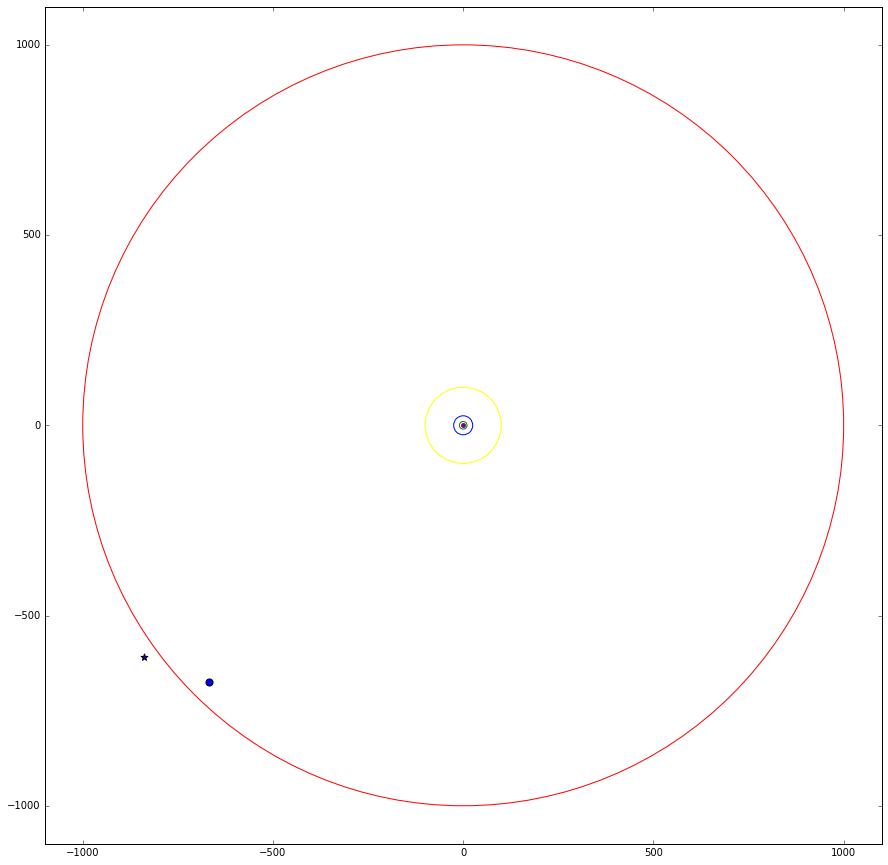

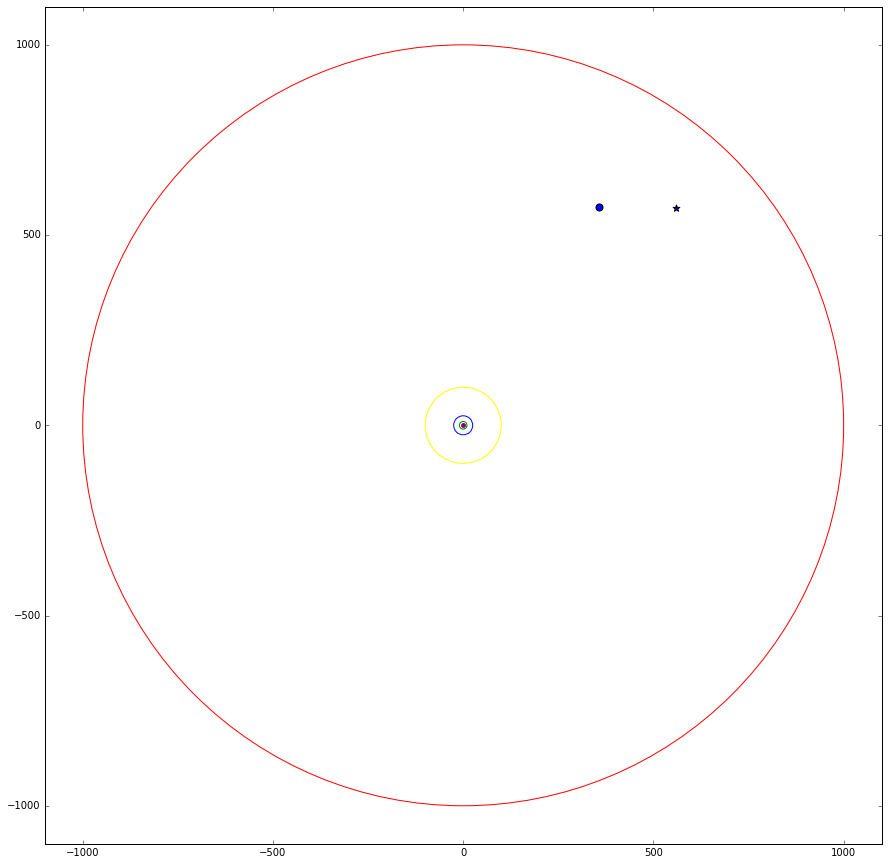

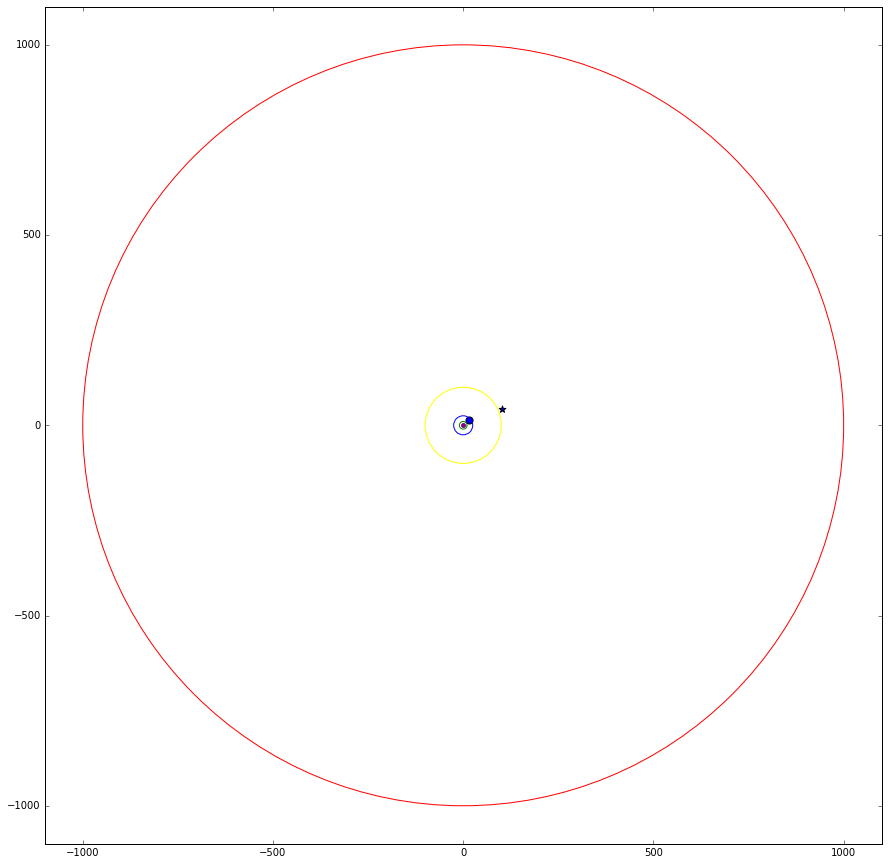

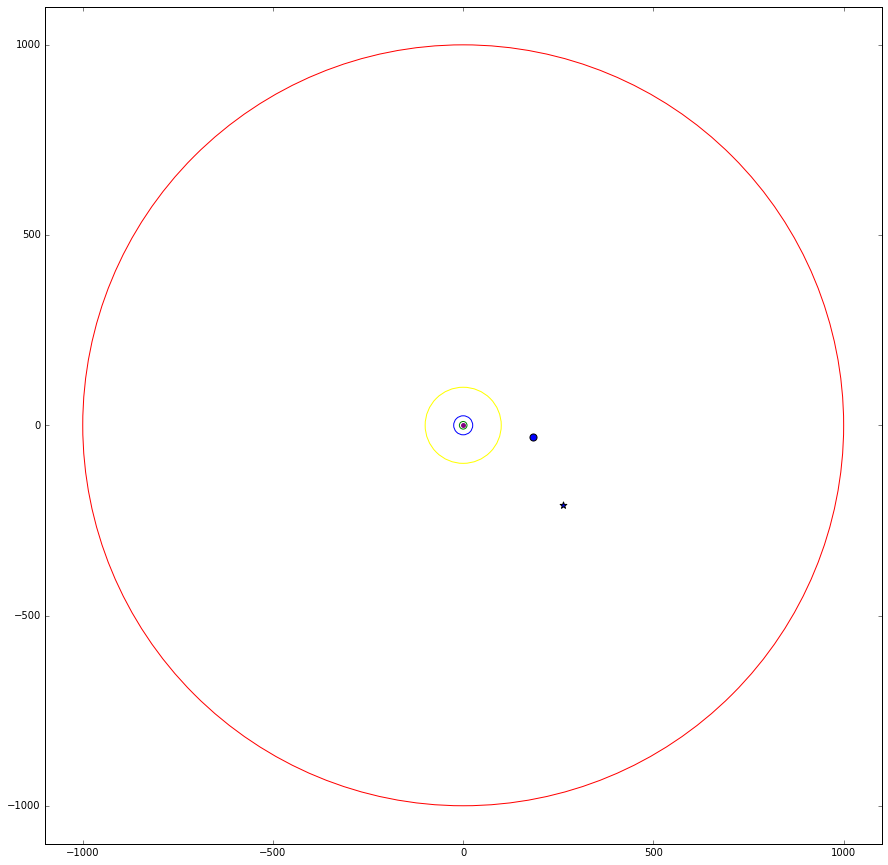

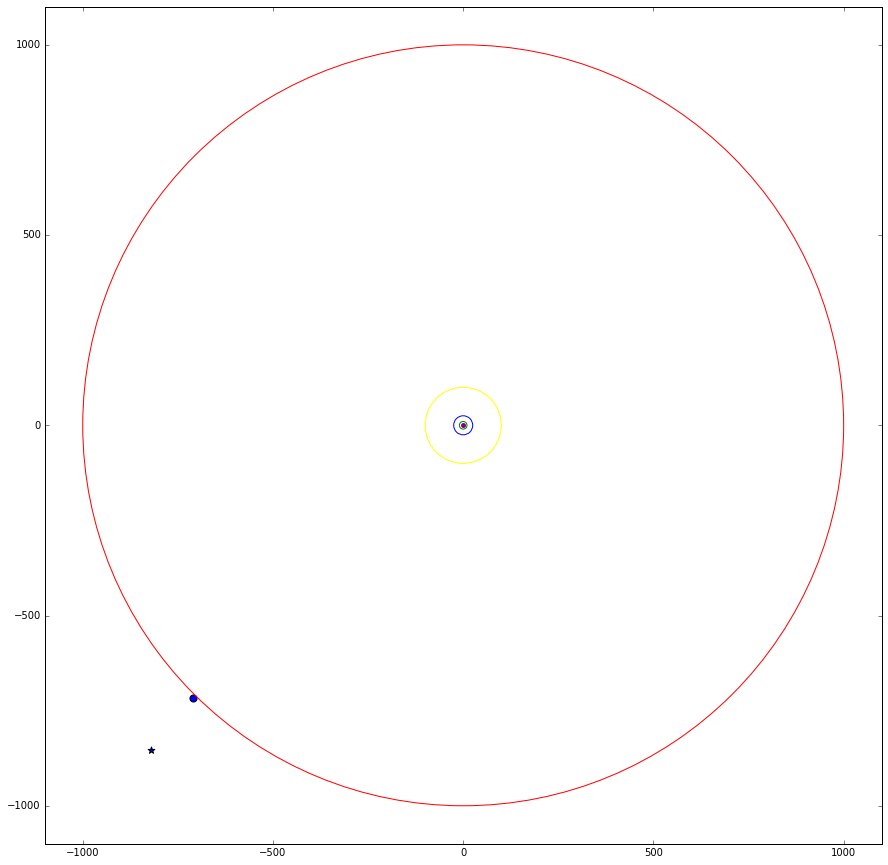

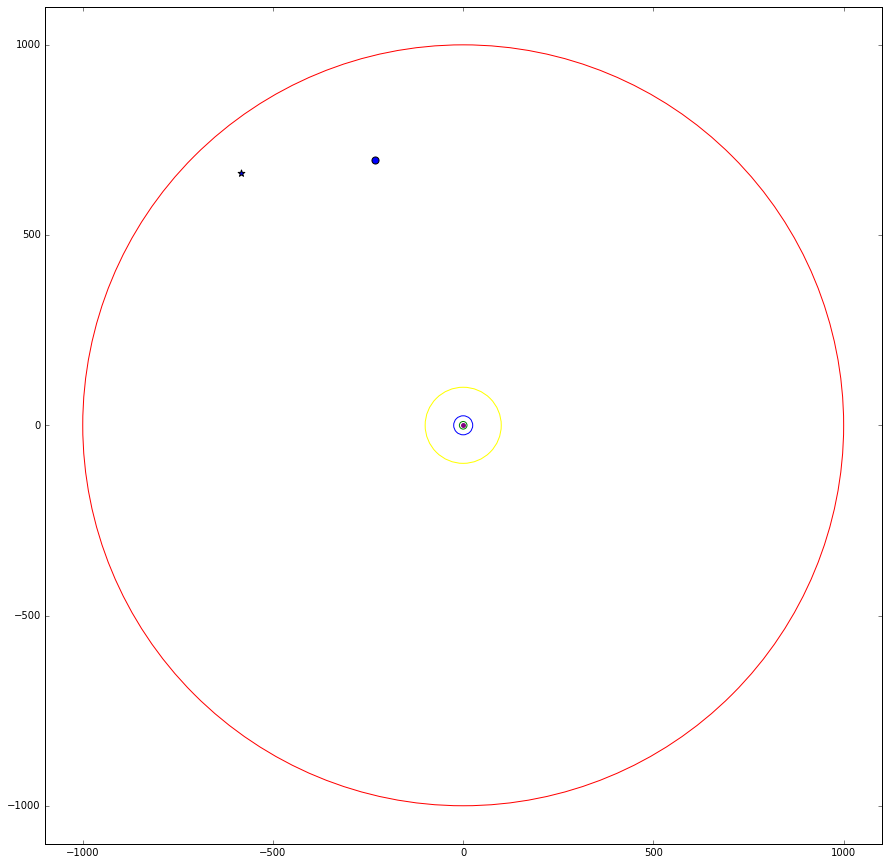

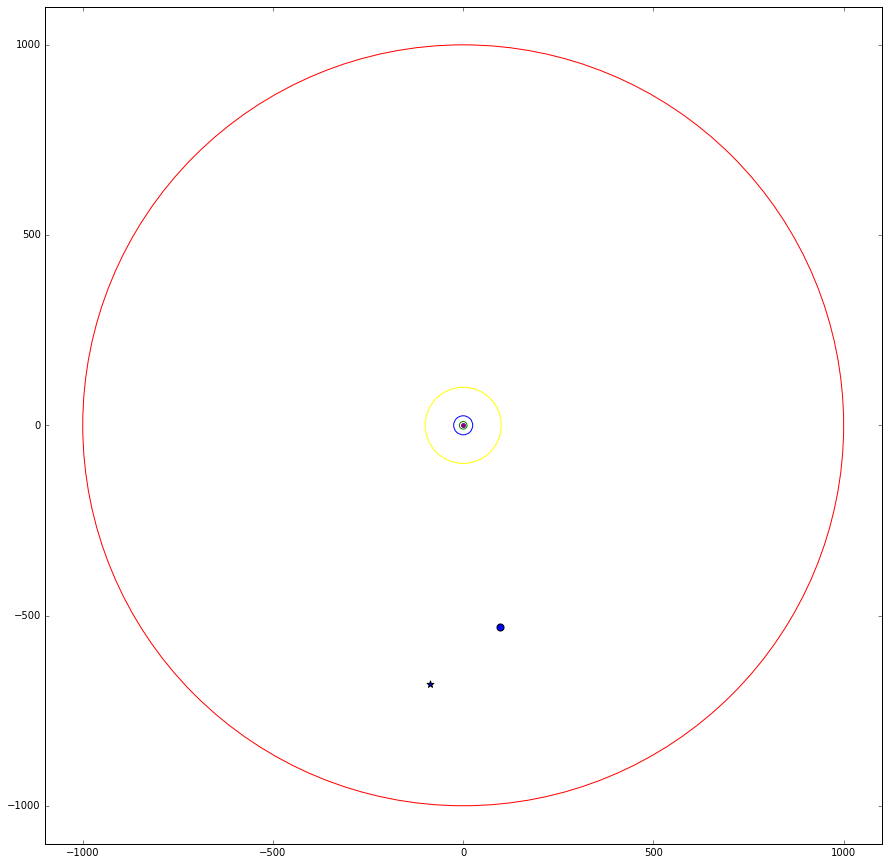

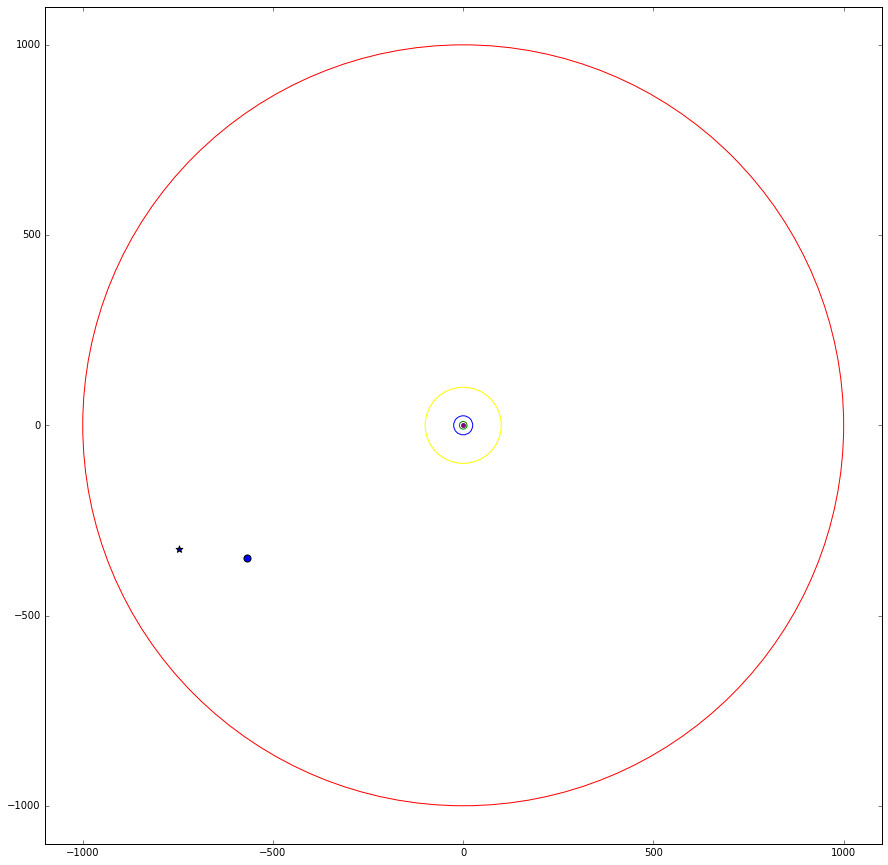

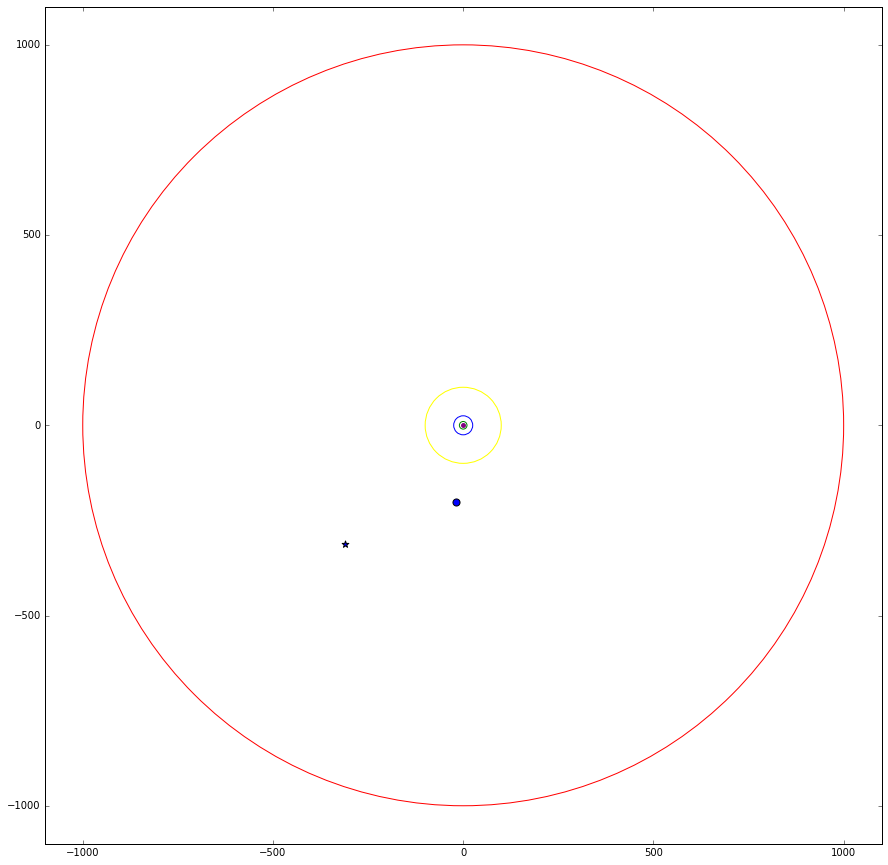

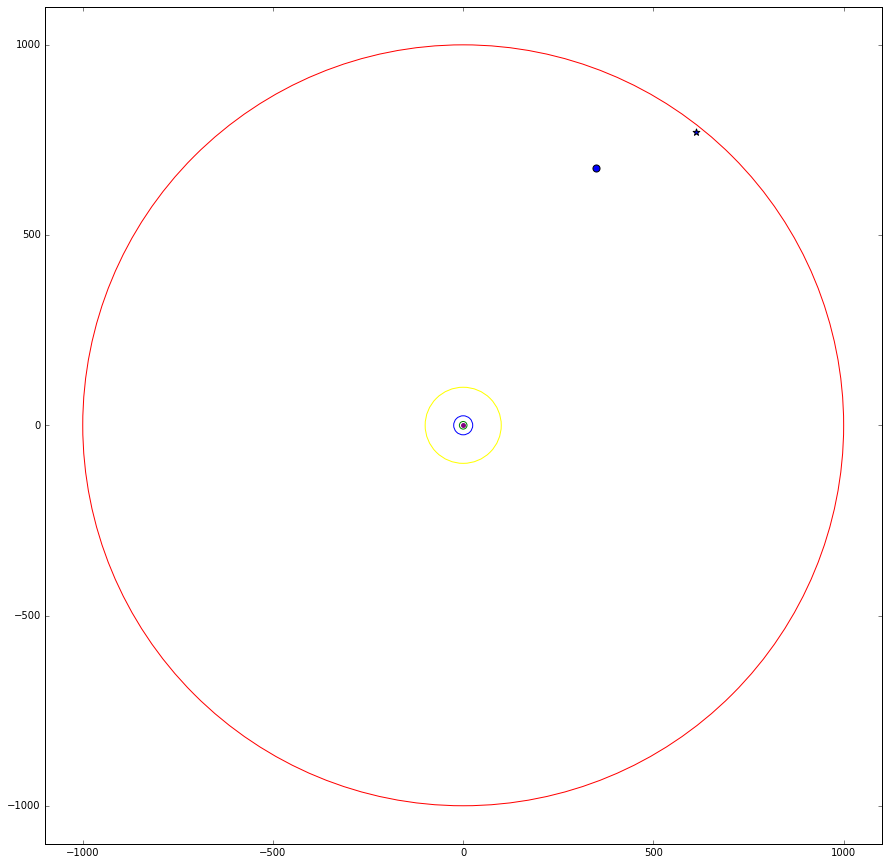

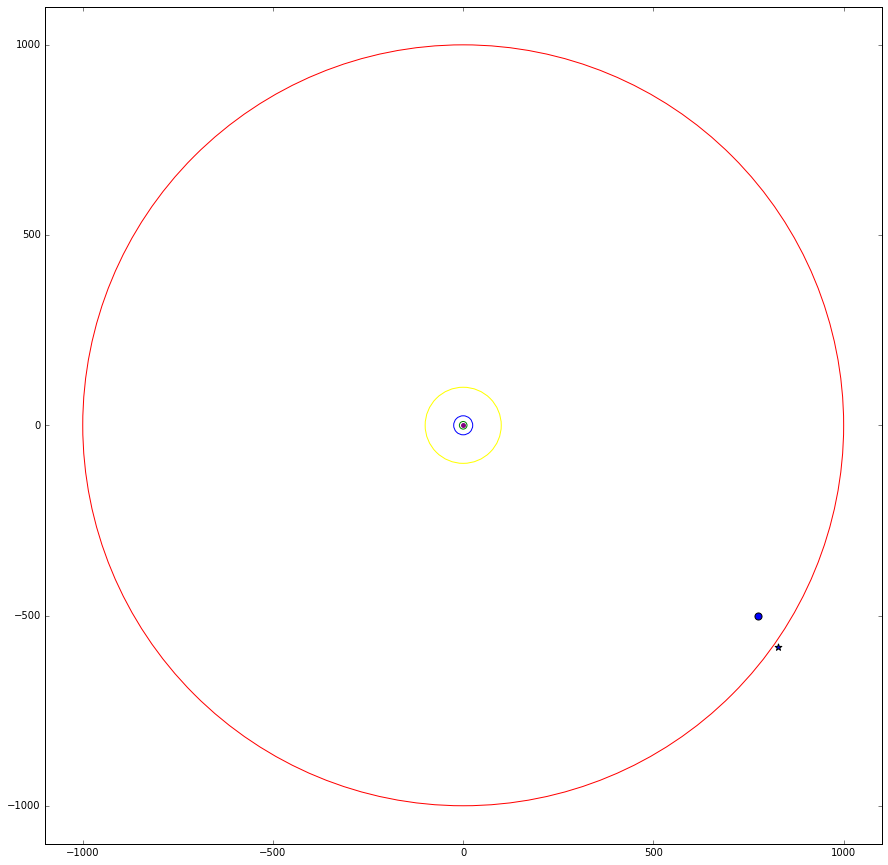

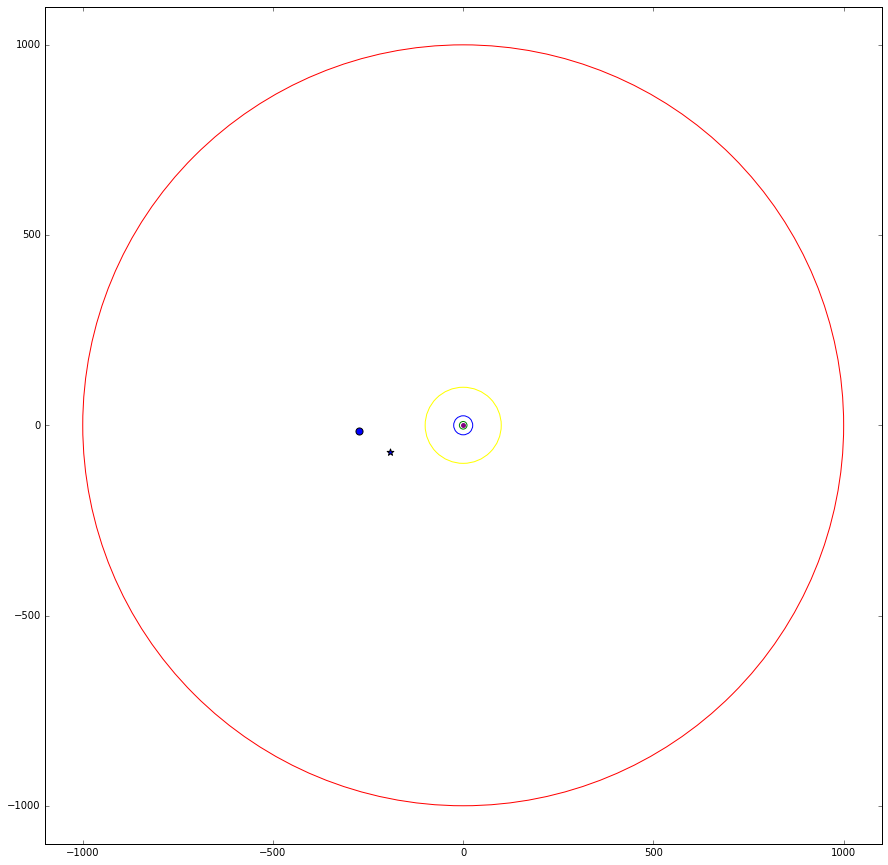

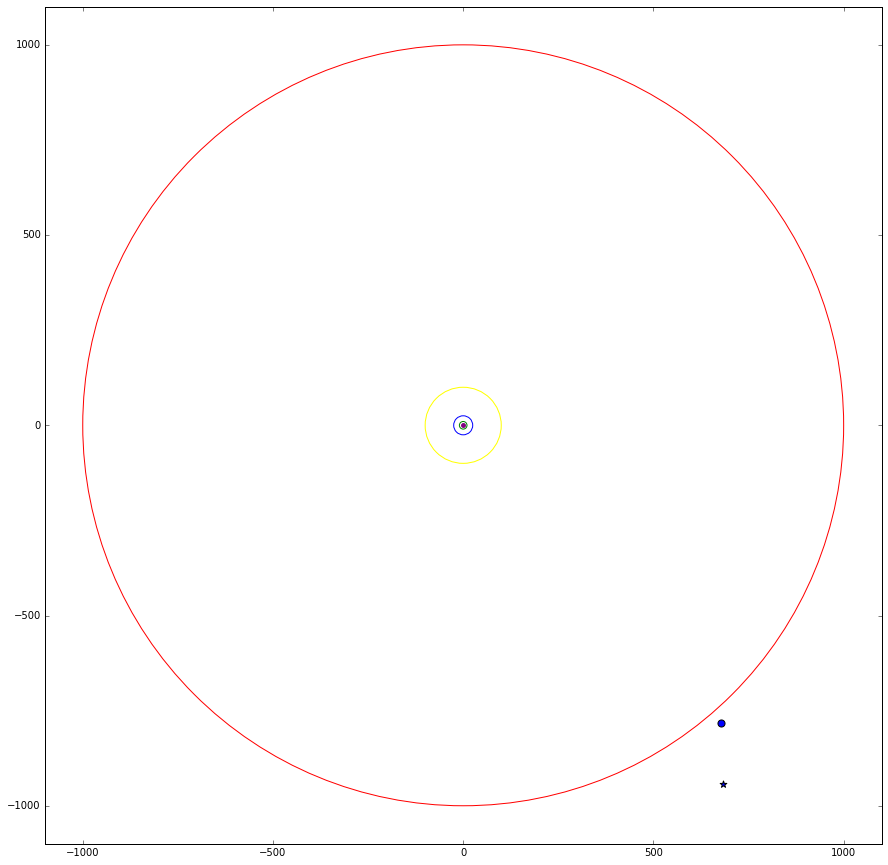

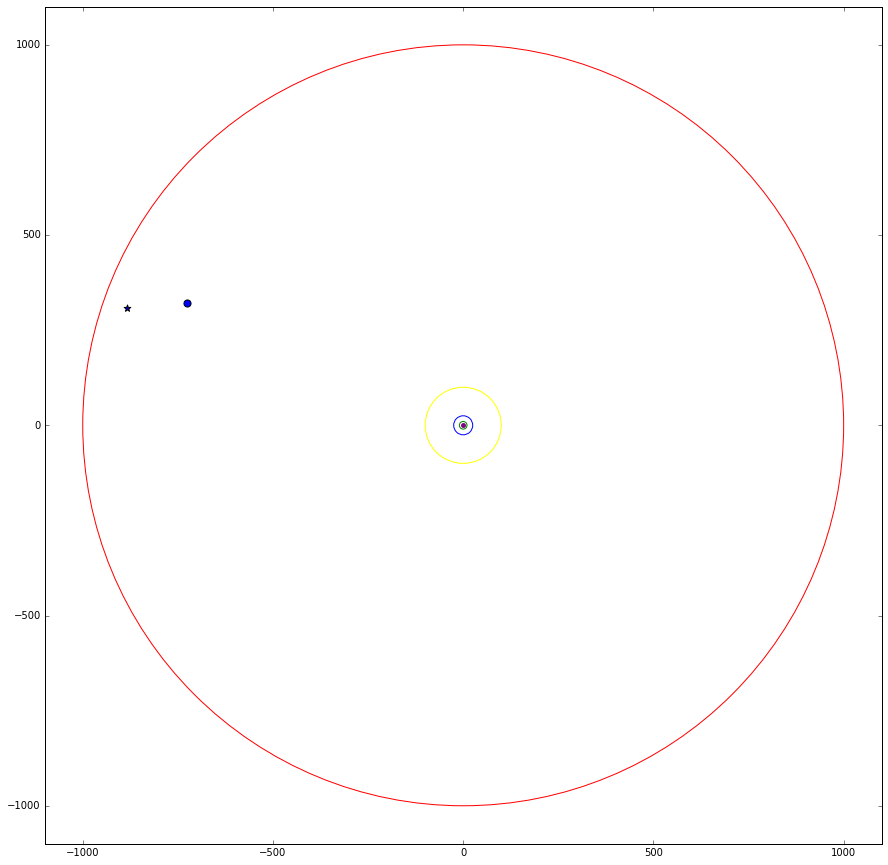

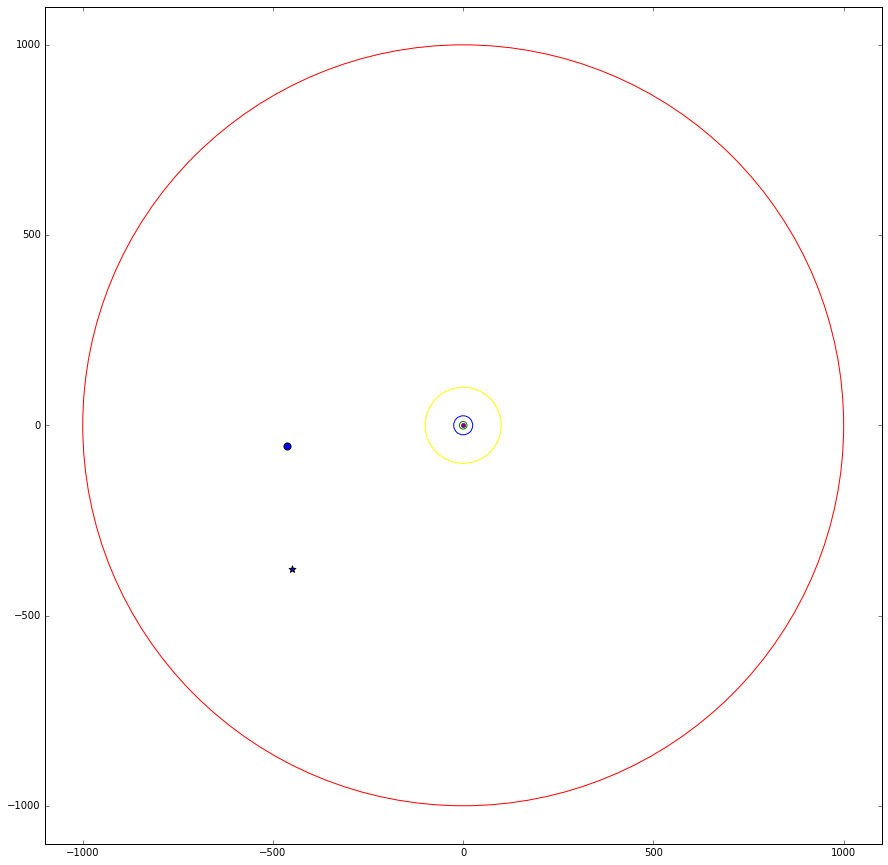

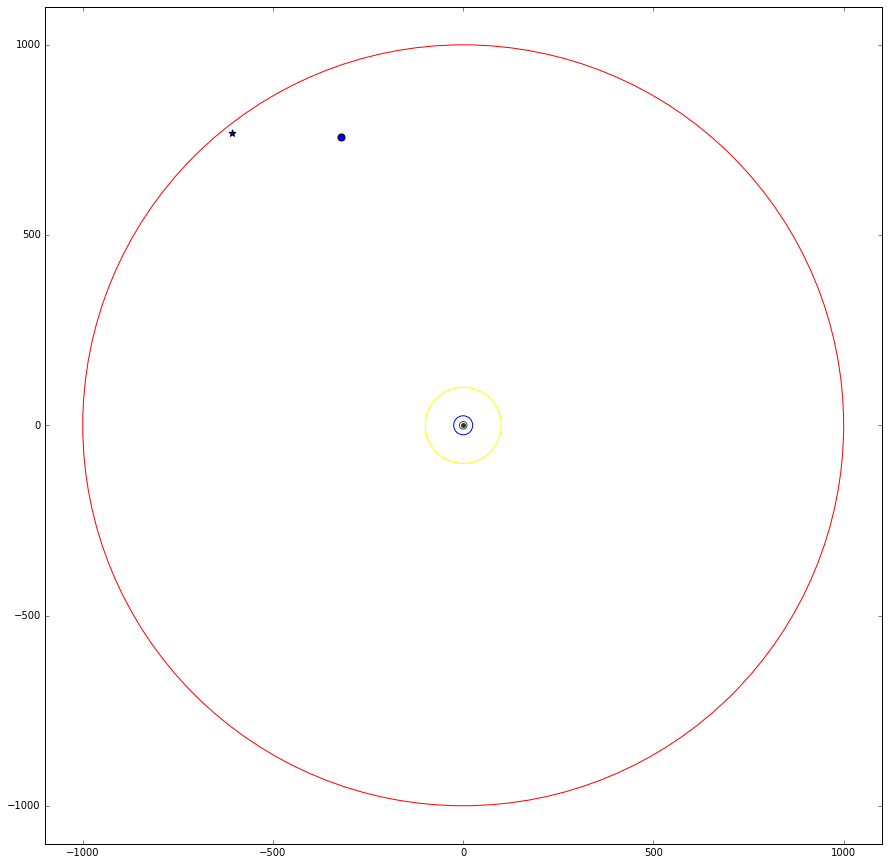

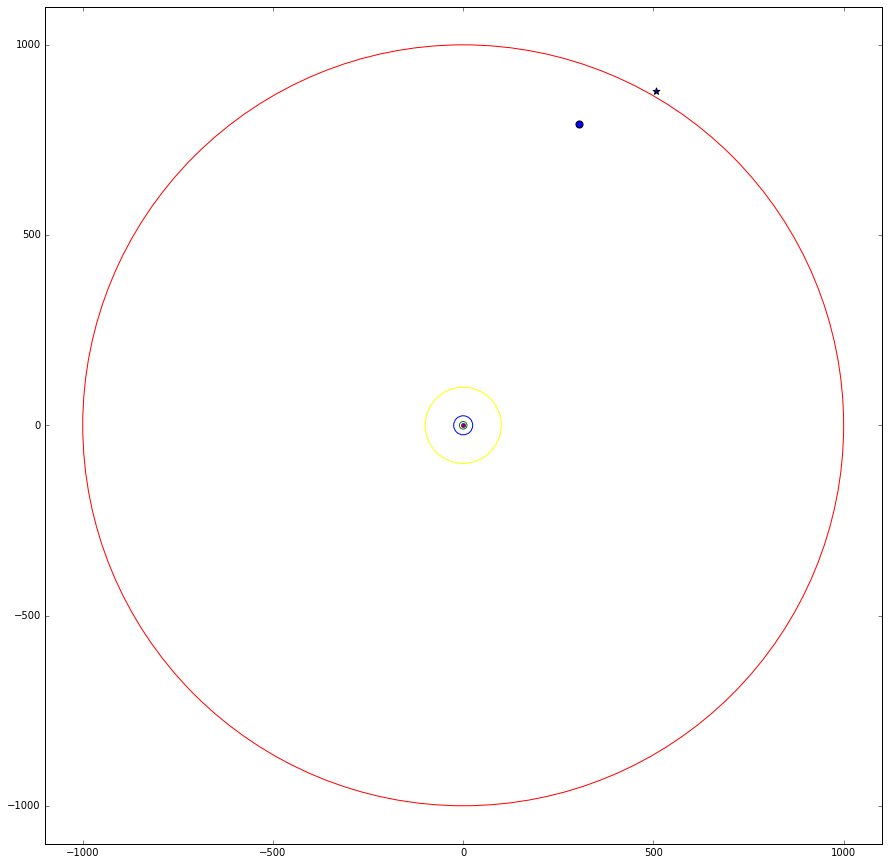

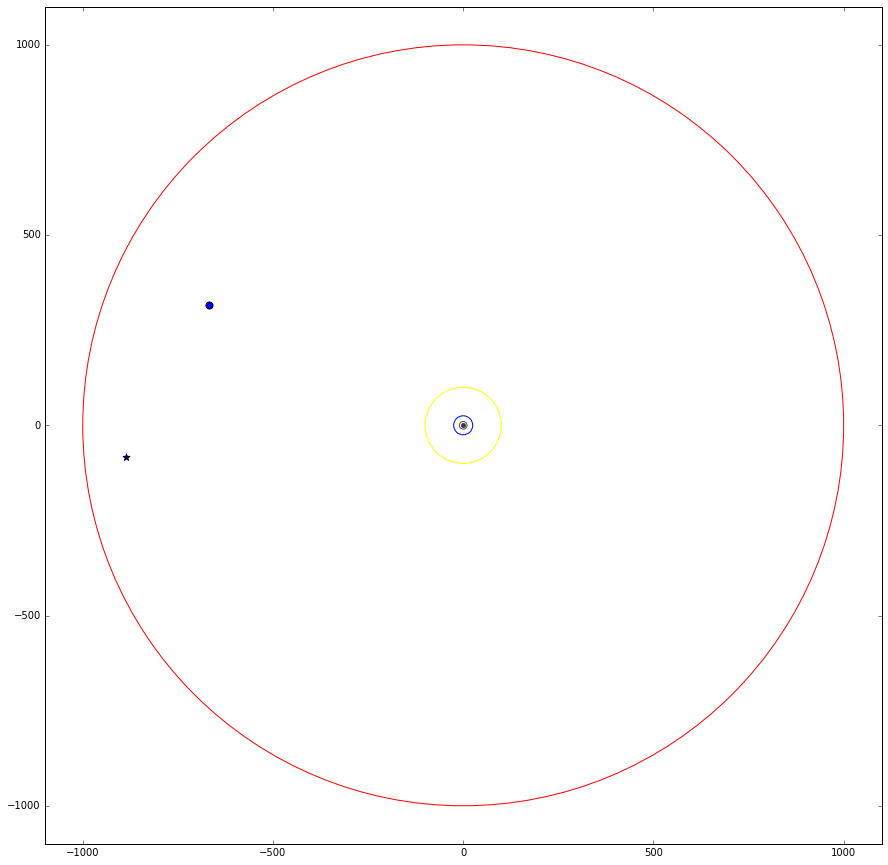

In [160]:
for ind in range(100):
    fig = plot_overlap_one((0, 0), remaining_target[ind,0,:], predicted_reshaped[ind,:])
    fig.savefig('nn_frame' + str(ind) + '.png')
    display.clear_output(wait=True)
    display.display(fig)

In [142]:
model_string = model.to_yaml()
model.save_weights('weights.data')

In [140]:
model_string

'class_name: Sequential\nconfig:\n- class_name: Dense\n  config:\n    W_constraint: null\n    W_regularizer: null\n    activation: linear\n    activity_regularizer: null\n    b_constraint: null\n    b_regularizer: null\n    batch_input_shape: !!python/tuple [null, 1000]\n    bias: true\n    init: glorot_uniform\n    input_dim: 1000\n    input_dtype: float32\n    name: dense_53\n    output_dim: 500\n    trainable: true\n- class_name: Activation\n  config: {activation: relu, name: activation_49, trainable: true}\n- class_name: Dropout\n  config: {name: dropout_26, p: 0.5, trainable: true}\n- class_name: BatchNormalization\n  config: {axis: -1, epsilon: 1.0e-06, mode: 0, momentum: 0.9, name: batchnormalization_40,\n    trainable: true}\n- class_name: Dense\n  config: {W_constraint: null, W_regularizer: null, activation: linear, activity_regularizer: null,\n    b_constraint: null, b_regularizer: null, bias: true, init: glorot_uniform, input_dim: null,\n    name: dense_54, output_dim: 250, 

In [144]:
pickle.dump(model_string, open('model_string.pickle', 'wb'))

In [ ]:
# how to load
model_string = pickle.load(open('model_string.pickle', 'rb'))
model = model_from_yaml(model_string)
model.load_weights('weights.data')